In [2]:
from os import listdir
from os.path import basename
import collections
import sound_processing_functions as sndprcfunc
import numpy as np
import matplotlib.pyplot as plt
import pickle

# signal processing
from scipy.io import wavfile
from scipy.signal import lfilter
from scipy.fftpack import fft

% matplotlib inline

#Tracks to analyze - Across genre comparison; Genre categories are breakbeats, drum and bass, house, and hip hop; visualization of the various processing steps done using a single track as an example.  In this case a sample breakbeat track.

In [3]:
genre_ex = "Breaks"


breaks_tracks_WAV = '/home/markhyphen/tracks/breaks/'
filenames_wav_breaks = [breaks_tracks_WAV + f for f in listdir(breaks_tracks_WAV)]

# breaks_tracks_WAV = '/home/markhyphen/tracks/dnb/'
# filenames_wav_dnb = [breaks_tracks_WAV + f for f in listdir(breaks_tracks_WAV)]
# 
# breaks_tracks_WAV = '/home/markhyphen/tracks/house/'
# filenames_wav_house = [breaks_tracks_WAV + f for f in listdir(breaks_tracks_WAV)]
# 
# breaks_tracks_WAV = '/home/markhyphen/tracks/hiphop/'
# filenames_wav_hiphop = [breaks_tracks_WAV + f for f in listdir(breaks_tracks_WAV)]


# initialize music collection
sound_files = collections.defaultdict(dict)

### change ###
sound_files["Breaks"]["path"] = filenames_wav_breaks

# sound_files["DnB_jungle"]["path"] = filenames_wav_dnb
# 
# sound_files["Hip_Hop"]["path"] = filenames_wav_house
# 
# sound_files["House"]["path"] = filenames_wav_hiphop



# load sound files
for genre in sound_files.keys():
    samplerate_temp = []
    wavedata_temp = []
    num_of_samp_temp = []
    song_length_temp = []
    for current in sound_files[genre]["path"]:
        samplerate, wavedata_ = wavfile.read(current)
        samplerate_temp.append(samplerate)
        wavedata_temp.append(wavedata_)
        num_of_samp_temp.append(wavedata_.shape[0])
        song_length_temp.append(int(wavedata_.shape[0] / samplerate))      # round up
    sound_files[genre]["samplerate"] = samplerate_temp
    sound_files[genre]["wavedata"] = wavedata_temp
    sound_files[genre]["number_of_samples"] = num_of_samp_temp
    sound_files[genre]["song_length"] = song_length_temp

# Import preprocessed track data for the various genres

In [4]:
def open_dataframe_pickle(name_of_pickle):
    with open(name_of_pickle, 'rb') as f:
        df_from_pickle = pickle.load(f)
    return df_from_pickle

savefile_master_tracklist = 'tracks_set_2.pickle'
savefile_master_ZCR_final = 'tracks_set_2_ZCR_final.pickle'
savefile_master_RMS_final = 'tracks_set_2_RMS_final.pickle'
savefile_master_SPEC_CENTR_final = 'tracks_set_2_SPEC_CENTR_final.pickle'
savefile_master_SPEC_ROLL_final = 'tracks_set_2_SPEC_ROLL_final.pickle'
savefile_master_SPEC_FLUX_final = 'tracks_set_2_SPEC_FLUX_final.pickle'
savefile_master_MFCC_final = 'tracks_set_2_MFCC_final.pickle'
savefile_master_RYTHM_final = 'tracks_set_2_RYTHM_final.pickle'

# initialize preprocessed (PP) music collection
sound_files_PP = collections.defaultdict(dict)
### change ###
sound_files_PP["Breaks"]["genre_name"] = "Breaks"
sound_files_PP["DnB_jungle"]["genre_name"] = "DnB_jungle"
sound_files_PP["House"]["genre_name"] = "House"
sound_files_PP["Hip_Hop"]["genre_name"] = "Hip_Hop"

data_temp = open_dataframe_pickle(savefile_master_ZCR_final)
# load sound files

translate = {'dnb': 'DnB_jungle', 'breaks': 'Breaks', 'house': 'House', 'Hip_Hop': 'Hip_Hop'}
for i in range(0, len(data_temp['label'])):
    data_temp['label'][i] = translate[data_temp['label'][i]]

for current in set(data_temp['label']):
    sound_files_PP[current]["samplerate"] = []
    sound_files_PP[current]["number_of_samples"] = []
    sound_files_PP[current]["track"] = []
    sound_files_PP[current]["song_length"] = []
    sound_files_PP[current]["zcr"] = []
    sound_files_PP[current]["rms"] = []
    sound_files_PP[current]["sc"] = []
    sound_files_PP[current]["sr"] = []
    sound_files_PP[current]["sf"] = []
    sound_files_PP[current]["MFCCs_1"] = []
    sound_files_PP[current]["MFCCs_2"] = []

for i, current in enumerate(data_temp['label']):
    sound_files_PP[current]["track"].append(basename(data_temp['path'][i]))
    sound_files_PP[current]["samplerate"].append(data_temp['sample_rate'][i])
    sound_files_PP[current]["number_of_samples"].append(data_temp['num_of_samples'][i])
    sound_files_PP[current]["song_length"].append(data_temp['num_of_samples'][i]*data_temp['sample_rate'][i])
    sound_files_PP[current]["zcr"] = data_temp['data'][i]

data_temp = open_dataframe_pickle(savefile_master_RMS_final)
for i in range(0, len(data_temp['label'])):
    data_temp['label'][i] = translate[data_temp['label'][i]]
for i, current in enumerate(data_temp['label']):
    sound_files_PP[current]["rms"].append(data_temp['data'][i])
    # sound_files_PP[current]["rms"] = data_temp['data'][i]

data_temp = open_dataframe_pickle(savefile_master_SPEC_CENTR_final)
for i in range(0, len(data_temp['label'])):
    data_temp['label'][i] = translate[data_temp['label'][i]]
for i, current in enumerate(data_temp['label']):
    sound_files_PP[current]["sc"].append(data_temp['data'][i])

data_temp = open_dataframe_pickle(savefile_master_SPEC_ROLL_final)
for i in range(0, len(data_temp['label'])):
    data_temp['label'][i] = translate[data_temp['label'][i]]
for i, current in enumerate(data_temp['label']):
    sound_files_PP[current]["sr"].append(data_temp['data'][i])

data_temp = open_dataframe_pickle(savefile_master_SPEC_FLUX_final)
for i in range(0, len(data_temp['label'])):
    data_temp['label'][i] = translate[data_temp['label'][i]]
for i, current in enumerate(data_temp['label']):
    sound_files_PP[current]["sf"].append(data_temp['data'][i])

data_temp = open_dataframe_pickle(savefile_master_MFCC_final)
for i in range(0, len(data_temp['label'])):
    data_temp['label'][i] = translate[data_temp['label'][i]]
for i, current in enumerate(data_temp['label']):
    sound_files_PP[current]["MFCCs_1"].append(data_temp['MFCCs_mean_1'][i])
    sound_files_PP[current]["MFCCs_2"].append(data_temp['MFCCs_mean_2'][i])

# The Time Domain

# an example of one of the tracks in folder

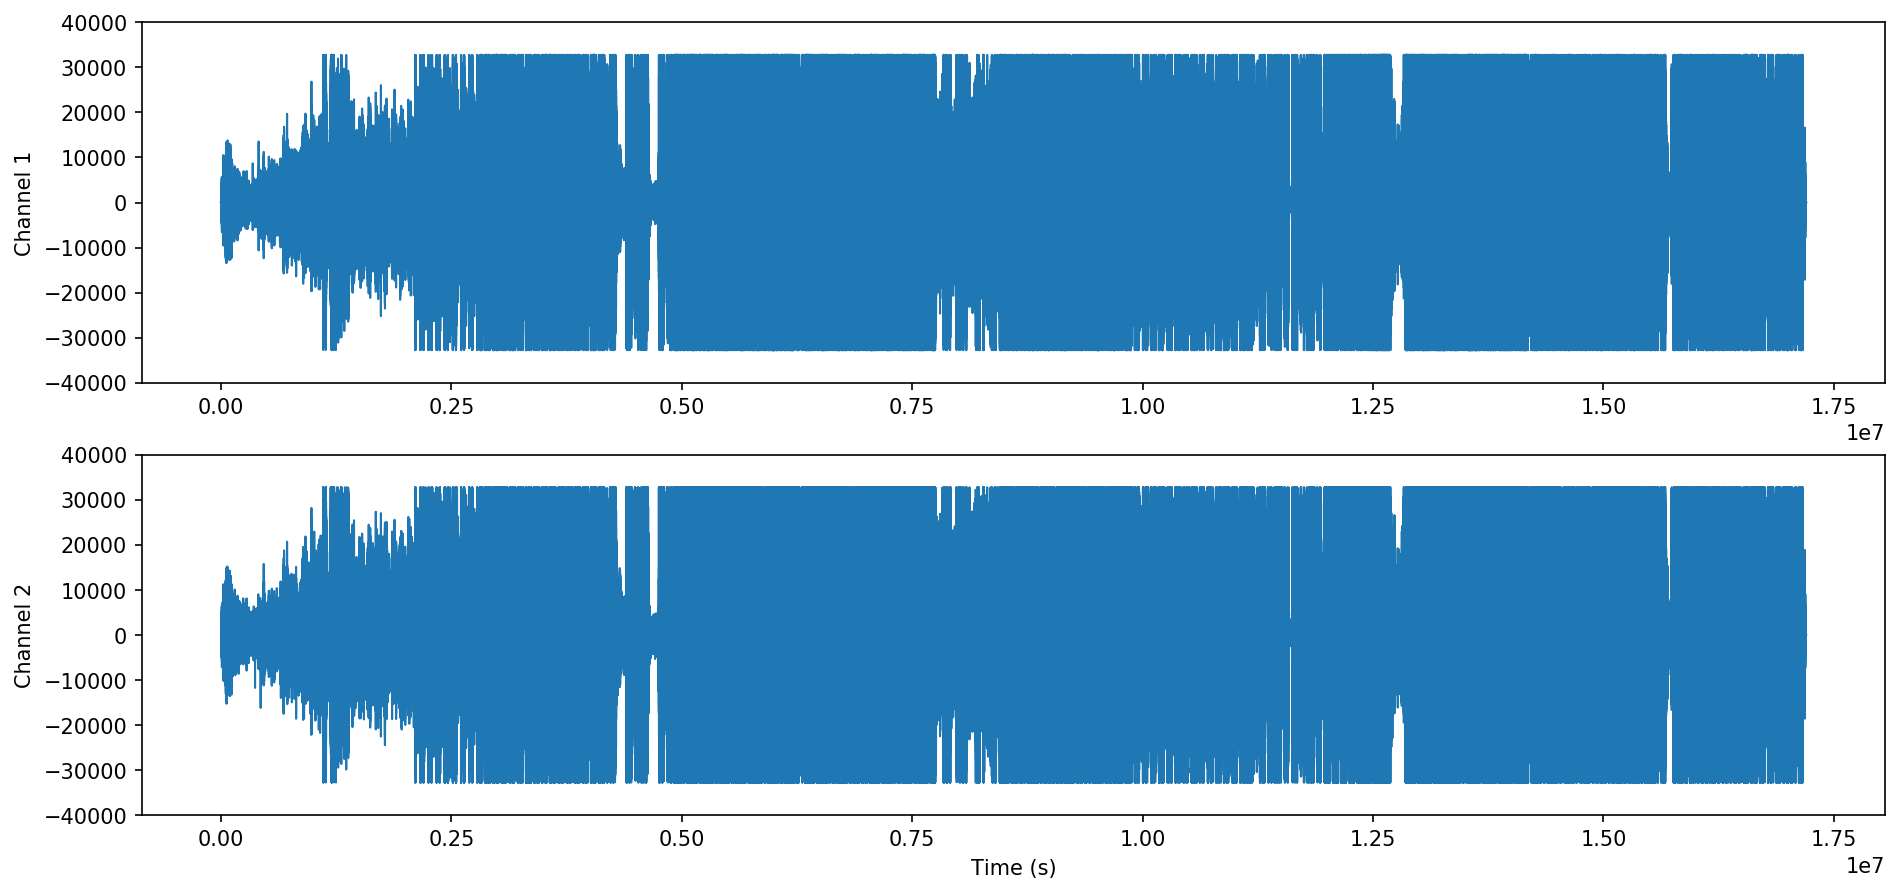

In [5]:
sndprcfunc.show_stereo_waveform(sound_files[genre_ex]["wavedata"][0])

# The Frequency Domain

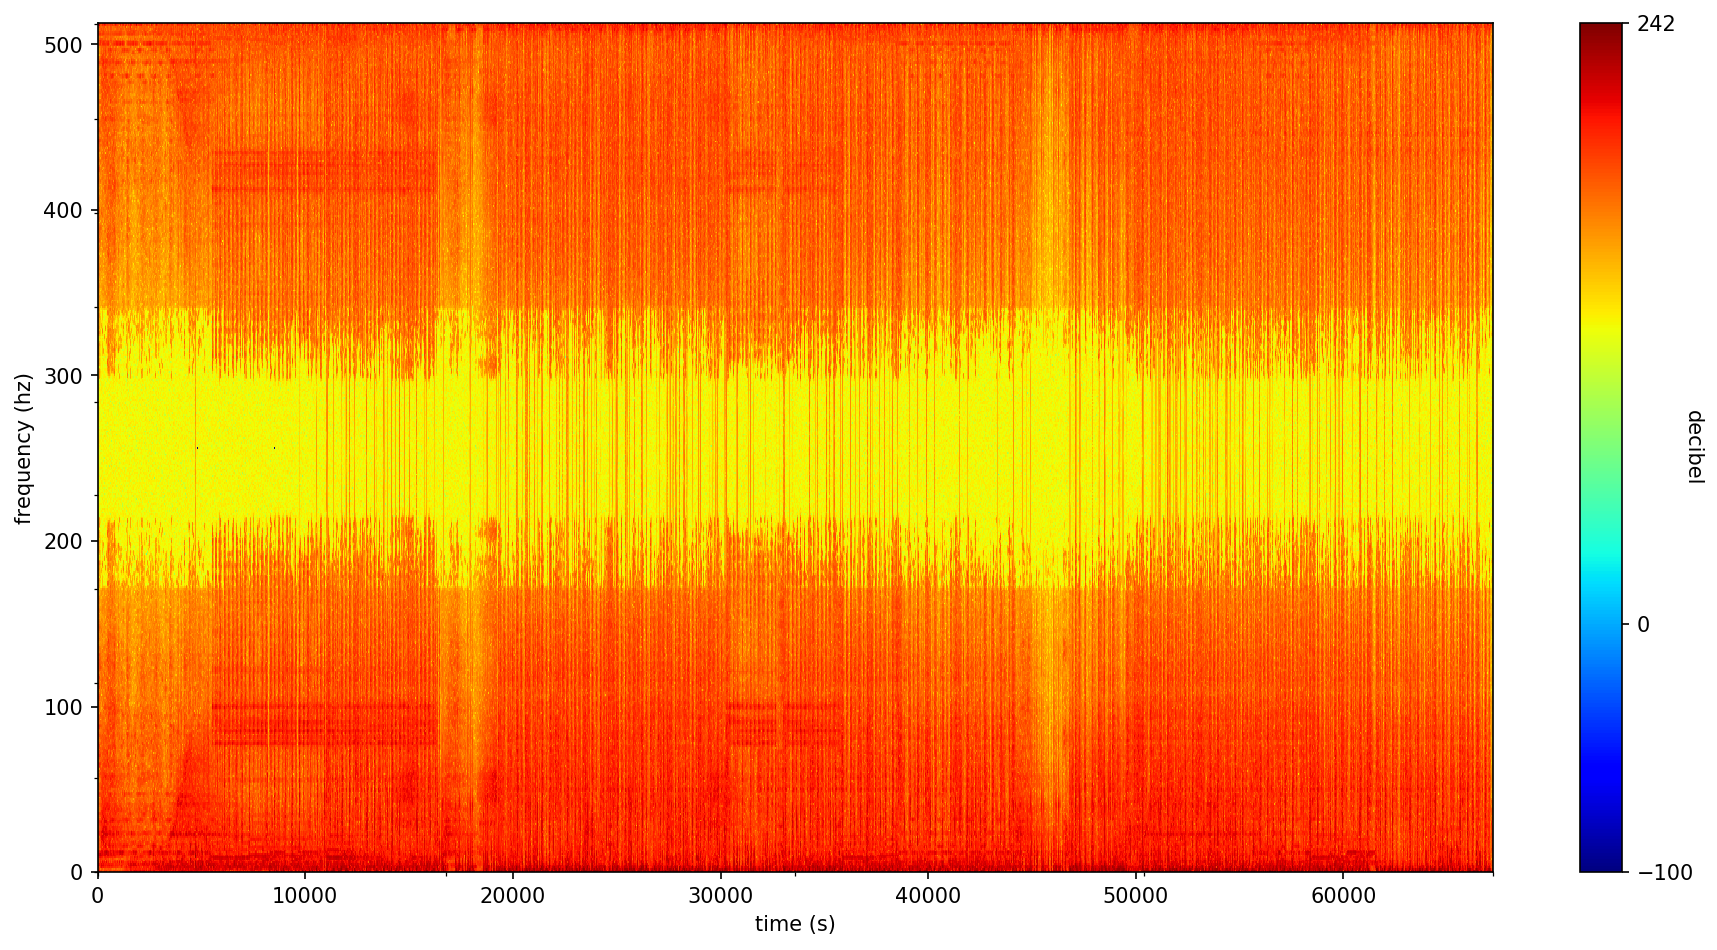

In [6]:
sndprcfunc.plotstft(sound_files[genre_ex]["wavedata"][0], sound_files[genre_ex]["samplerate"][0])

# Some pre-processing

In [7]:
for genre in sound_files.keys():
    for i, current in enumerate(sound_files[genre]["wavedata"]):
        if current.shape[1] > 1:
            # use combine the channels by calculating their geometric mean
            sound_files[genre]["wavedata"][i] = np.mean(current, axis=1)

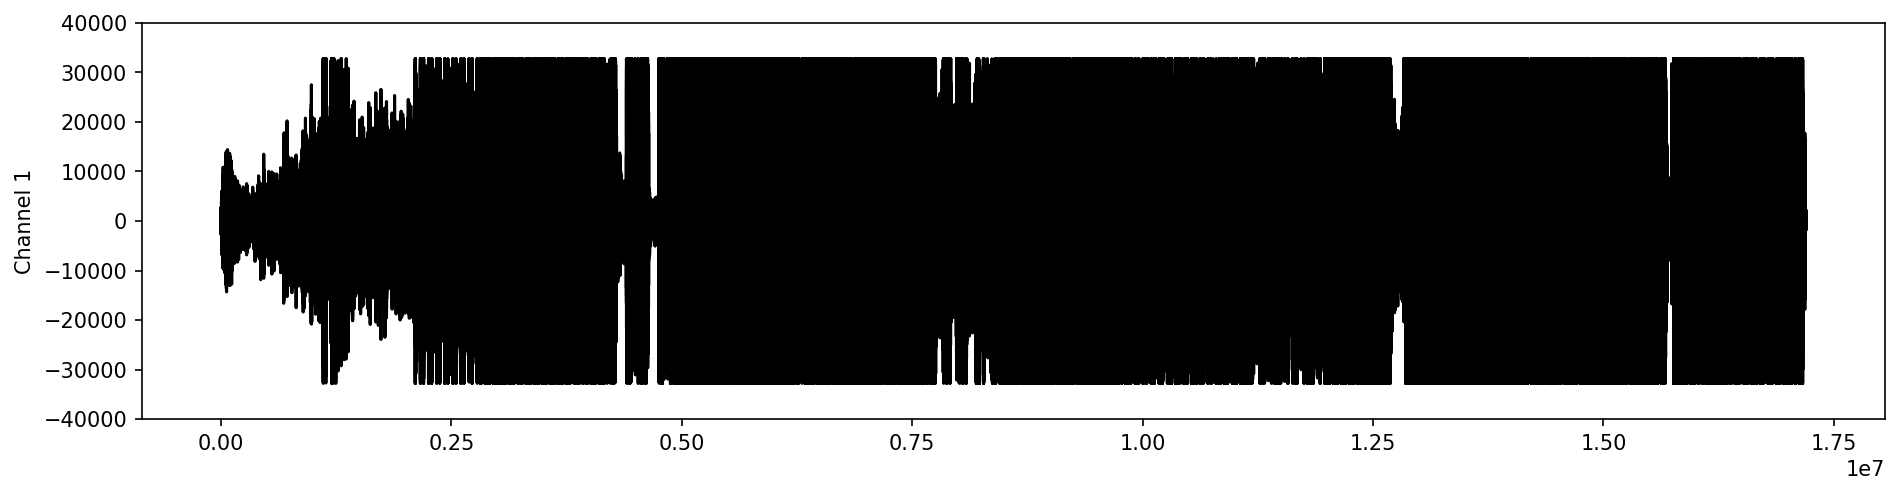

In [8]:
sndprcfunc.show_mono_waveform(sound_files[genre_ex]["wavedata"][0])

# zero-crossing-rate

In [9]:
zcr, ts = sndprcfunc.zero_crossing_rate(sound_files[genre_ex]["wavedata"][0], 2048, sound_files[genre_ex]["samplerate"][0])

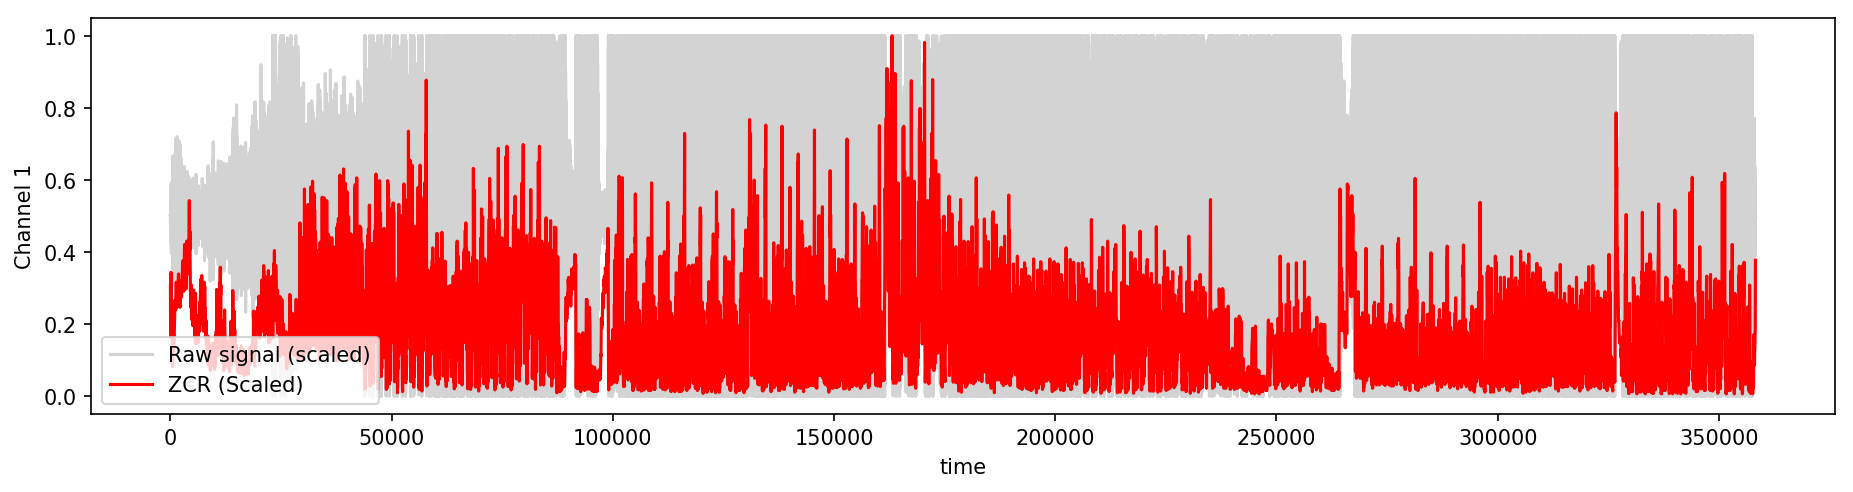

In [10]:
sndprcfunc.show_feature_superimposed(sound_files, 0, genre_ex, zcr, ts, 'ZCR (Scaled)')

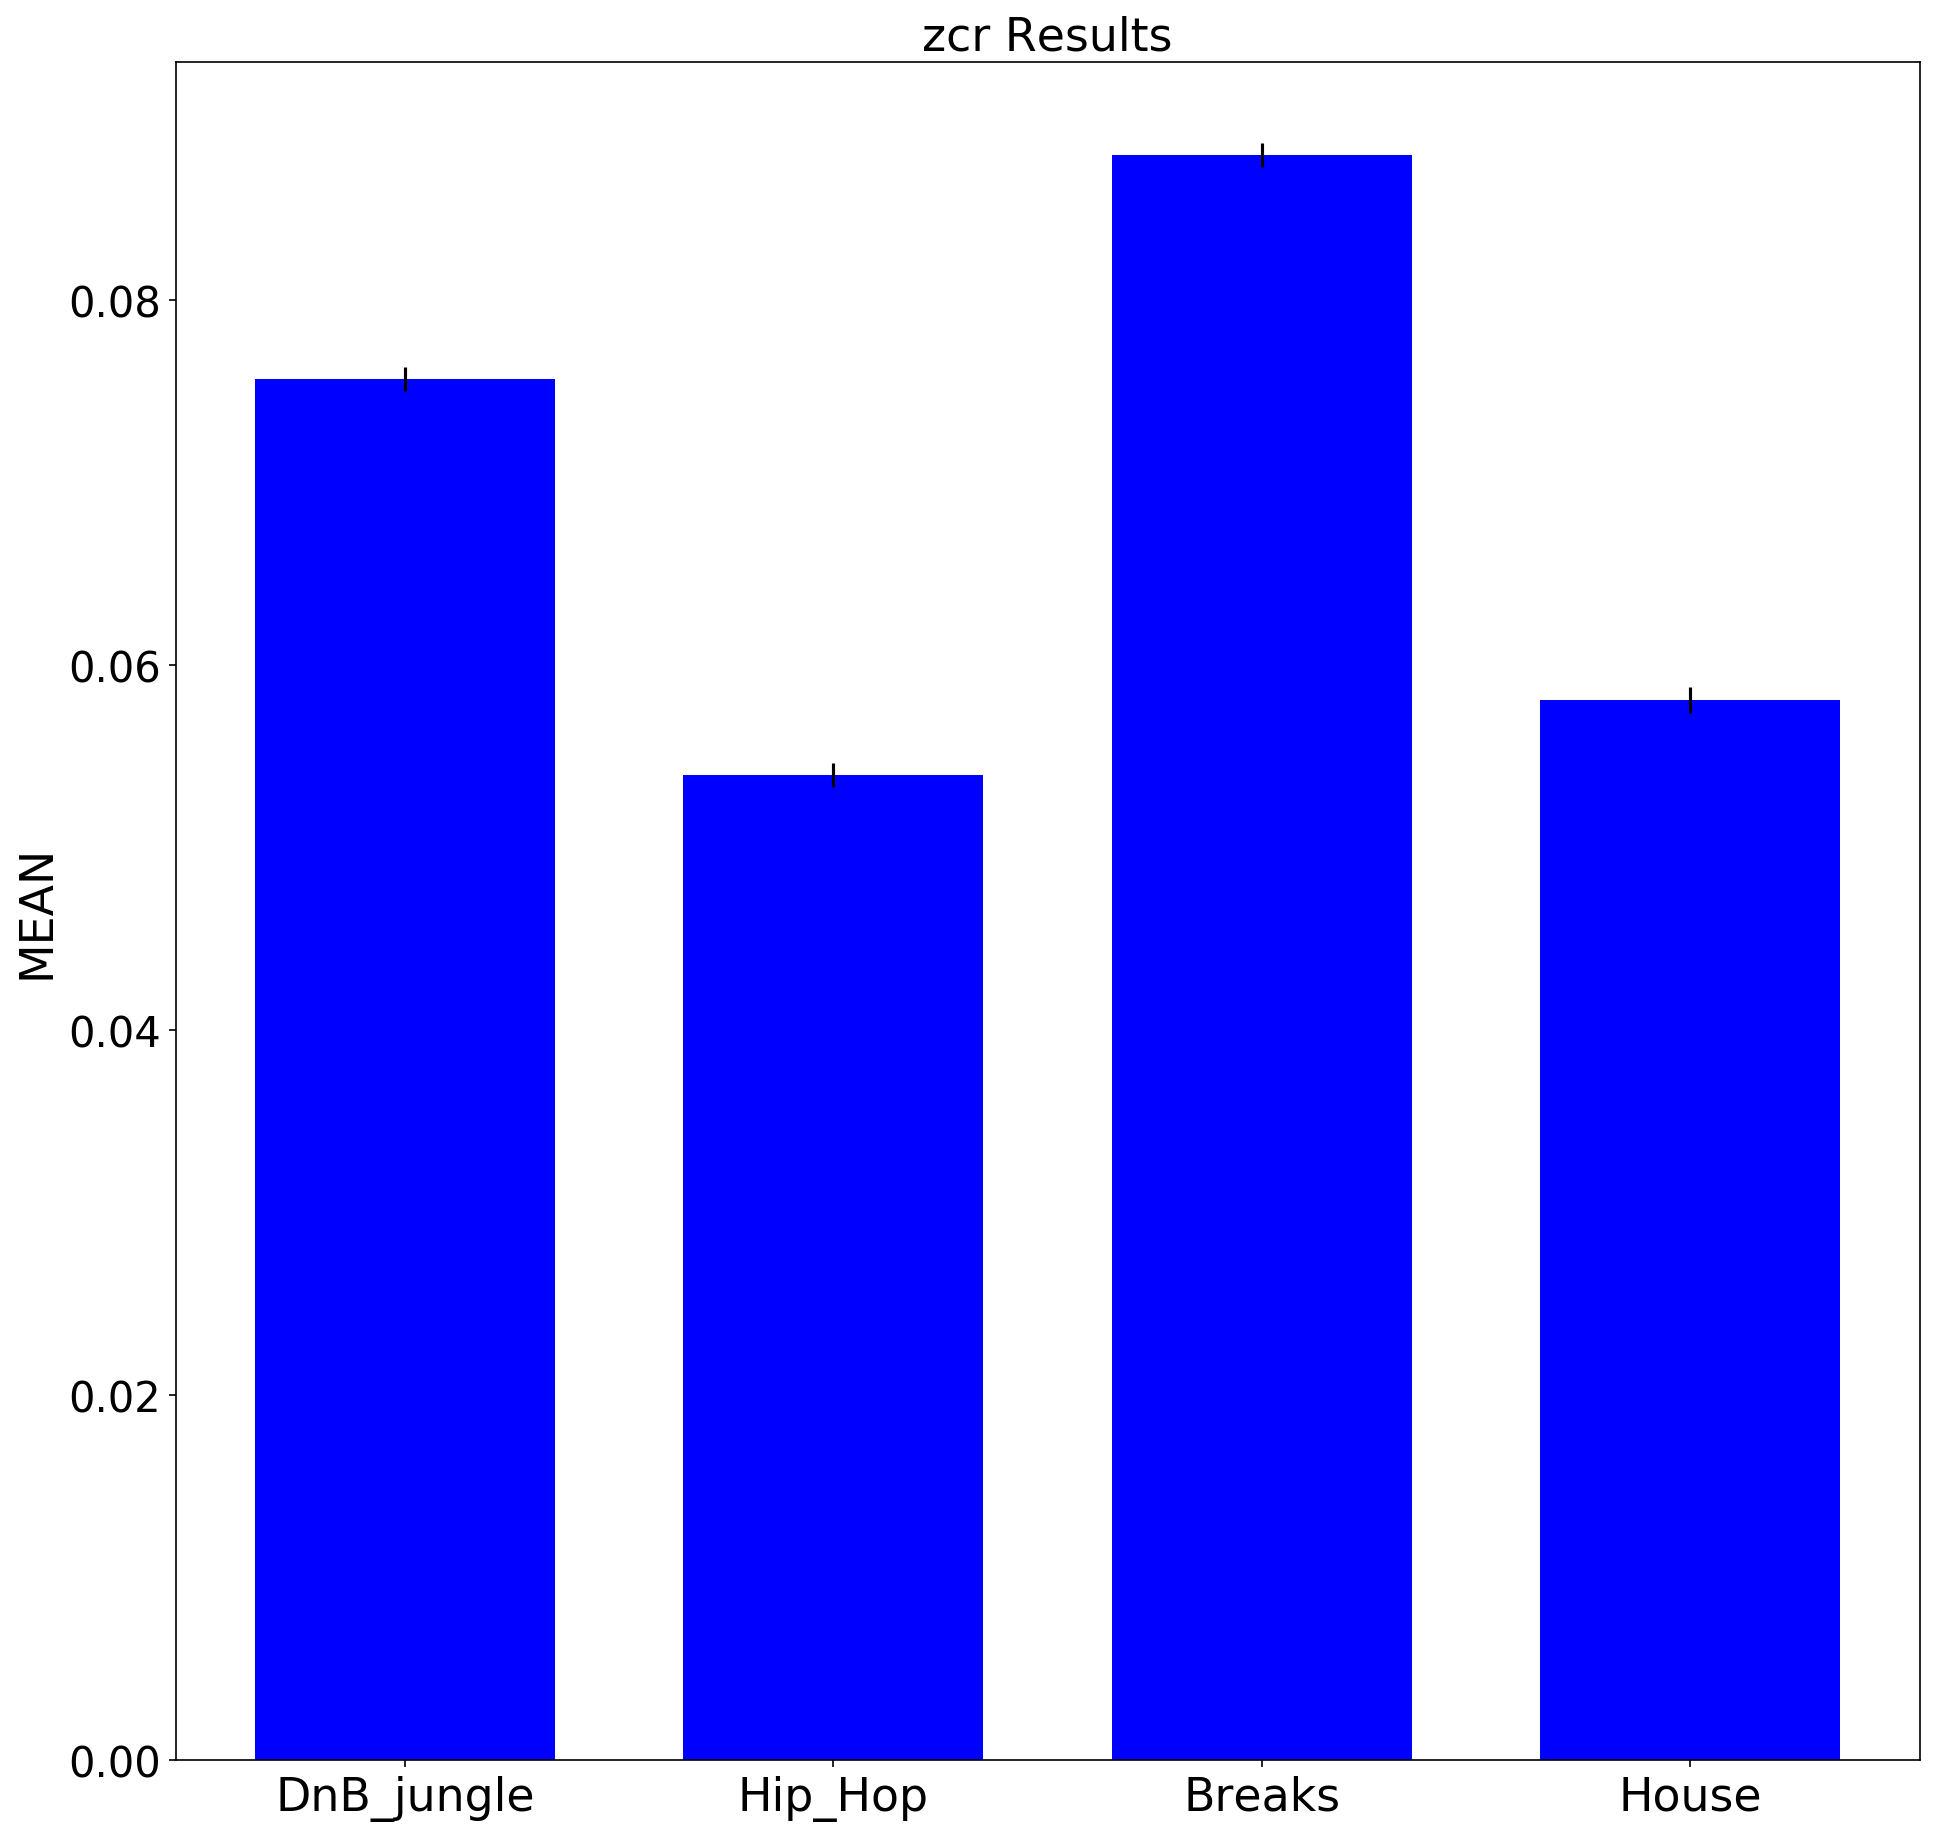

In [11]:
# plot ZCR for all genres

sndprcfunc.plot_comparison(sound_files_PP, "zcr")

# RMS - root mean square

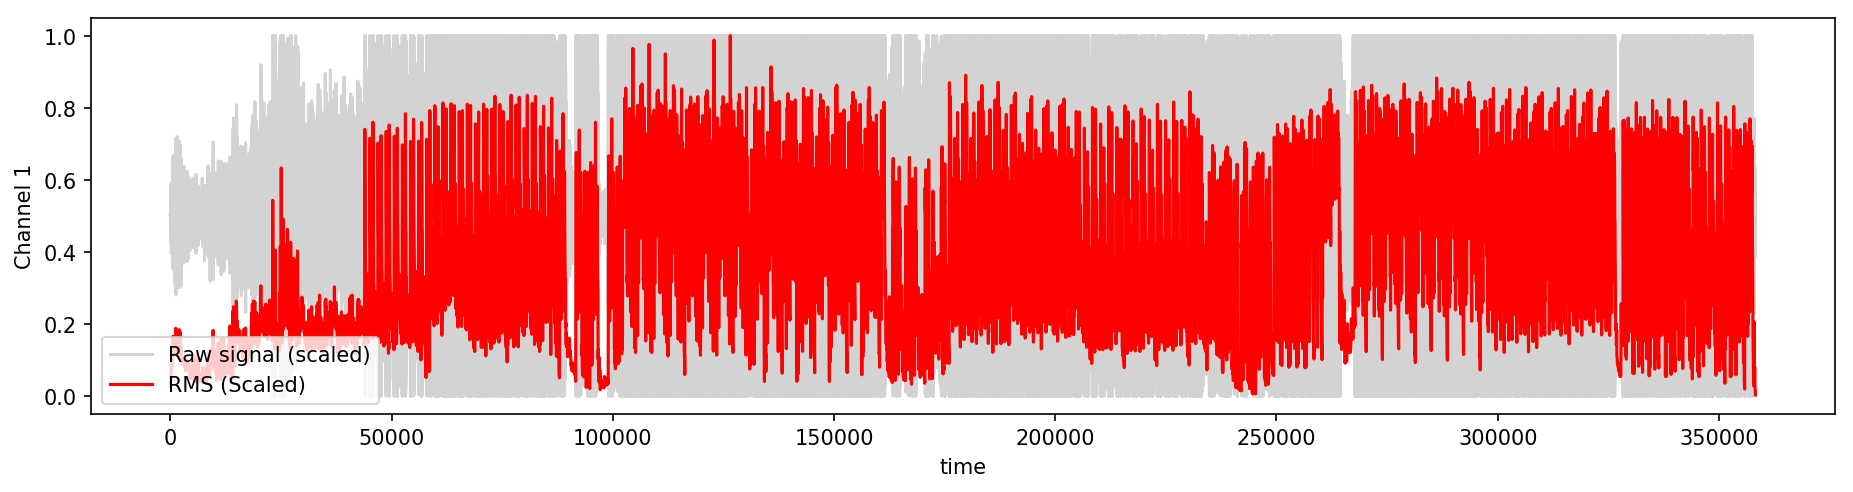

In [12]:
rms, ts = sndprcfunc.root_mean_square(sound_files[genre_ex]["wavedata"][0], 2048, sound_files[genre_ex]["samplerate"][0]);
sndprcfunc.show_feature_superimposed(sound_files, 0, genre_ex, rms, ts, 'RMS (Scaled)', squared_wf=False);

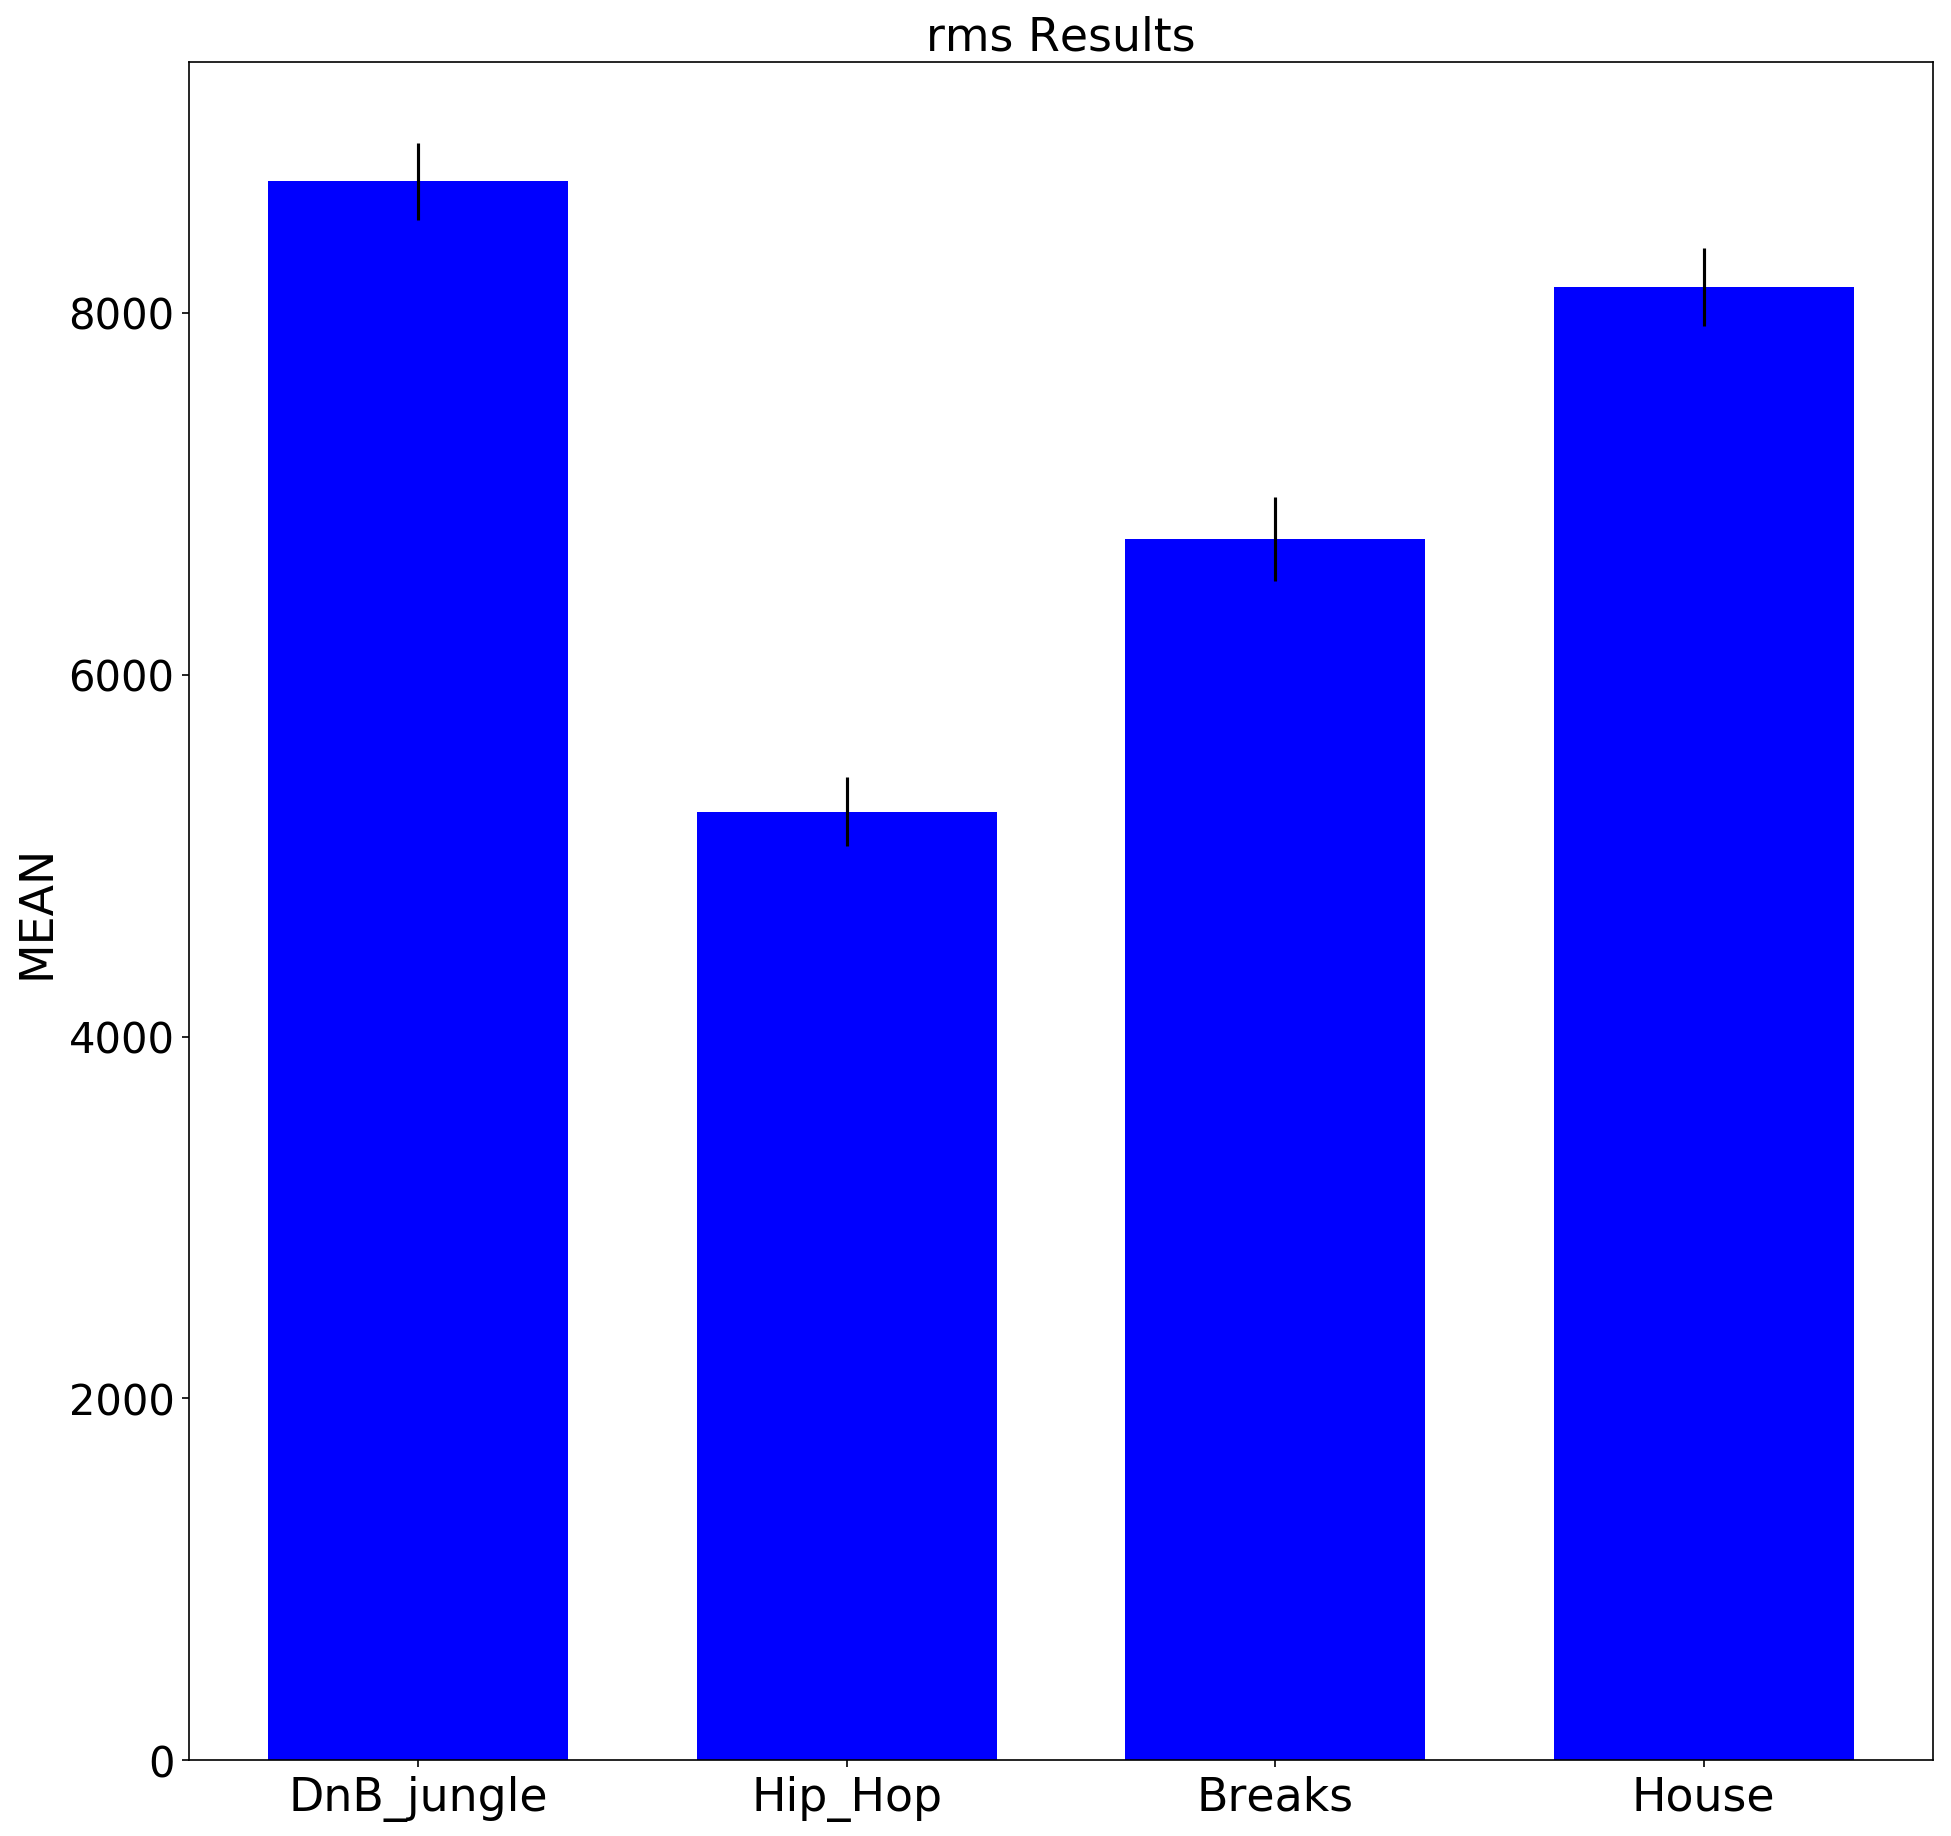

In [13]:
# plot root mean square across genres
sndprcfunc.plot_comparison(sound_files_PP, "rms")

# Spectral Features

# Spectral Centroid

/home/markhyphen/Dropbox/DS_Work-Dropbox/GH_Repos/Metis_projects/Music_Genre_Classification-Metis_Project_3_McNulty/sound_processing_functions.py:242: RuntimeWarning: invalid value encountered in double_scalars
  sc_t = np.sum(power_spectrum * np.arange(1, freqbins + 1)) / np.sum(power_spectrum)


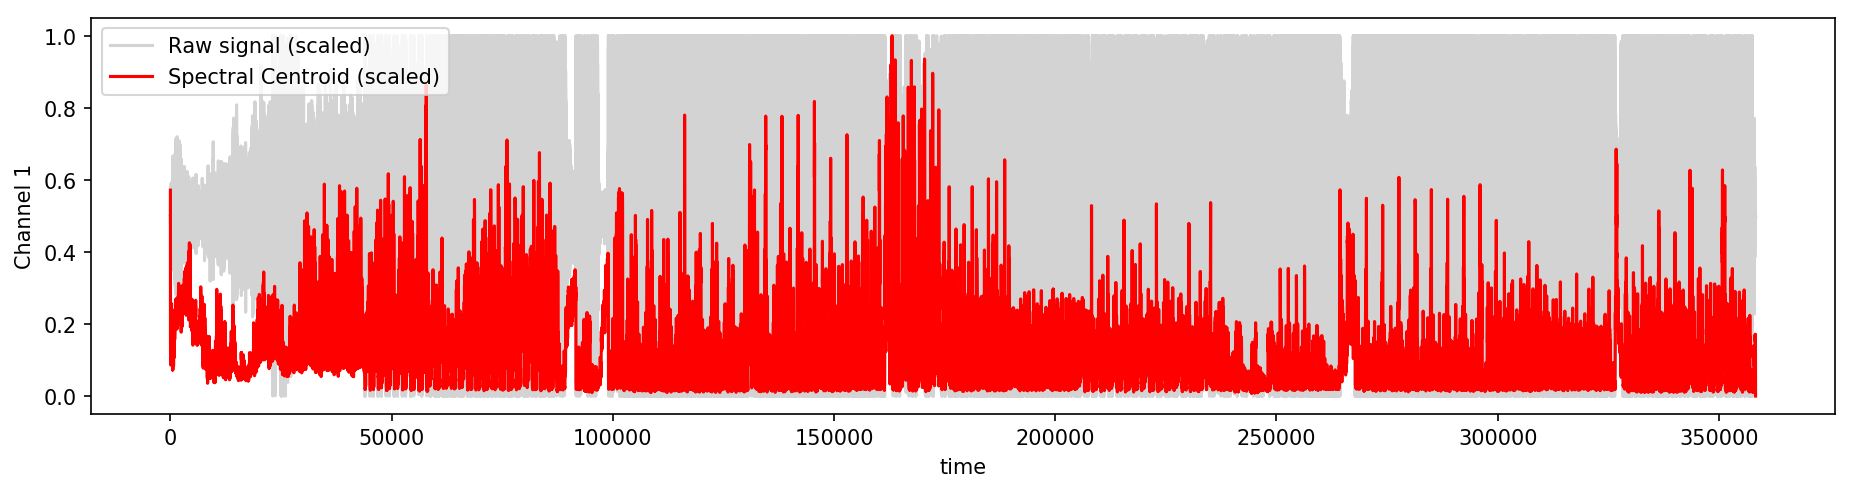

In [14]:
sc, ts = sndprcfunc.spectral_centroid(sound_files[genre_ex]["wavedata"][0], 1024, sound_files[genre_ex]["samplerate"][0])
sndprcfunc.show_feature_superimposed(sound_files, 0, genre_ex, sc, ts, 'Spectral Centroid (scaled)', squared_wf=False);

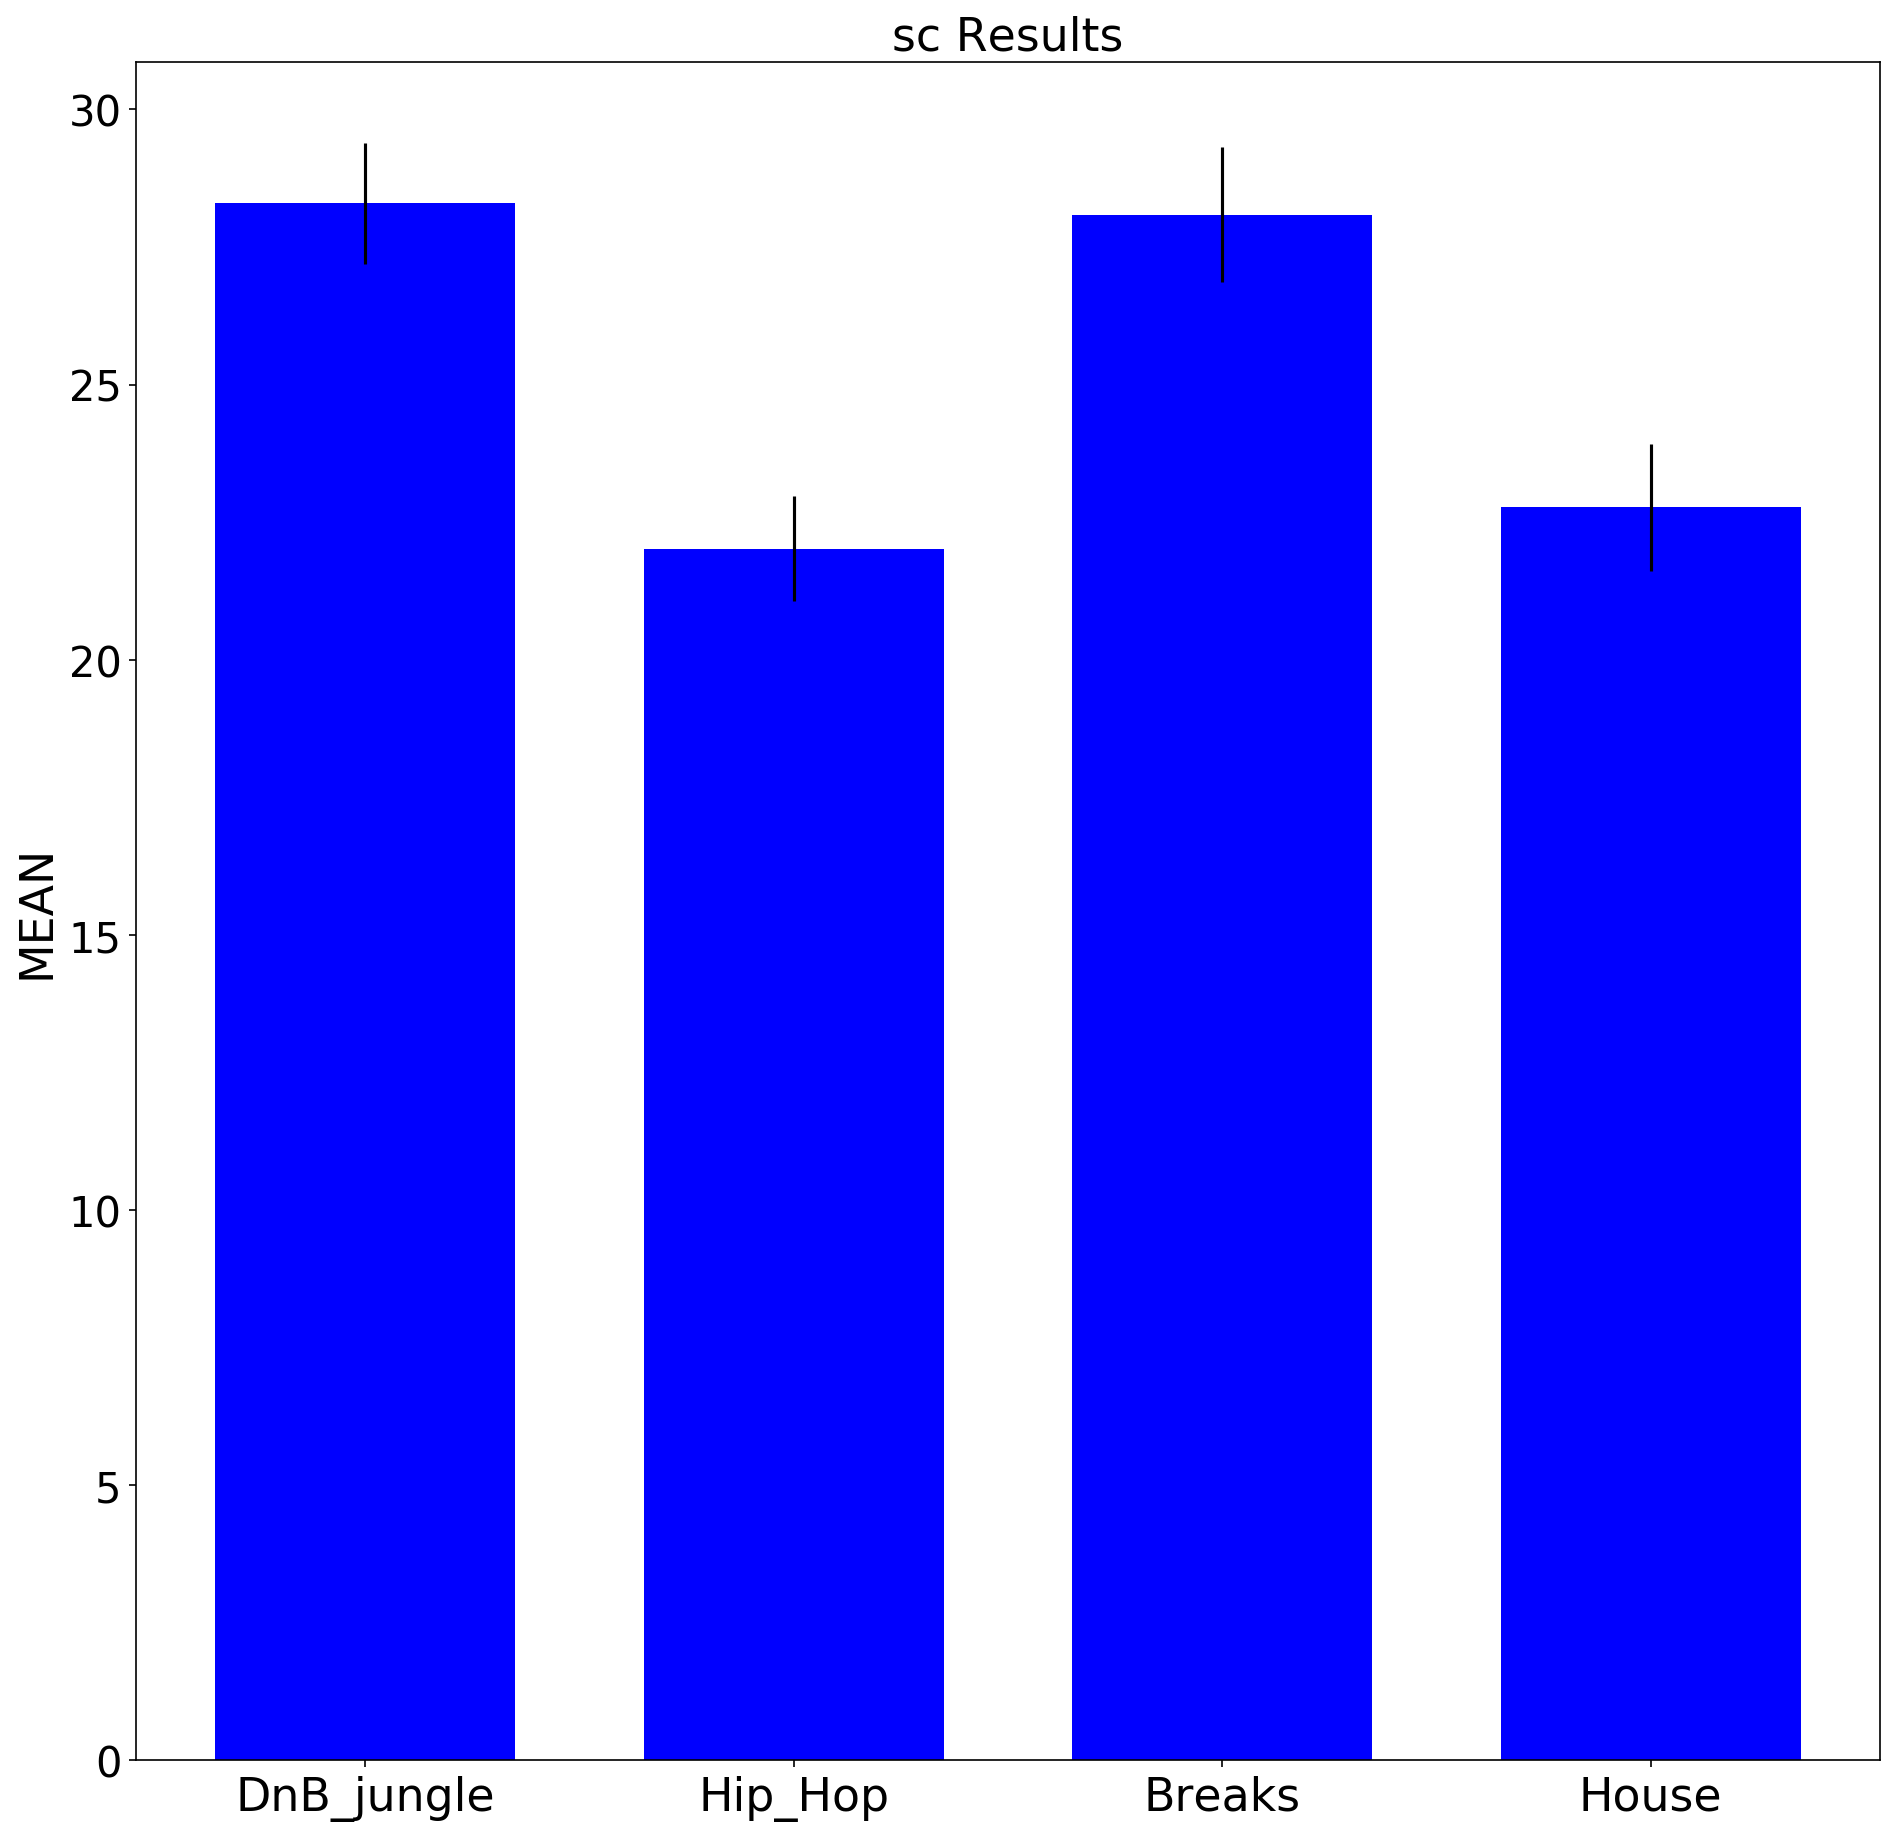

In [15]:
# plot Spectral Centroid across genres
sndprcfunc.plot_comparison(sound_files_PP, "sc")

# spectral rolloff

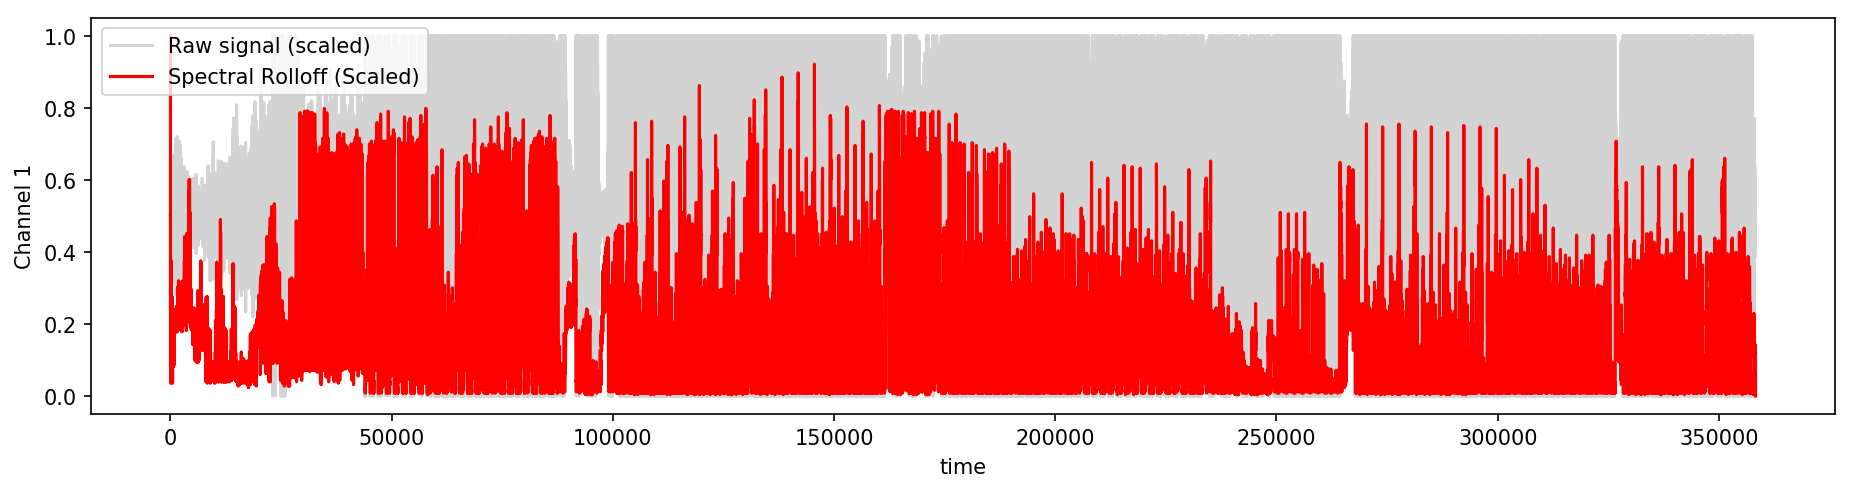

In [16]:
sr, ts = sndprcfunc.spectral_rolloff(sound_files[genre_ex]["wavedata"][0], 1024, sound_files[genre_ex]["samplerate"][0], k=0.85)
sndprcfunc.show_feature_superimposed(sound_files, 0, genre_ex, sr, ts, 'Spectral Rolloff (Scaled)', squared_wf=False);

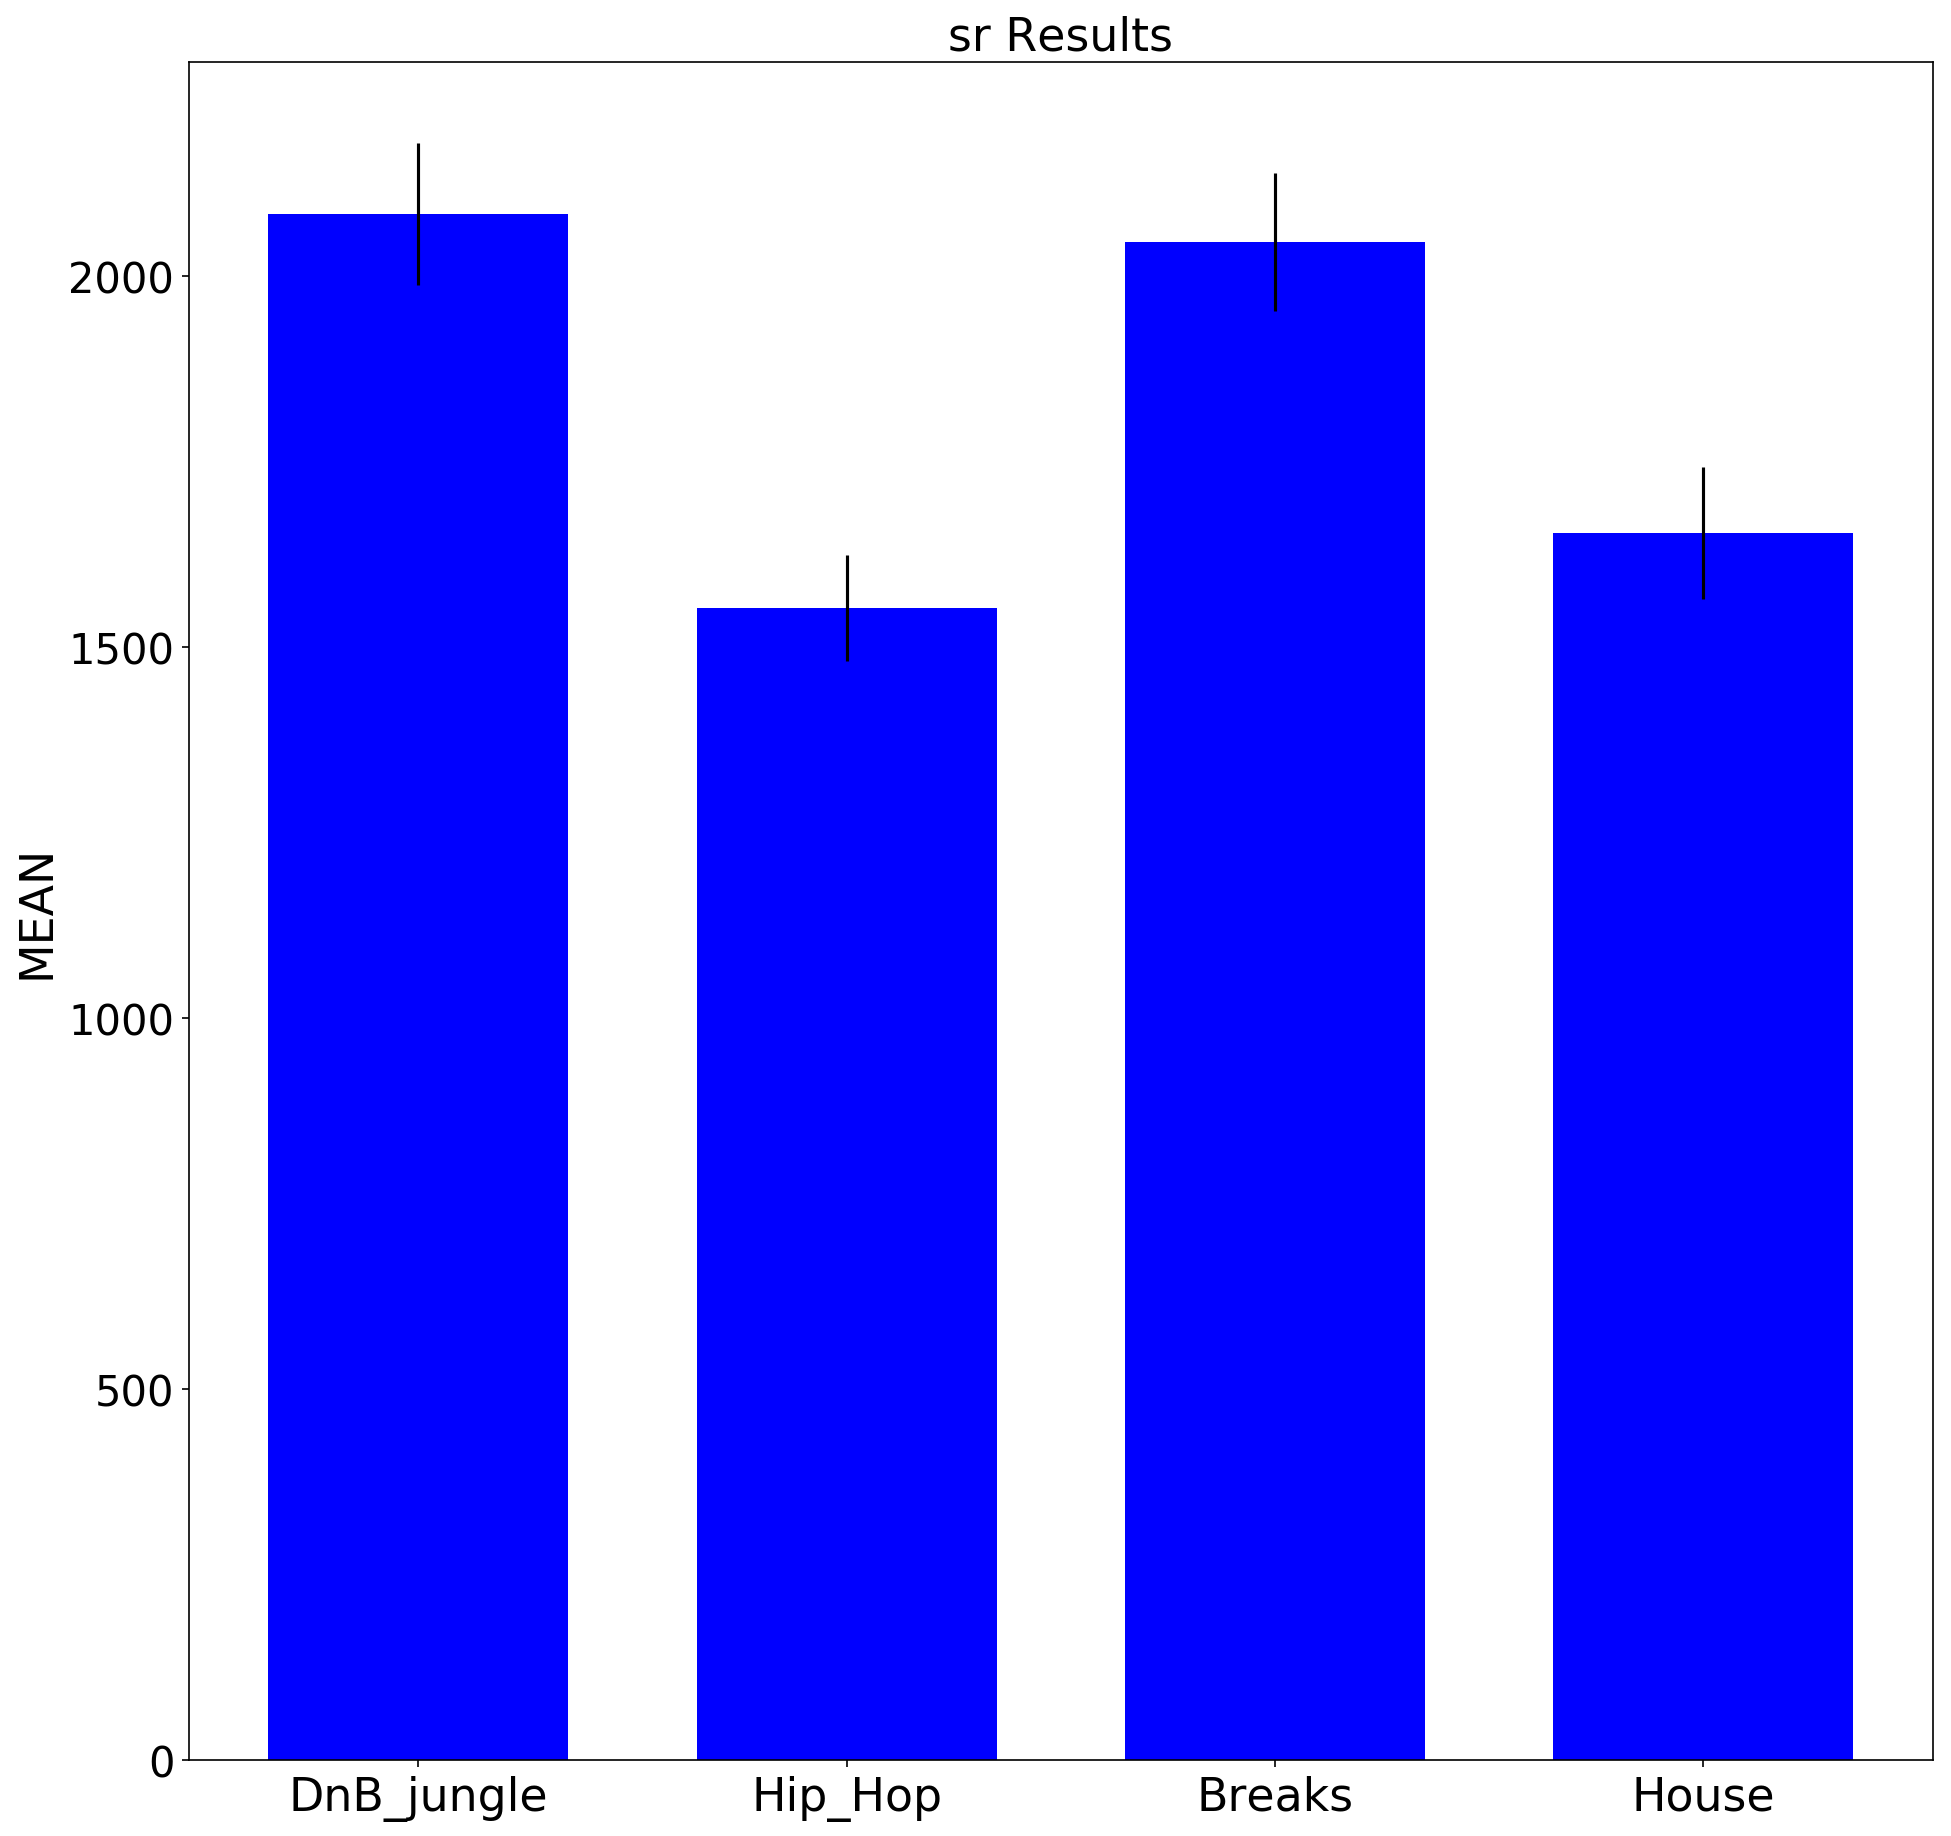

In [17]:
# plot Spectral Rolloff across genres
sndprcfunc.plot_comparison(sound_files_PP, "sr")


# Spectral flux

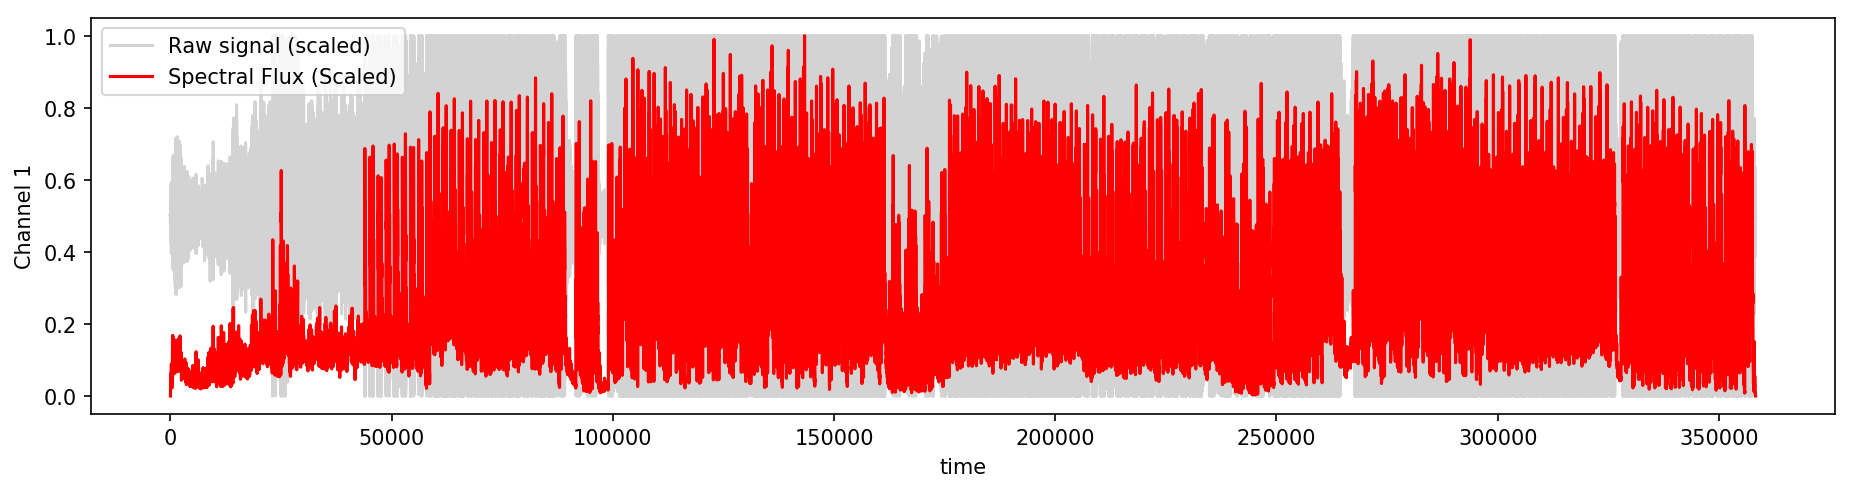

In [18]:
sf, ts = sndprcfunc.spectral_flux(sound_files[genre_ex]["wavedata"][0], 1024, sound_files[genre_ex]["samplerate"][0])
sndprcfunc.show_feature_superimposed(sound_files, 0, genre_ex, sf, ts, 'Spectral Flux (Scaled)');

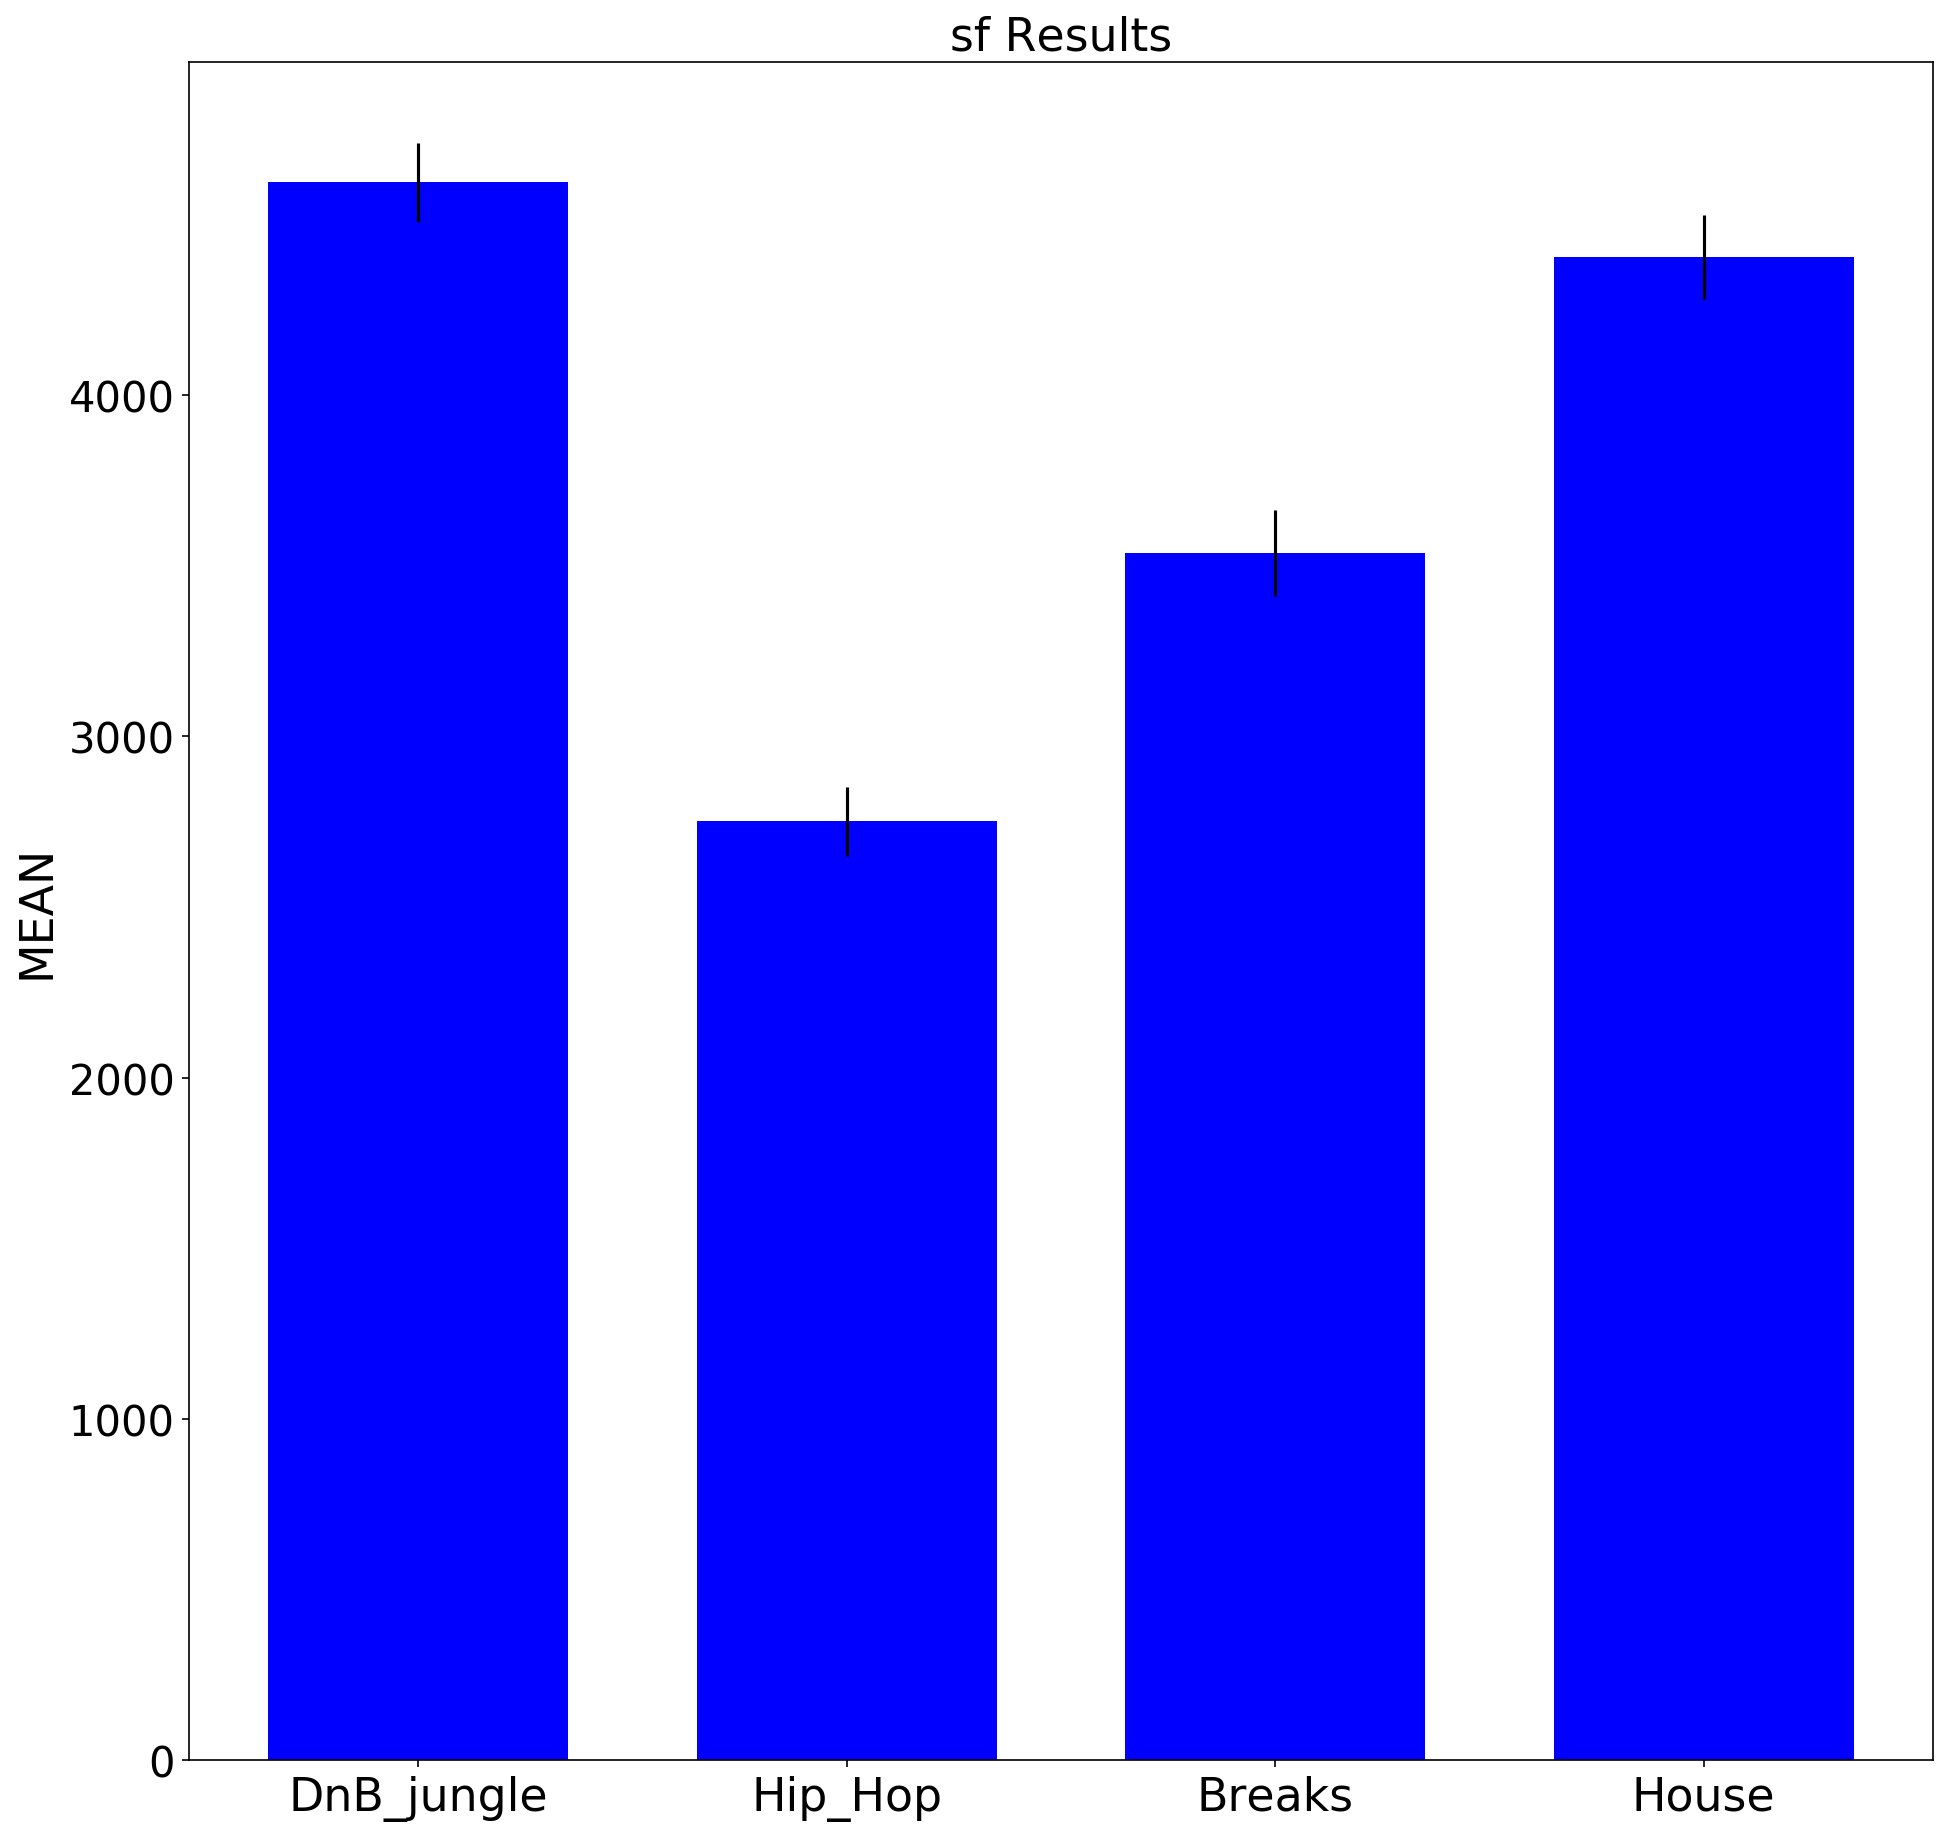

In [19]:
# plot spectral flux across genres
sndprcfunc.plot_comparison(sound_files_PP, "sf")

# Psychoaccoustical Features

# Mel-Frequency Cepstral Coefficients (MFCC)

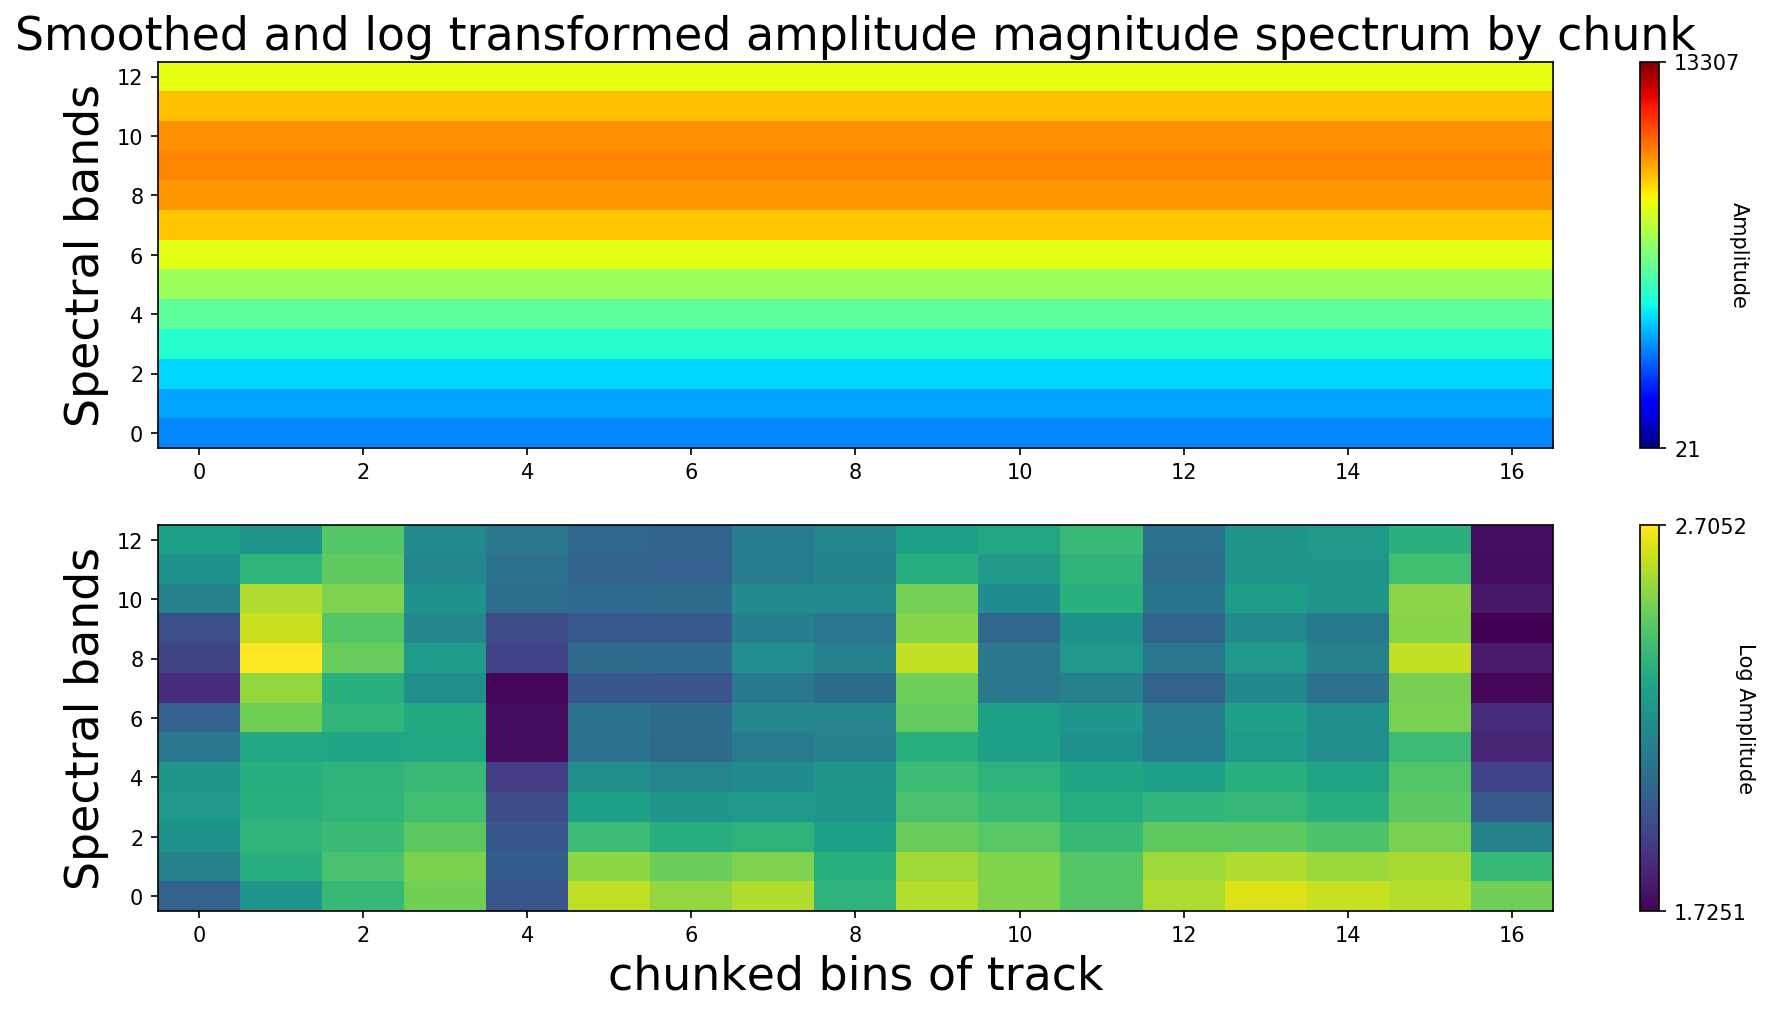

In [20]:
MFCCs_1, mspec_1, spec_1 = sndprcfunc.get_MFCCs_type_1(sound_files[genre_ex]["wavedata"][0], sound_files[genre_ex]["samplerate"][0], True)
sndprcfunc.plot_magnitude_spectrum(spec_1, mspec_1)


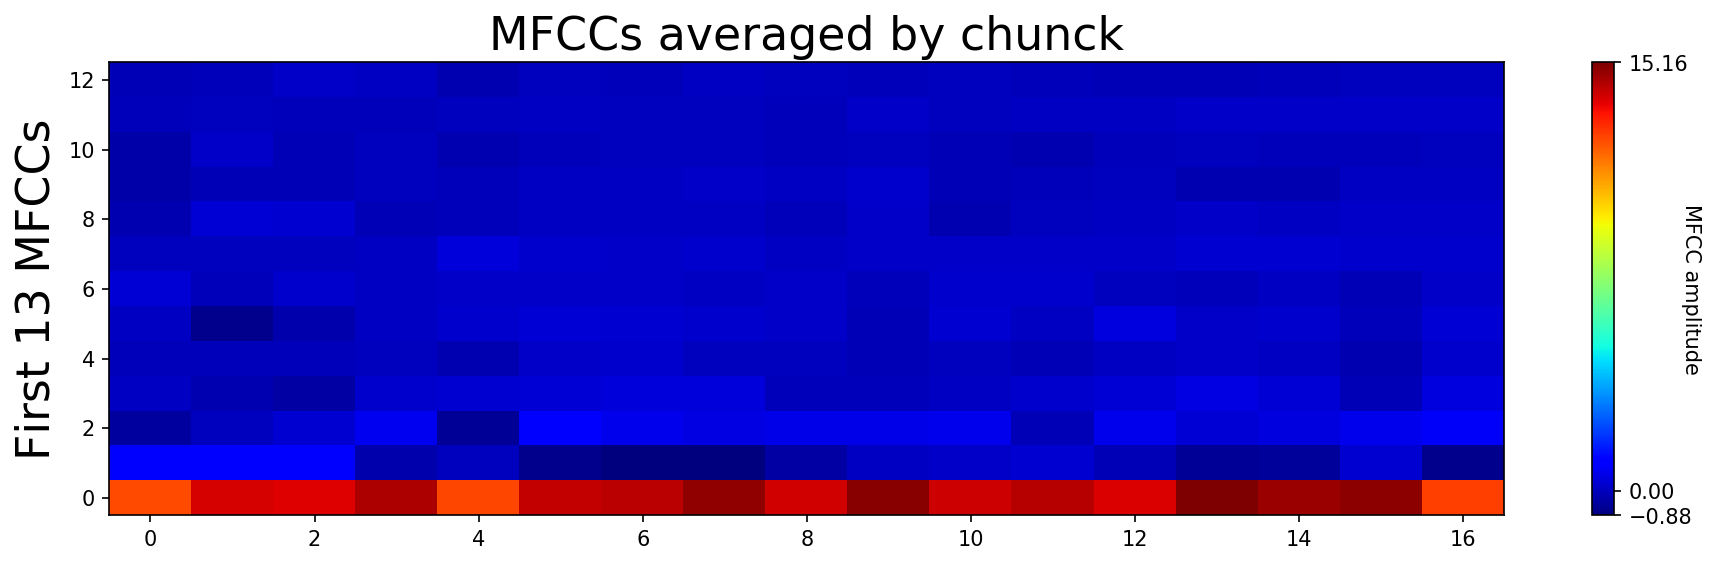

In [21]:
sndprcfunc.plot_mfccs(MFCCs_1)

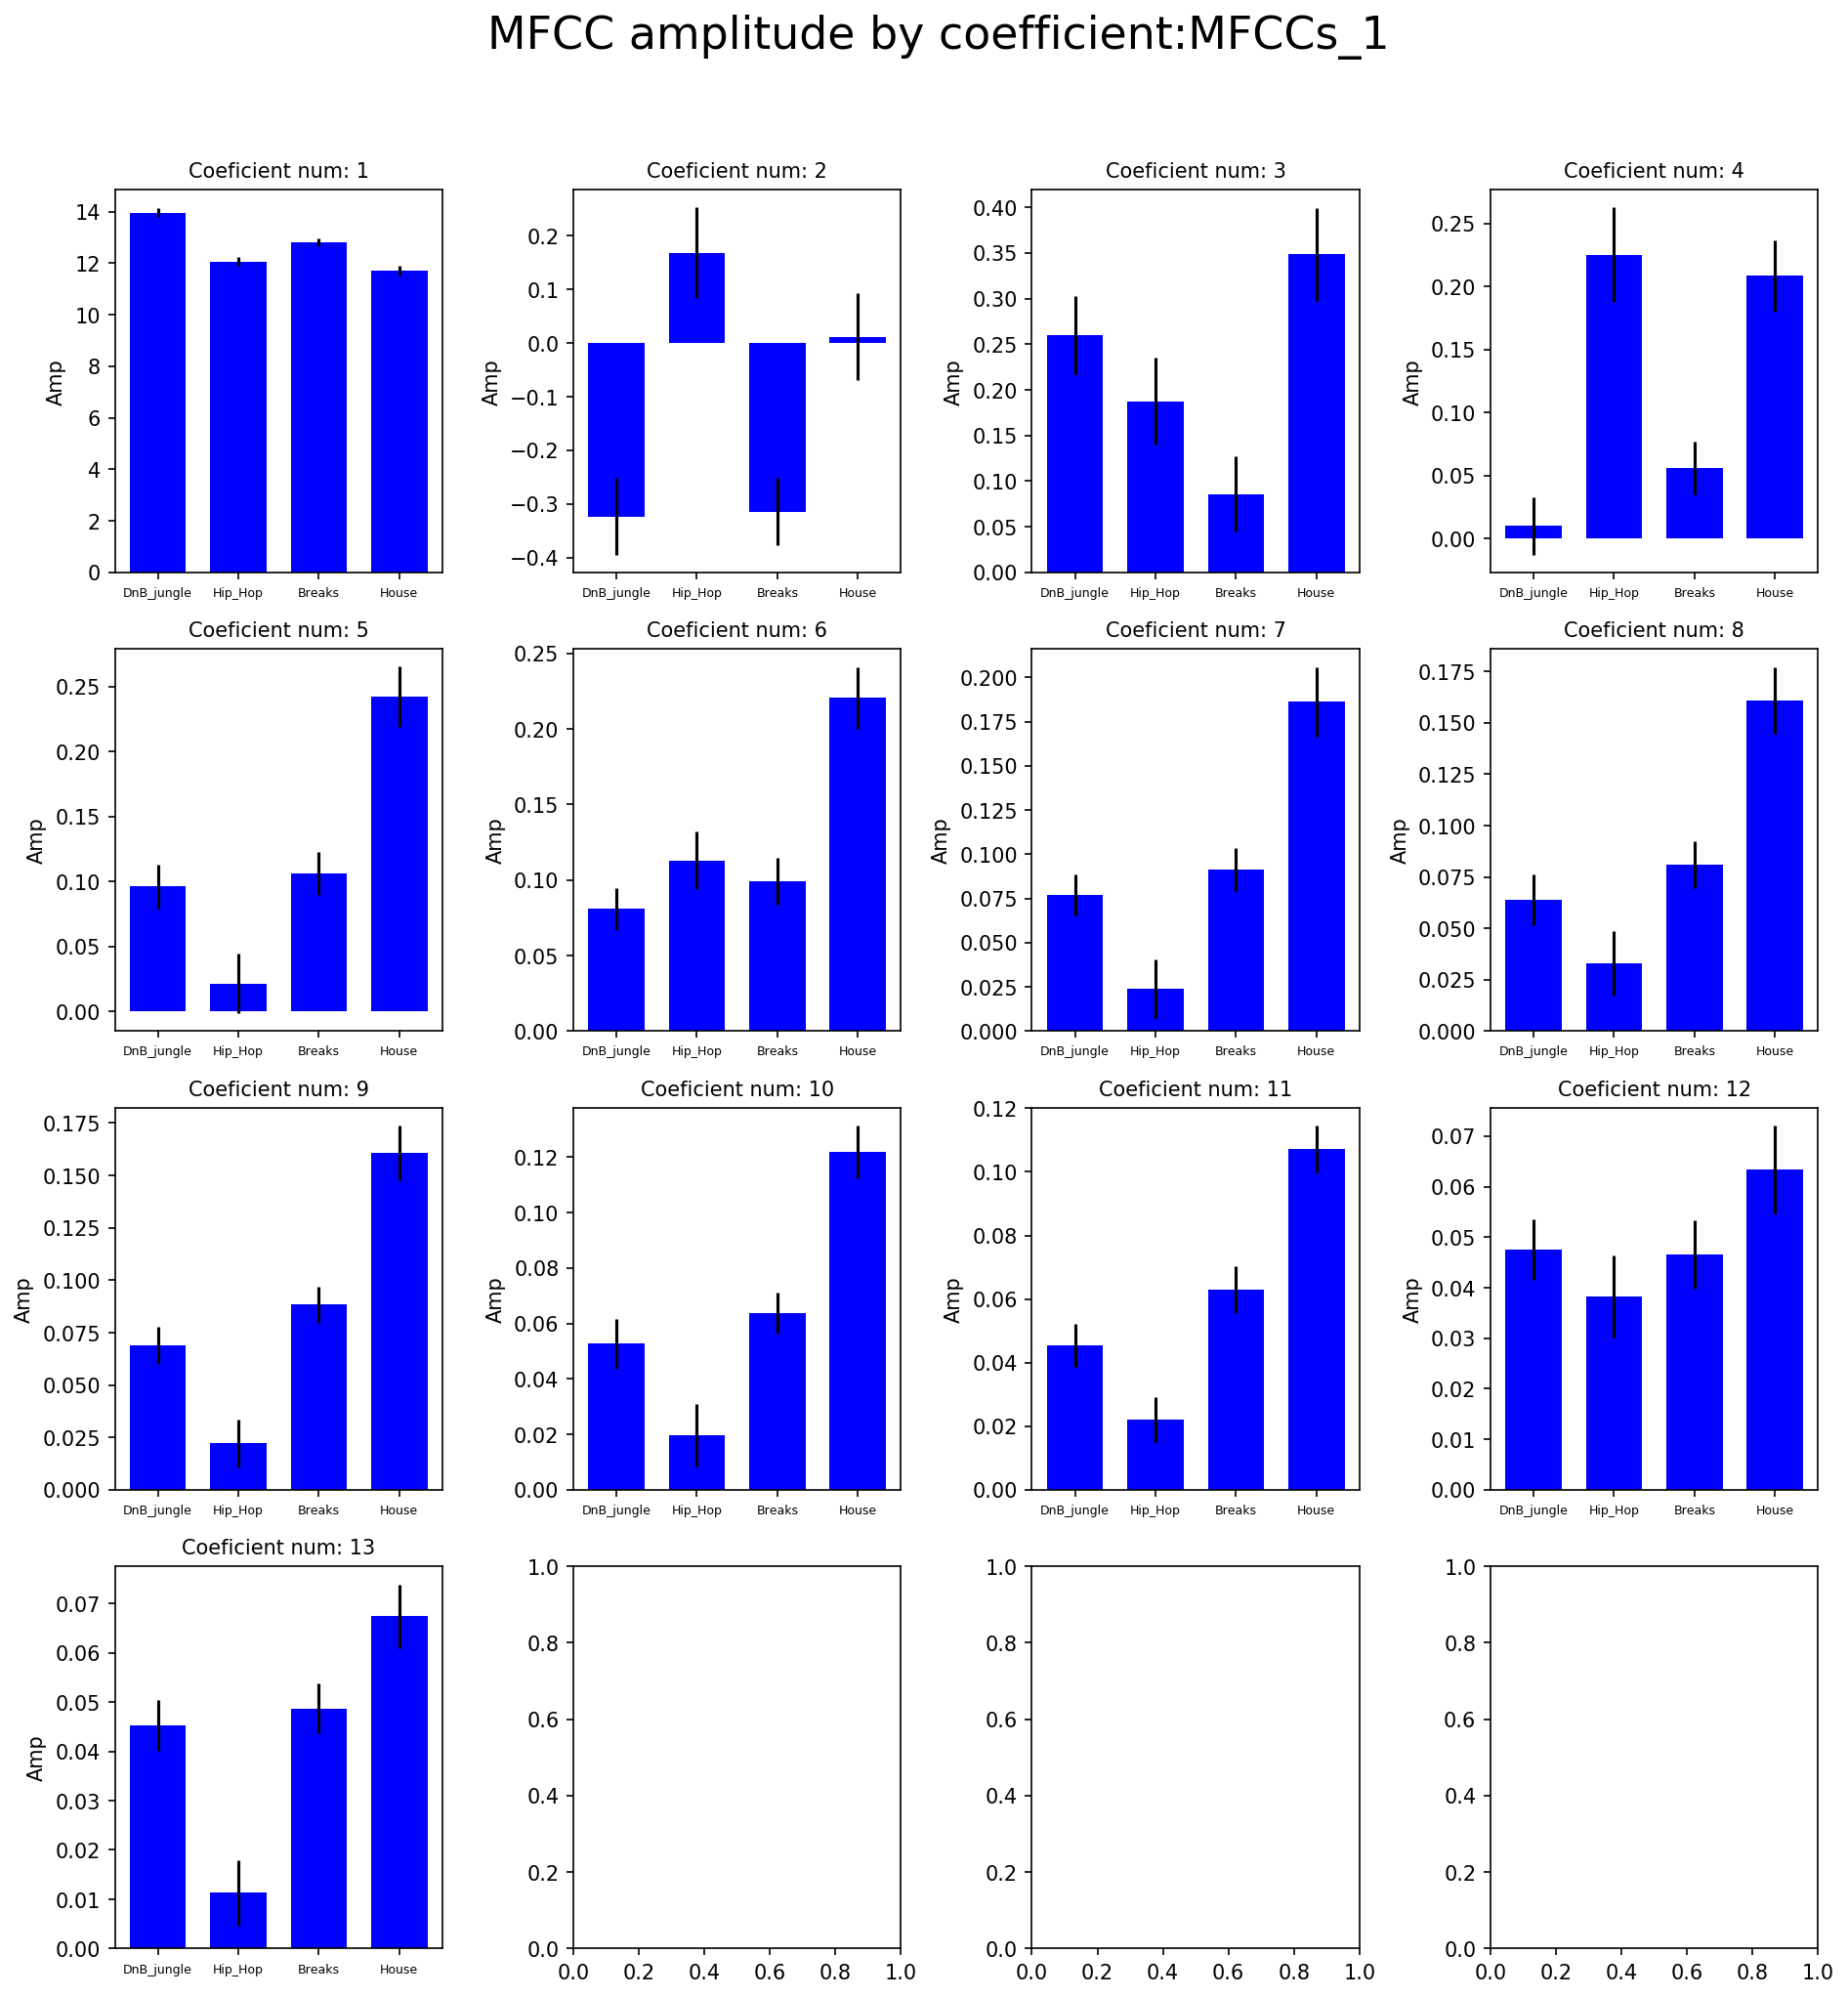

In [22]:
# plot type 1 MFCCs across genres
sndprcfunc.plot_cross_group_MFCCs(sound_files_PP, "MFCCs_1")

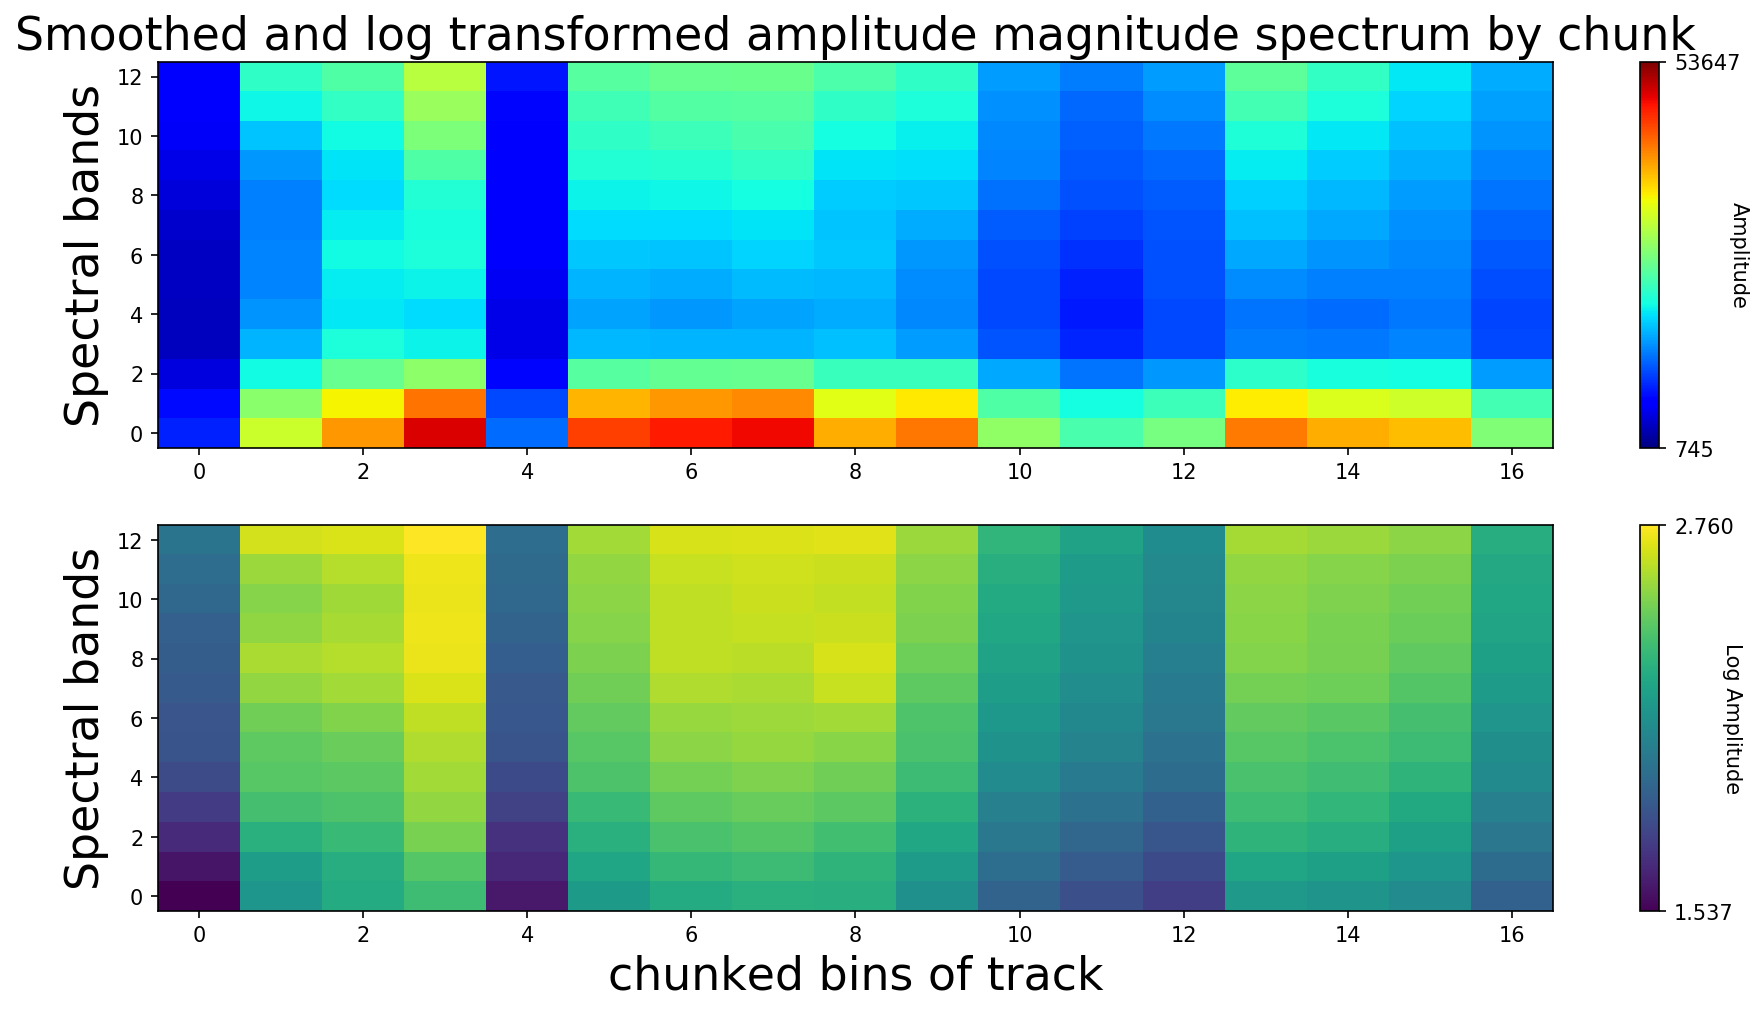

In [23]:
MFCCs_2, mspec_2, spec_2 = sndprcfunc.get_MFCCs_type_2(sound_files[genre_ex]["wavedata"][0], sound_files[genre_ex]["samplerate"][0], True)
sndprcfunc.plot_magnitude_spectrum(spec_2, mspec_2)

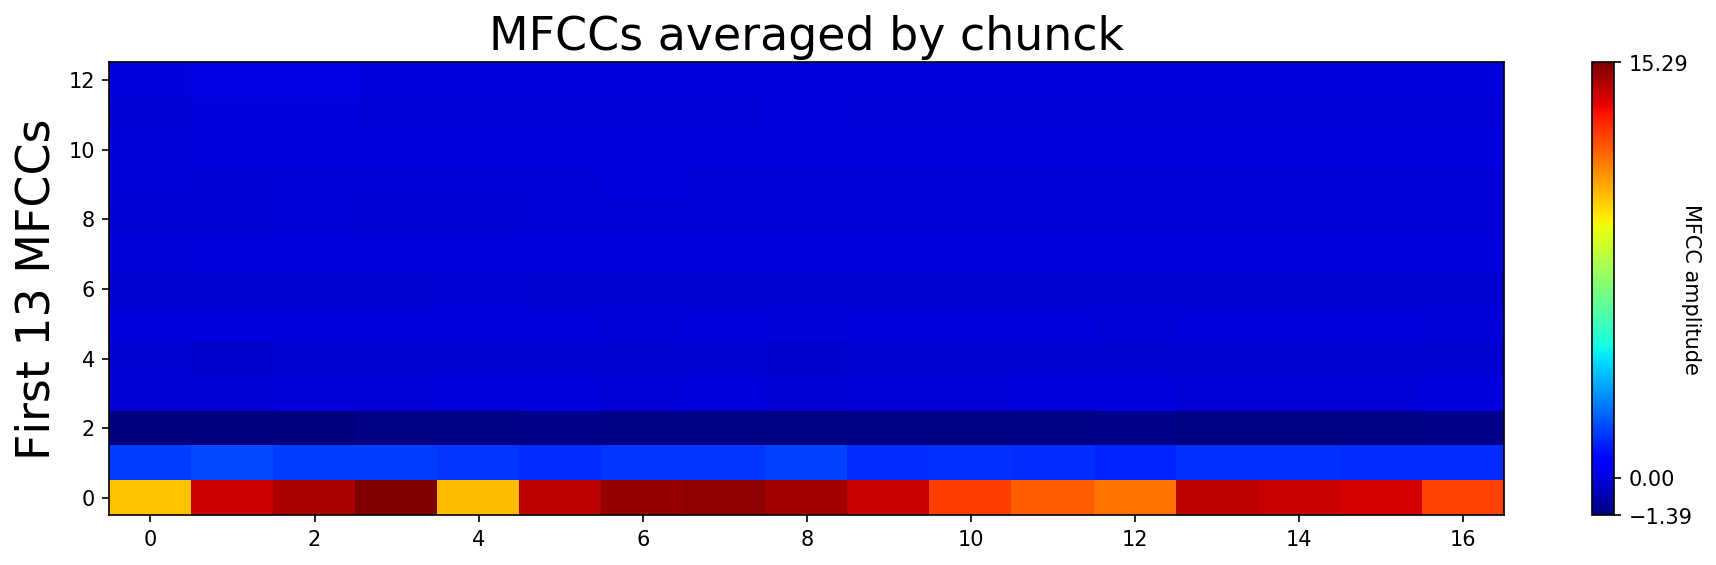

In [24]:
sndprcfunc.plot_mfccs(MFCCs_2)

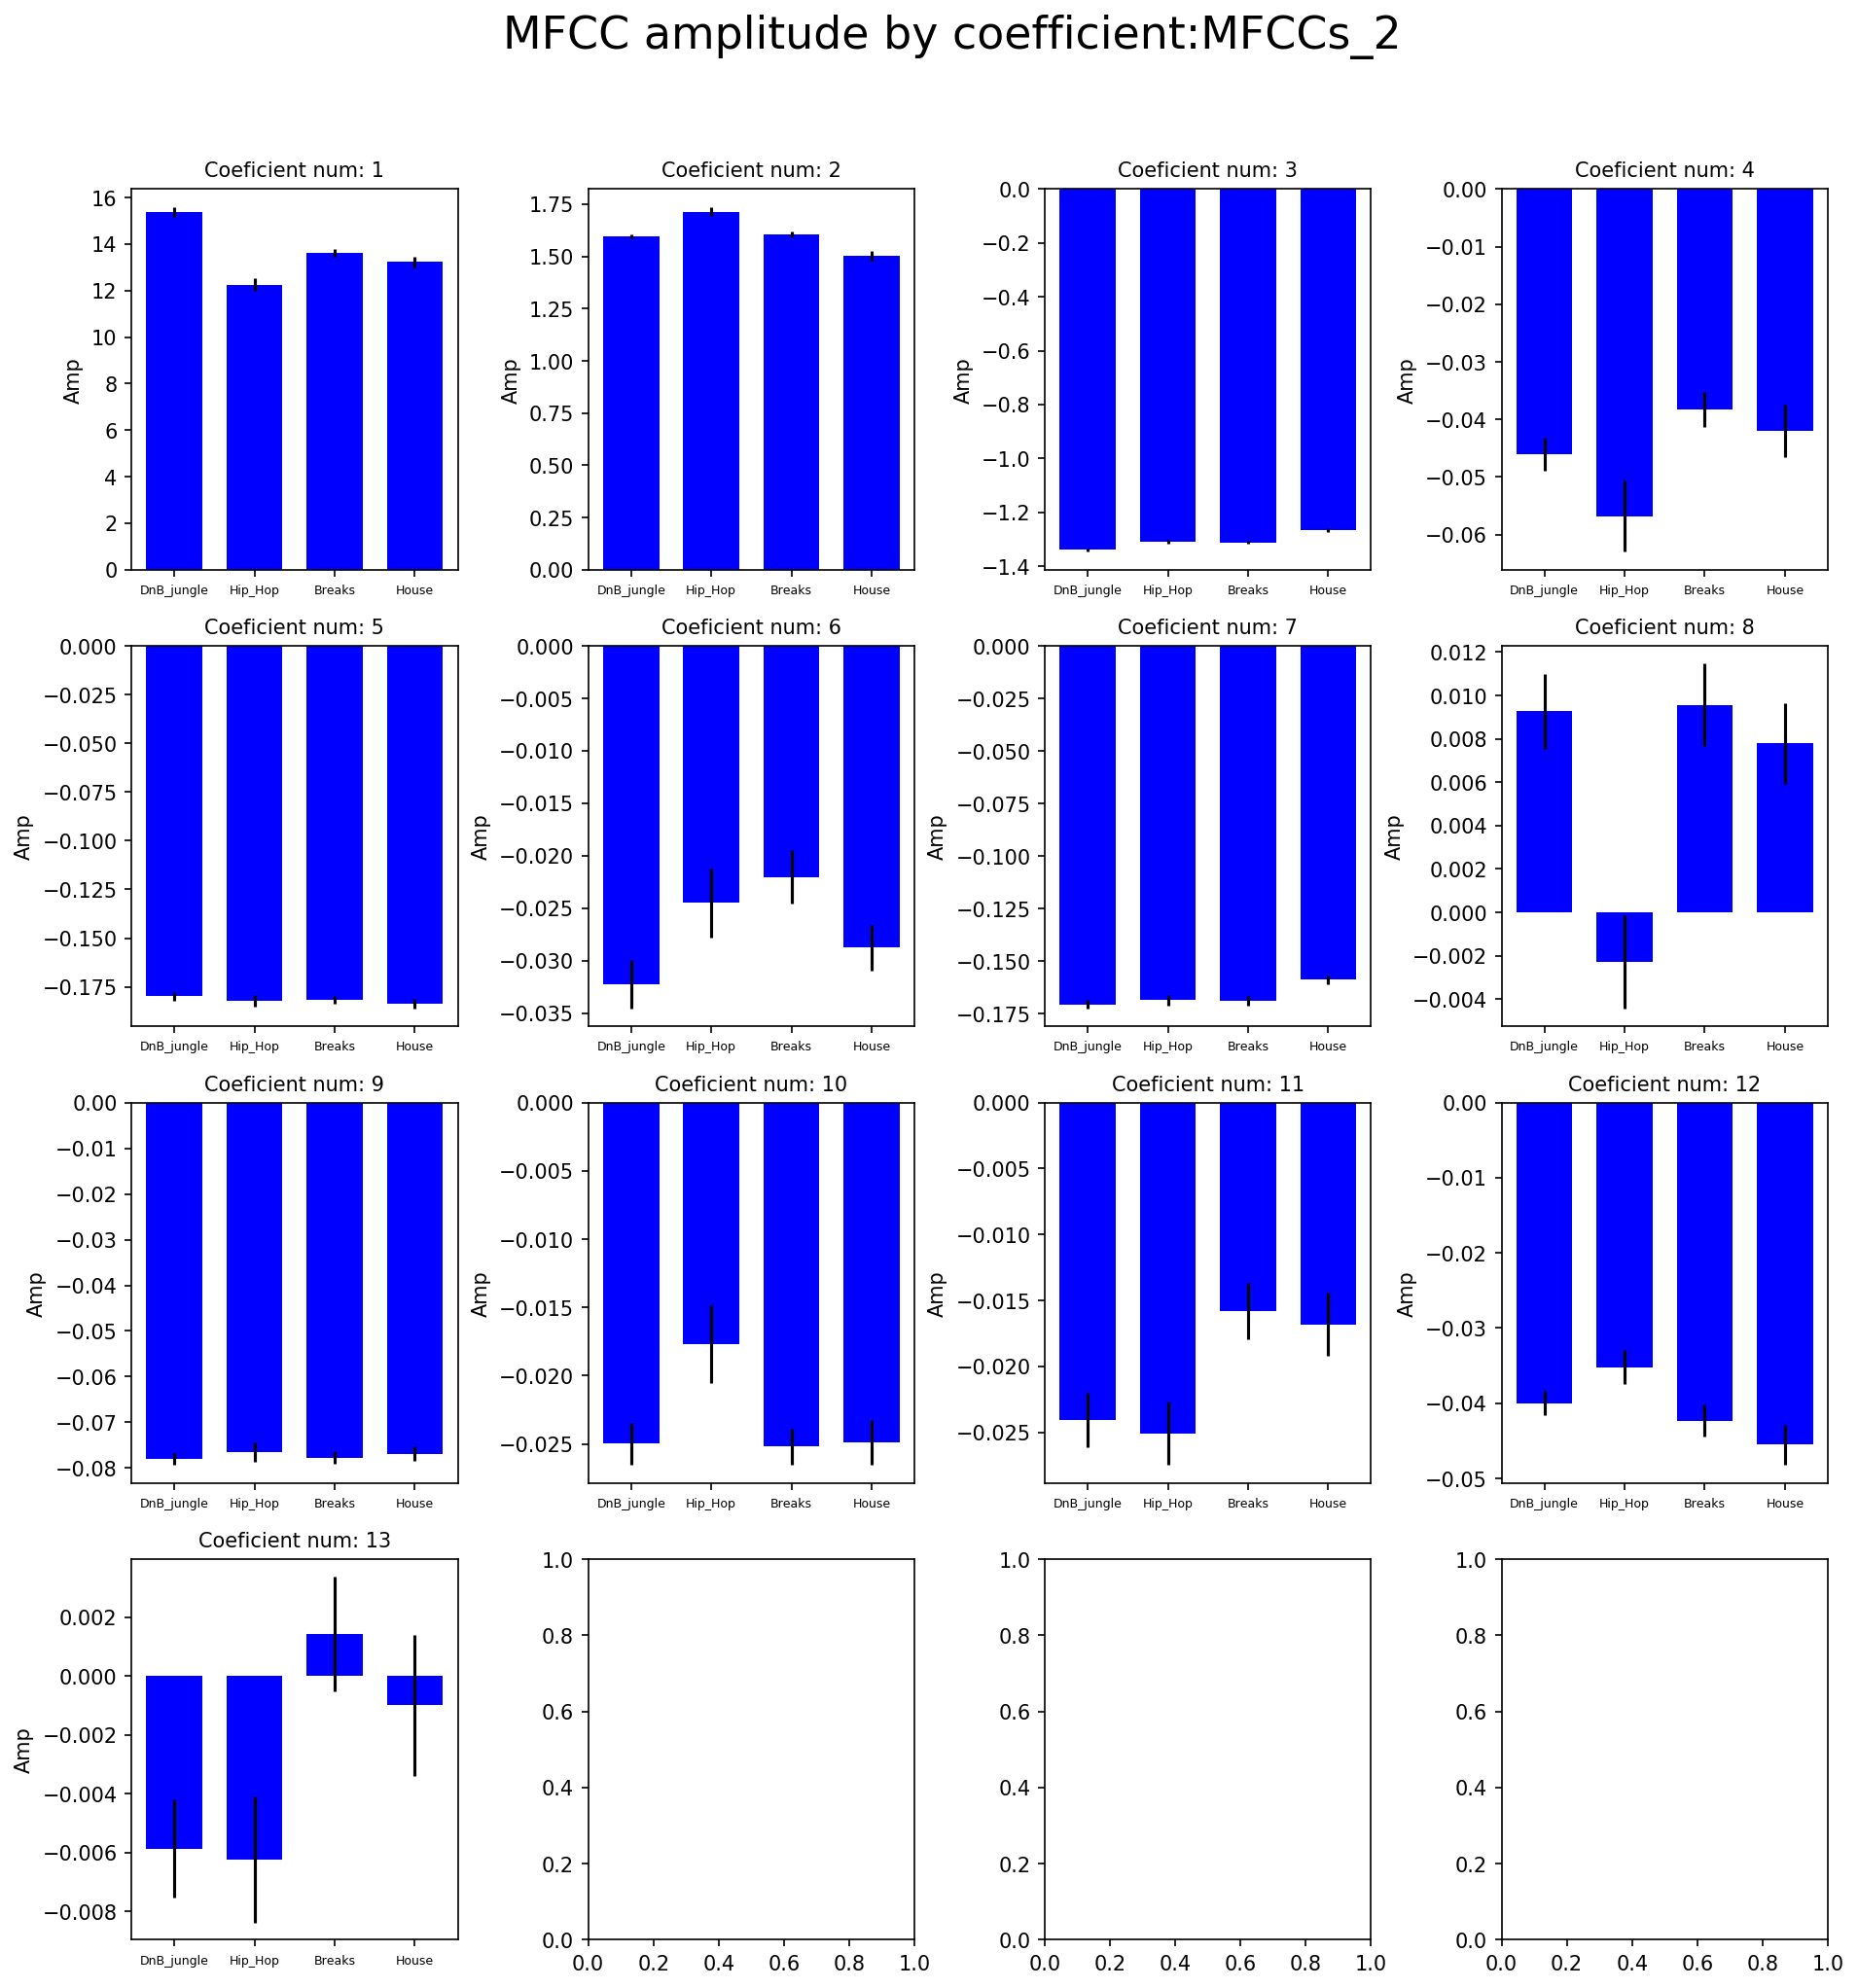

In [25]:
# plot type 2 MFCCs across genres
sndprcfunc.plot_cross_group_MFCCs(sound_files_PP, "MFCCs_2")

# Statistical Spectrum Descriptors - describe the rhythmic content of a piece of audio by computing the following statistical moments on the Sonogram values of each of the critical bands: mean, median, variance, skewness, kurtosis, min- and max-value

/home/markhyphen/Dropbox/DS_Work-Dropbox/GH_Repos/Metis_projects/Music_Genre_Classification-Metis_Project_3_McNulty/sound_processing_functions.py:611: RuntimeWarning: divide by zero encountered in true_divide
  fluct_curve = 1 / (mod_freq_axis / 4 + 4 / mod_freq_axis)
/home/markhyphen/Dropbox/DS_Work-Dropbox/GH_Repos/Metis_projects/Music_Genre_Classification-Metis_Project_3_McNulty/sound_processing_functions.py:634: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrogr[:, j] = periodogram(x=wavsegment[idx], win=w)


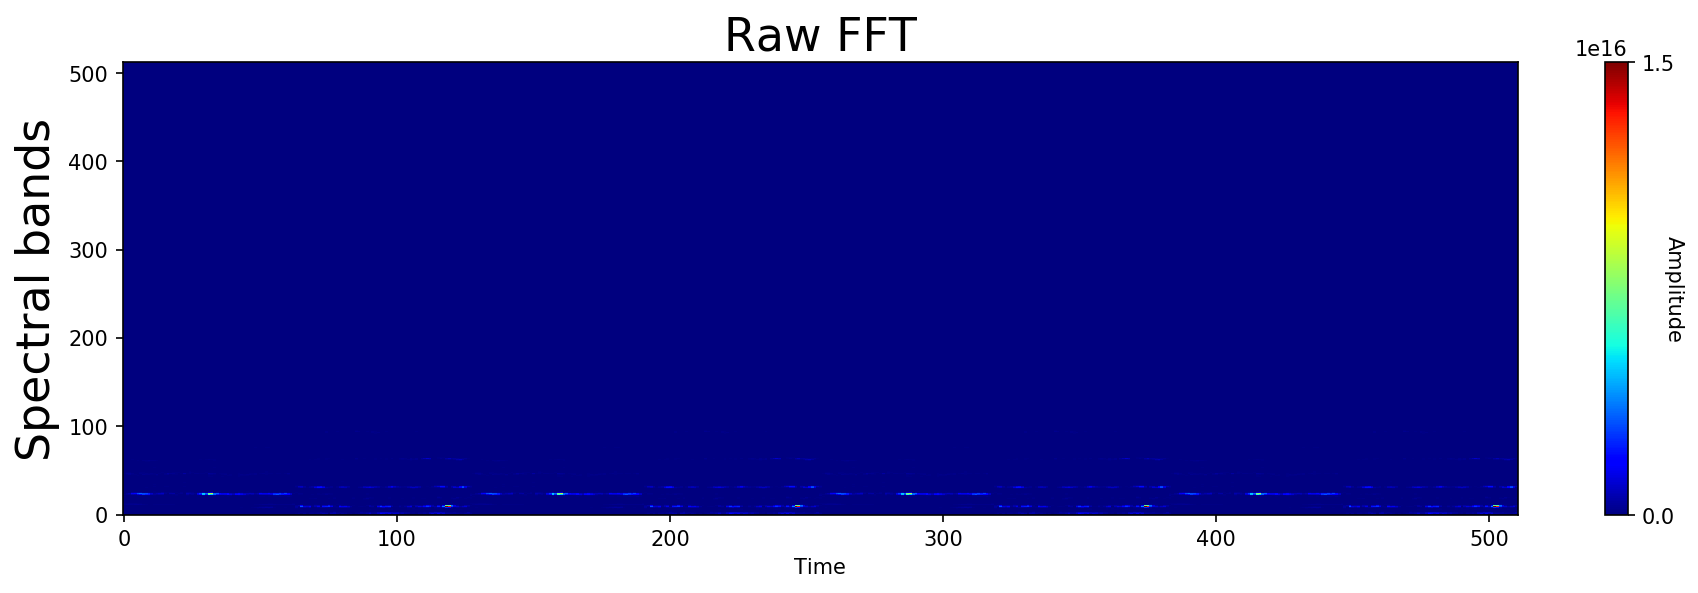

In [26]:
ssd, rh, rp, spec_raw, spec_bark, spec_masked, spec_decible, spec_phon, spec_sone = \
    sndprcfunc.do_rythm_analysis(sound_files[genre_ex]["wavedata"][0], sound_files[genre_ex]["samplerate"][0], True)
sndprcfunc.plot_spectrogram(spec_raw, 'Raw FFT')


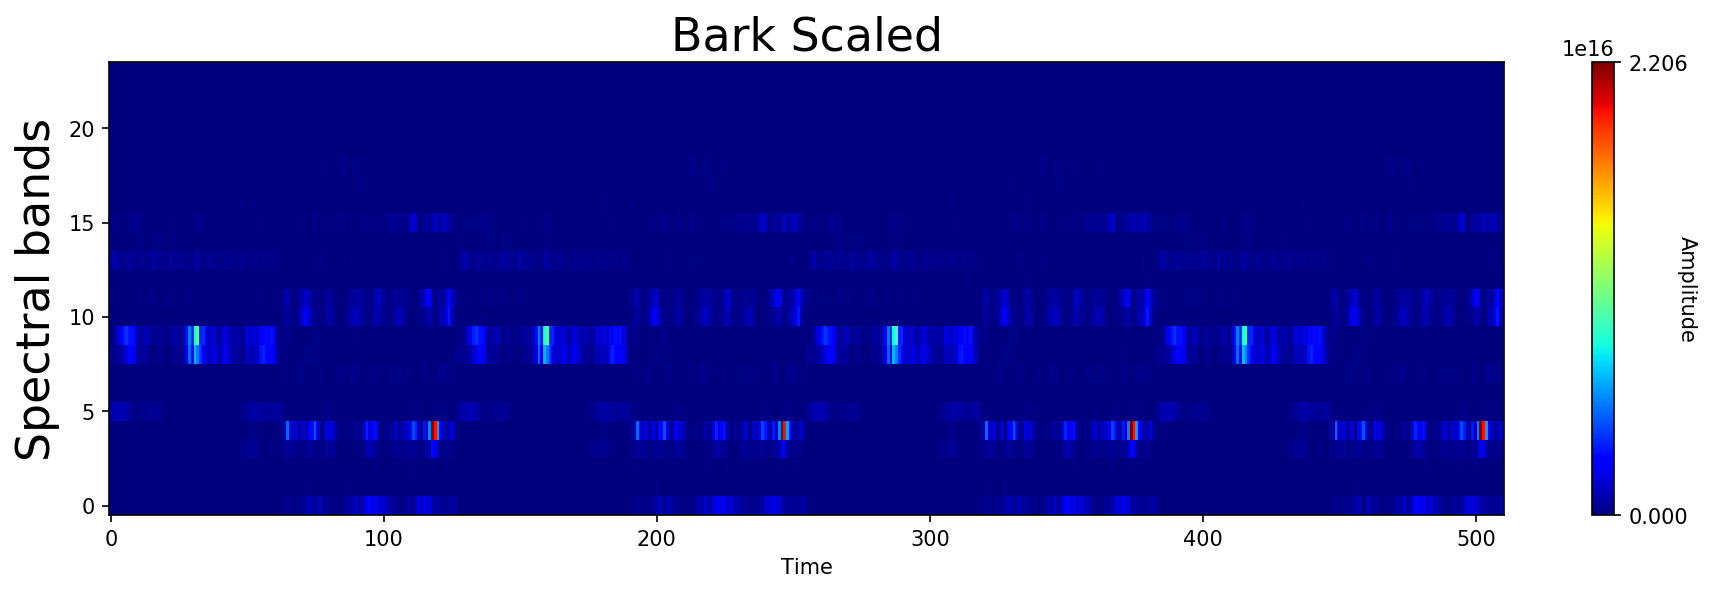

In [27]:
sndprcfunc.plot_spectrogram(spec_bark, 'Bark Scaled')

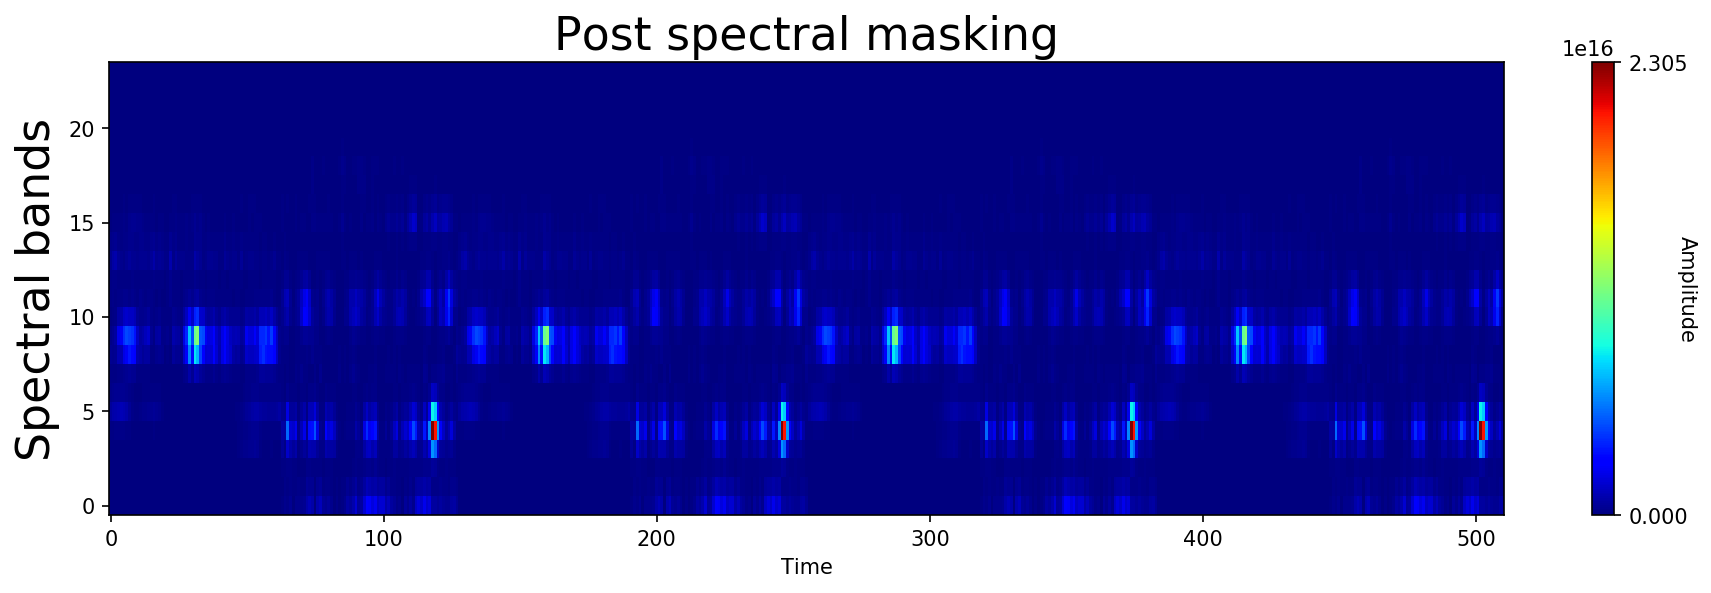

In [28]:
sndprcfunc.plot_spectrogram(spec_masked, 'Post spectral masking')

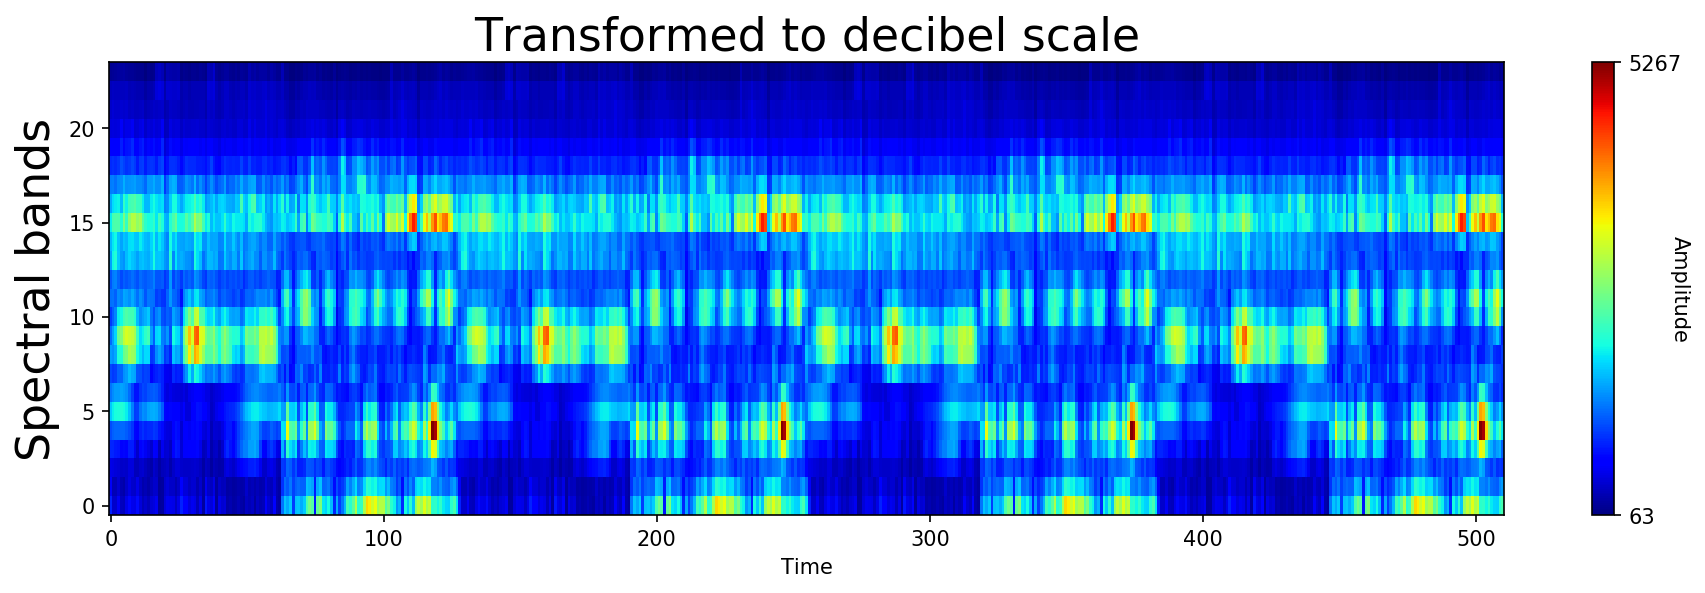

In [29]:
sndprcfunc.plot_spectrogram(spec_decible, 'Transformed to decibel scale')


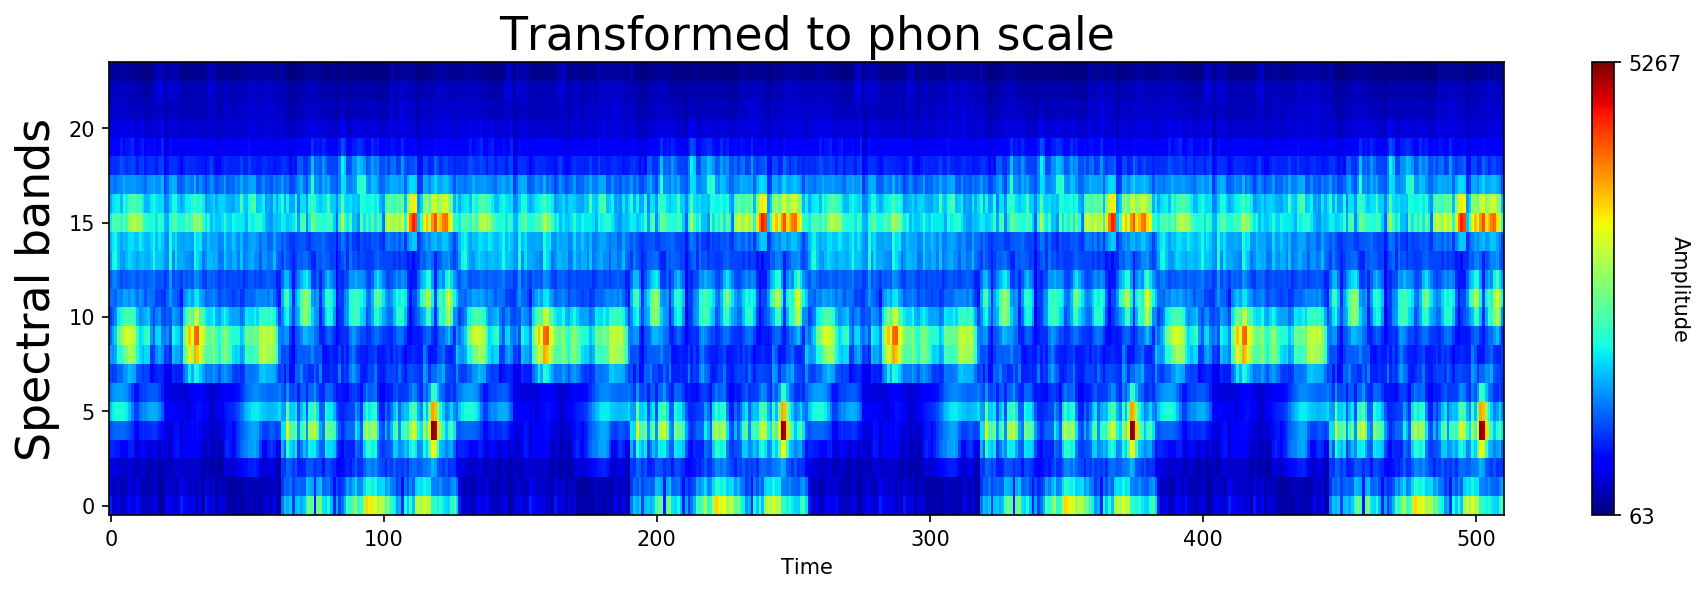

In [30]:
sndprcfunc.plot_spectrogram(spec_phon, 'Transformed to phon scale')

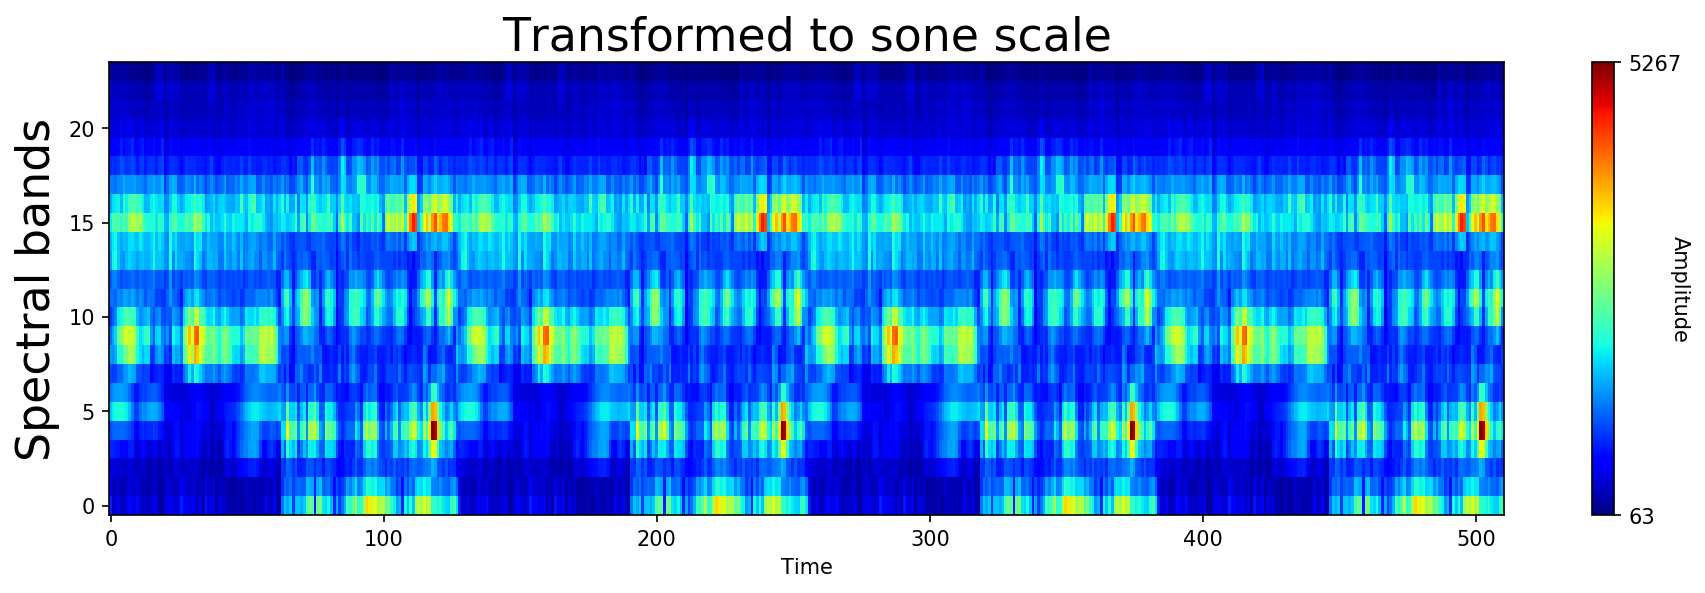

In [31]:
sndprcfunc.plot_spectrogram(spec_sone, 'Transformed to sone scale')

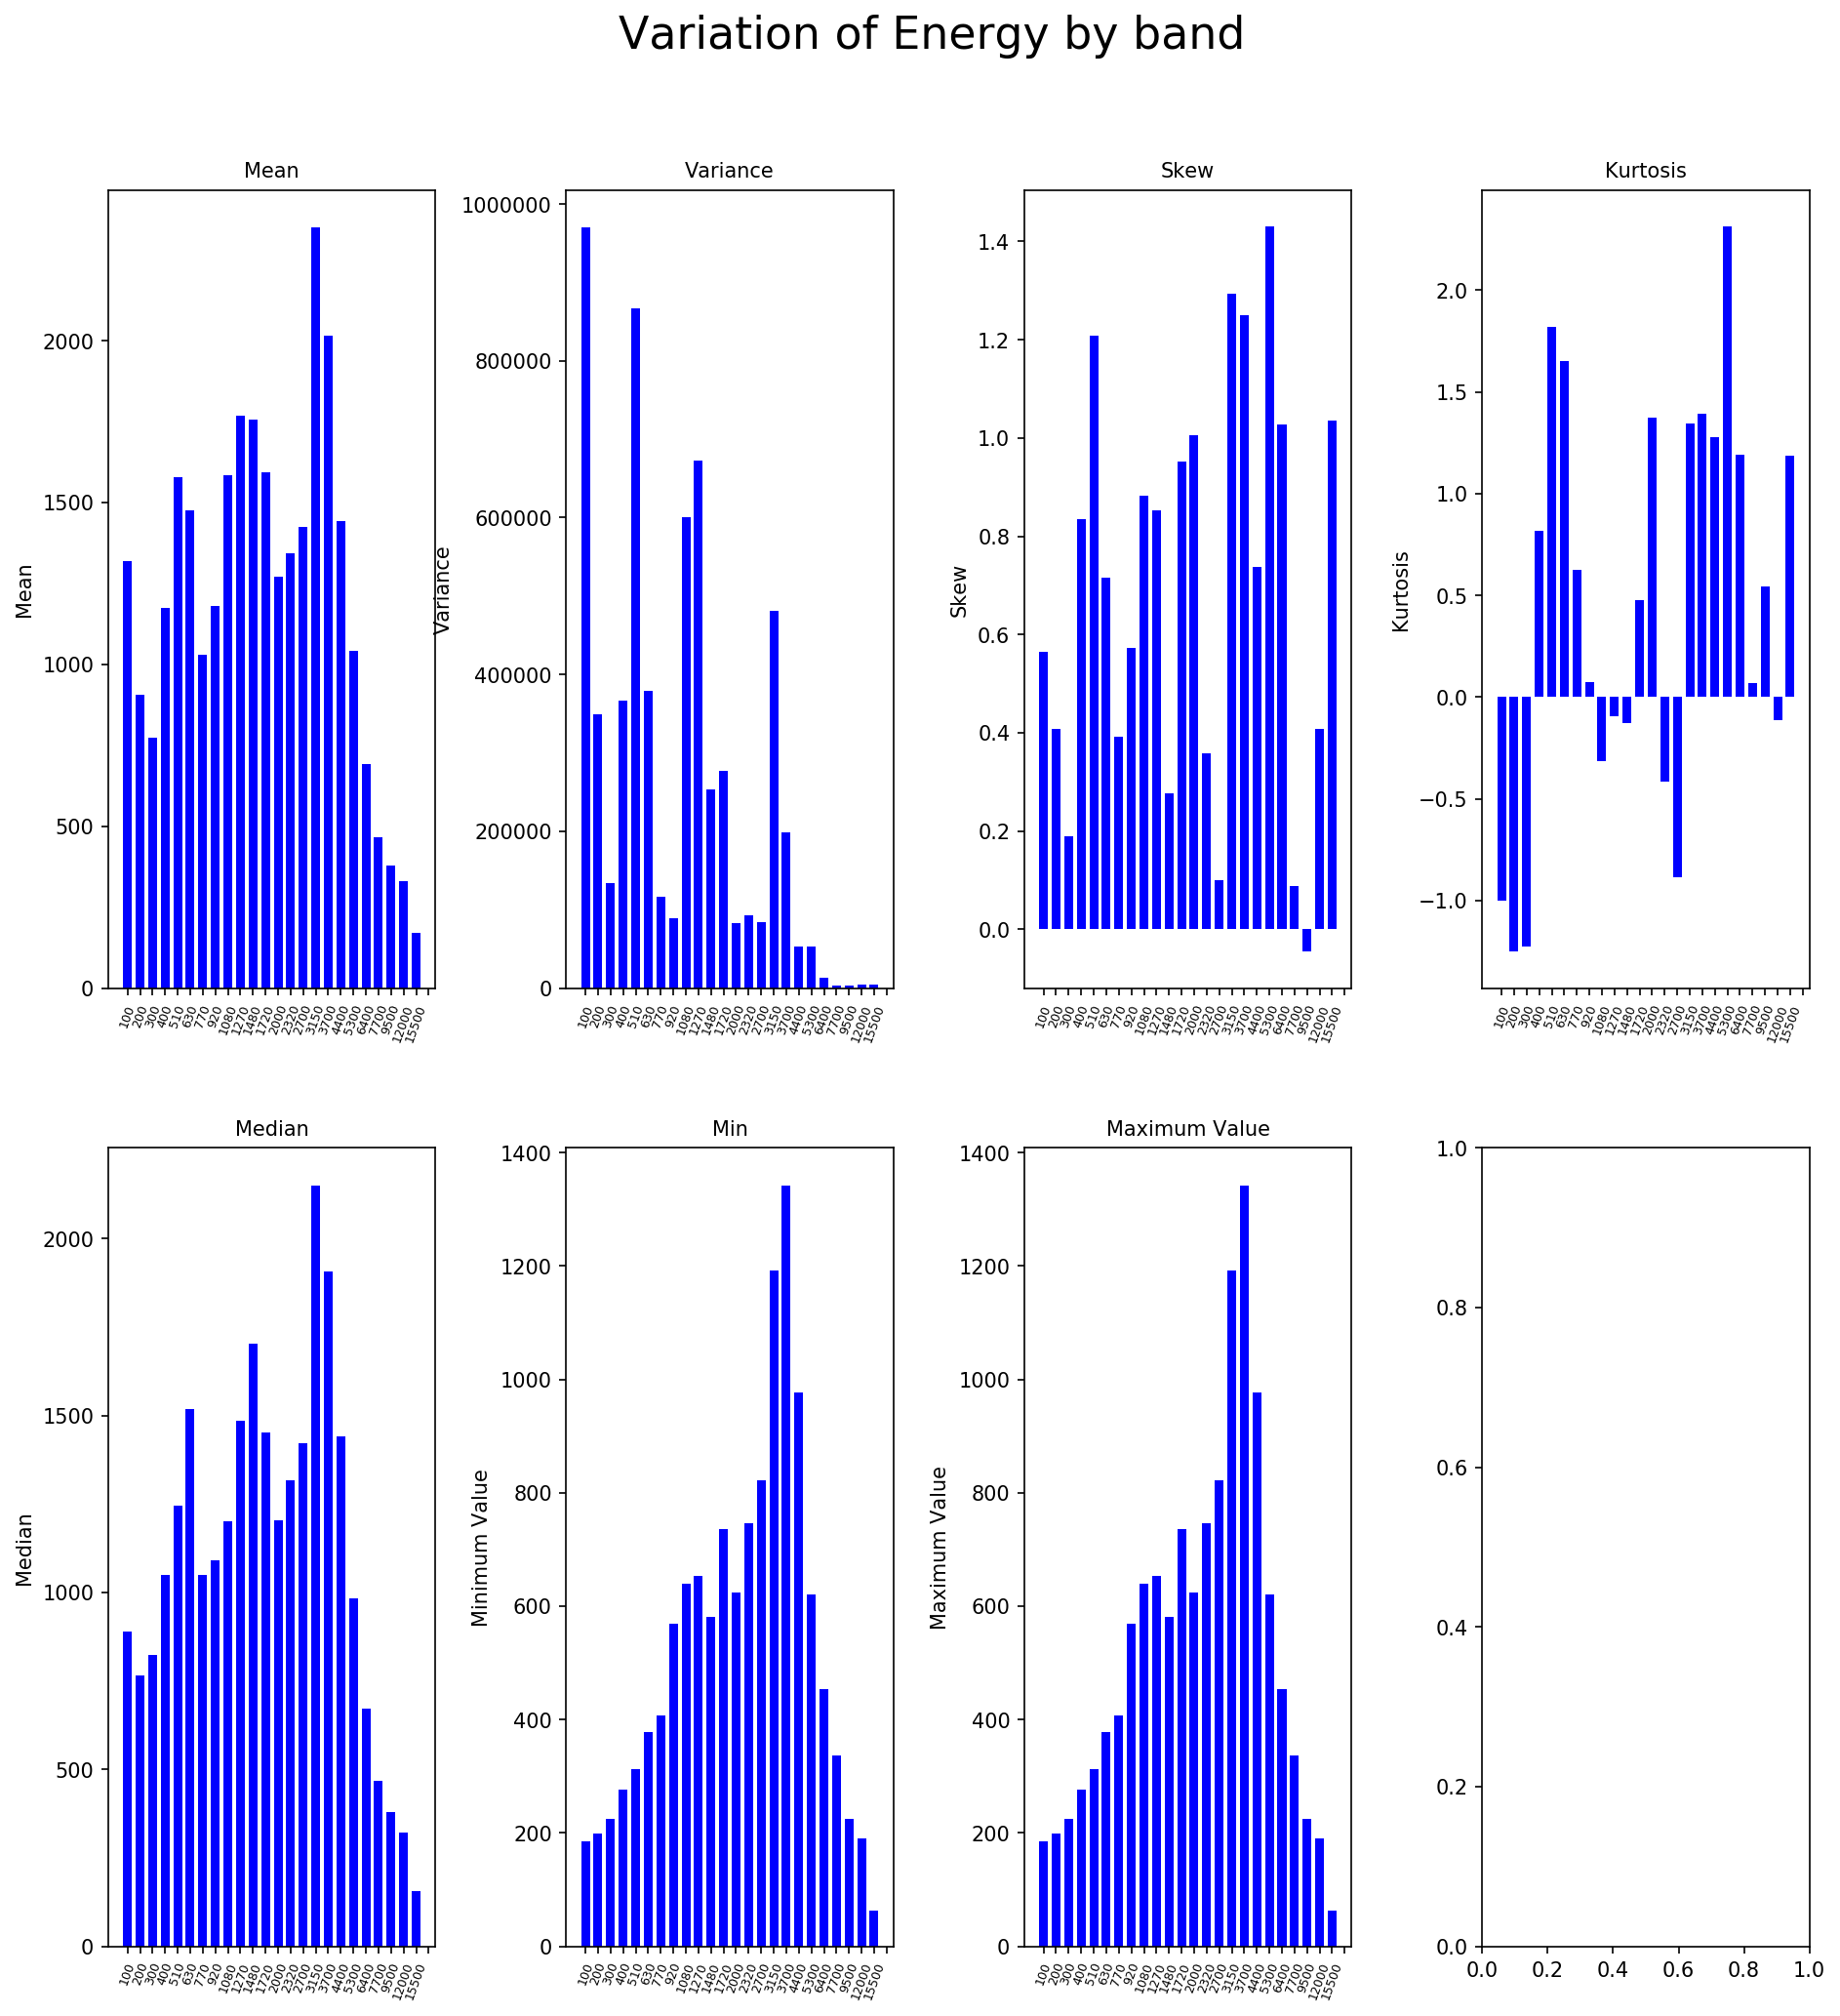

In [32]:
sndprcfunc.plot_SSD_components(ssd)

# Rhythm Patterns

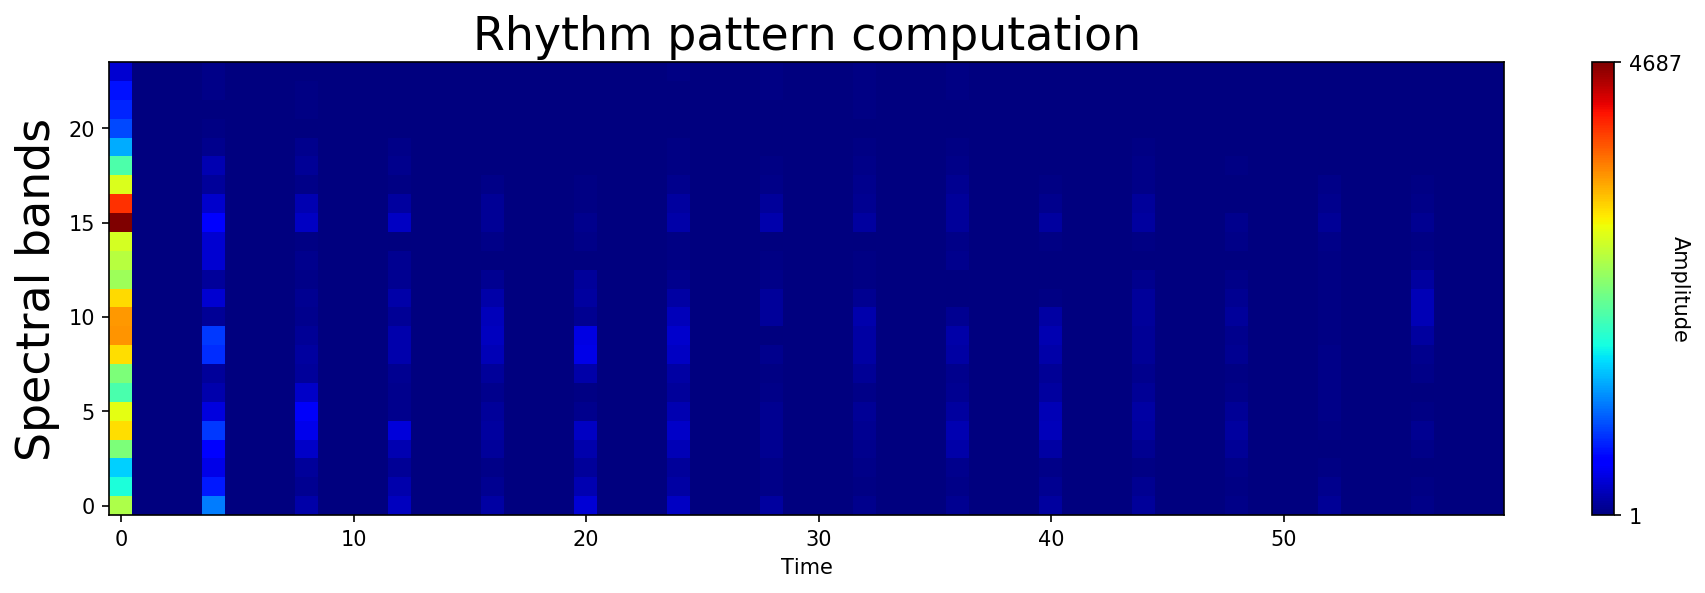

In [33]:
sndprcfunc.plot_spectrogram(rp, 'Rhythm pattern computation')

# Rhythm Pattern histogram

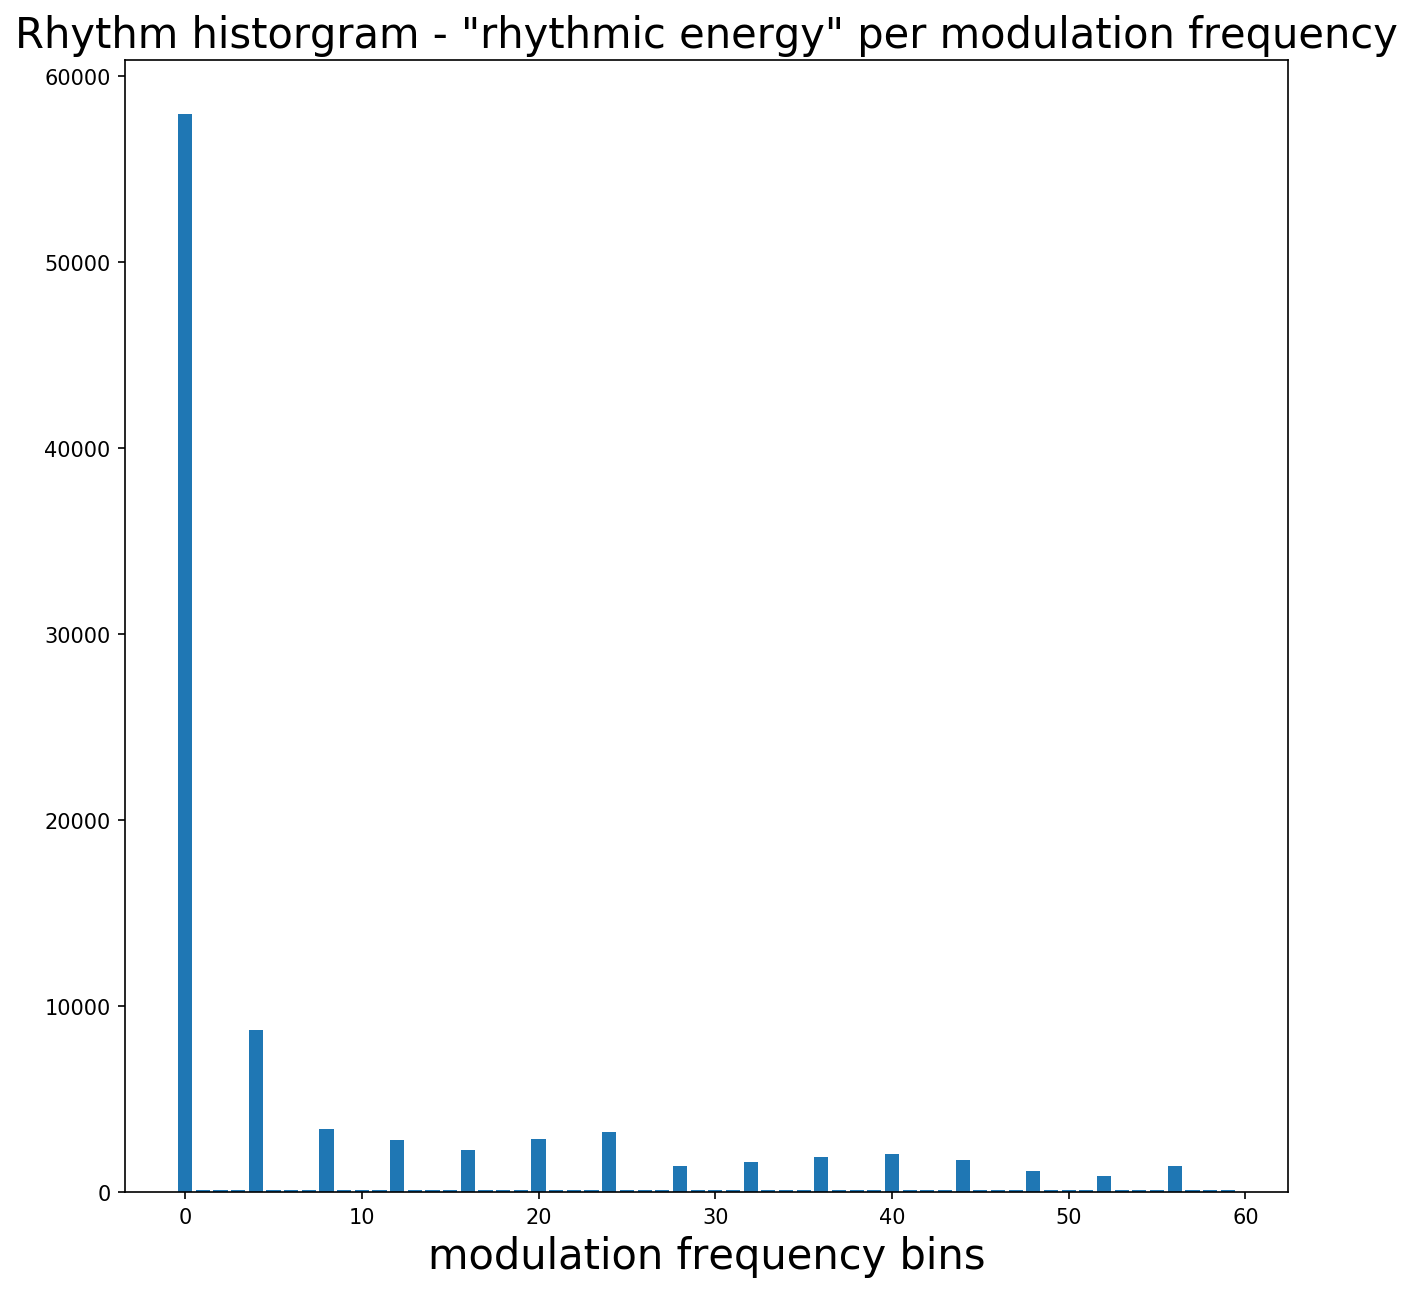

In [34]:
sndprcfunc.plot_rhythm_historgram(rh)

#Tracks to analyze - Within genre, between sub-genre comparison;  Focus is on Drum and bass using the sub-genres of jungle-style dnb, big energy/neurofunk dnb, and chill-out dnb.

In [35]:
savefile_master_tracklist = 'tracks_set_3.pickle'
savefile_master_ZCR_final = 'tracks_set_3_ZCR_final.pickle'
savefile_master_RMS_final = 'tracks_set_3_RMS_final.pickle'
savefile_master_SPEC_CENTR_final = 'tracks_set_3_SPEC_CENTR_final.pickle'
savefile_master_SPEC_ROLL_final = 'tracks_set_3_SPEC_ROLL_final.pickle'
savefile_master_SPEC_FLUX_final = 'tracks_set_3_SPEC_FLUX_final.pickle'
savefile_master_MFCC_final = 'tracks_set_3_MFCC_final.pickle'
savefile_master_RYTHM_final = 'tracks_set_3_RYTHM_final.pickle'

# initialize preprocessed (PP) music collection
sound_files_PP = collections.defaultdict(dict)
### change ###
sound_files_PP["Jungle"]["genre_name"] = "Jungle"
sound_files_PP["Neuro"]["genre_name"] = "Neuro"
sound_files_PP["Chillout"]["Chillout"] = "Chillout"

data_temp = open_dataframe_pickle(savefile_master_ZCR_final)
# load sound files

translate = {'dnb_jungle': 'Jungle', 'dnb_big': 'Neuro', 'dnb_chill': 'Chillout'}
for i in range(0, len(data_temp['label'])):
    data_temp['label'][i] = translate[data_temp['label'][i]]

for current in set(data_temp['label']):
    sound_files_PP[current]["samplerate"] = []
    sound_files_PP[current]["number_of_samples"] = []
    sound_files_PP[current]["track"] = []
    sound_files_PP[current]["song_length"] = []
    sound_files_PP[current]["zcr"] = []
    sound_files_PP[current]["rms"] = []
    sound_files_PP[current]["sc"] = []
    sound_files_PP[current]["sr"] = []
    sound_files_PP[current]["sf"] = []
    sound_files_PP[current]["MFCCs_1"] = []
    sound_files_PP[current]["MFCCs_2"] = []

for i, current in enumerate(data_temp['label']):
    sound_files_PP[current]["track"].append(basename(data_temp['path'][i]))
    sound_files_PP[current]["samplerate"].append(data_temp['sample_rate'][i])
    sound_files_PP[current]["number_of_samples"].append(data_temp['num_of_samples'][i])
    sound_files_PP[current]["song_length"].append(data_temp['num_of_samples'][i]*data_temp['sample_rate'][i])
    sound_files_PP[current]["zcr"] = data_temp['data'][i]

data_temp = open_dataframe_pickle(savefile_master_RMS_final)
for i in range(0, len(data_temp['label'])):
    data_temp['label'][i] = translate[data_temp['label'][i]]
for i, current in enumerate(data_temp['label']):
    sound_files_PP[current]["rms"].append(data_temp['data'][i])
    # sound_files_PP[current]["rms"] = data_temp['data'][i]

data_temp = open_dataframe_pickle(savefile_master_SPEC_CENTR_final)
for i in range(0, len(data_temp['label'])):
    data_temp['label'][i] = translate[data_temp['label'][i]]
for i, current in enumerate(data_temp['label']):
    sound_files_PP[current]["sc"].append(data_temp['data'][i])

data_temp = open_dataframe_pickle(savefile_master_SPEC_ROLL_final)
for i in range(0, len(data_temp['label'])):
    data_temp['label'][i] = translate[data_temp['label'][i]]
for i, current in enumerate(data_temp['label']):
    sound_files_PP[current]["sr"].append(data_temp['data'][i])

data_temp = open_dataframe_pickle(savefile_master_SPEC_FLUX_final)
for i in range(0, len(data_temp['label'])):
    data_temp['label'][i] = translate[data_temp['label'][i]]
for i, current in enumerate(data_temp['label']):
    sound_files_PP[current]["sf"].append(data_temp['data'][i])

data_temp = open_dataframe_pickle(savefile_master_MFCC_final)
for i in range(0, len(data_temp['label'])):
    data_temp['label'][i] = translate[data_temp['label'][i]]
for i, current in enumerate(data_temp['label']):
    sound_files_PP[current]["MFCCs_1"].append(data_temp['MFCCs_mean_1'][i])
    sound_files_PP[current]["MFCCs_2"].append(data_temp['MFCCs_mean_2'][i])

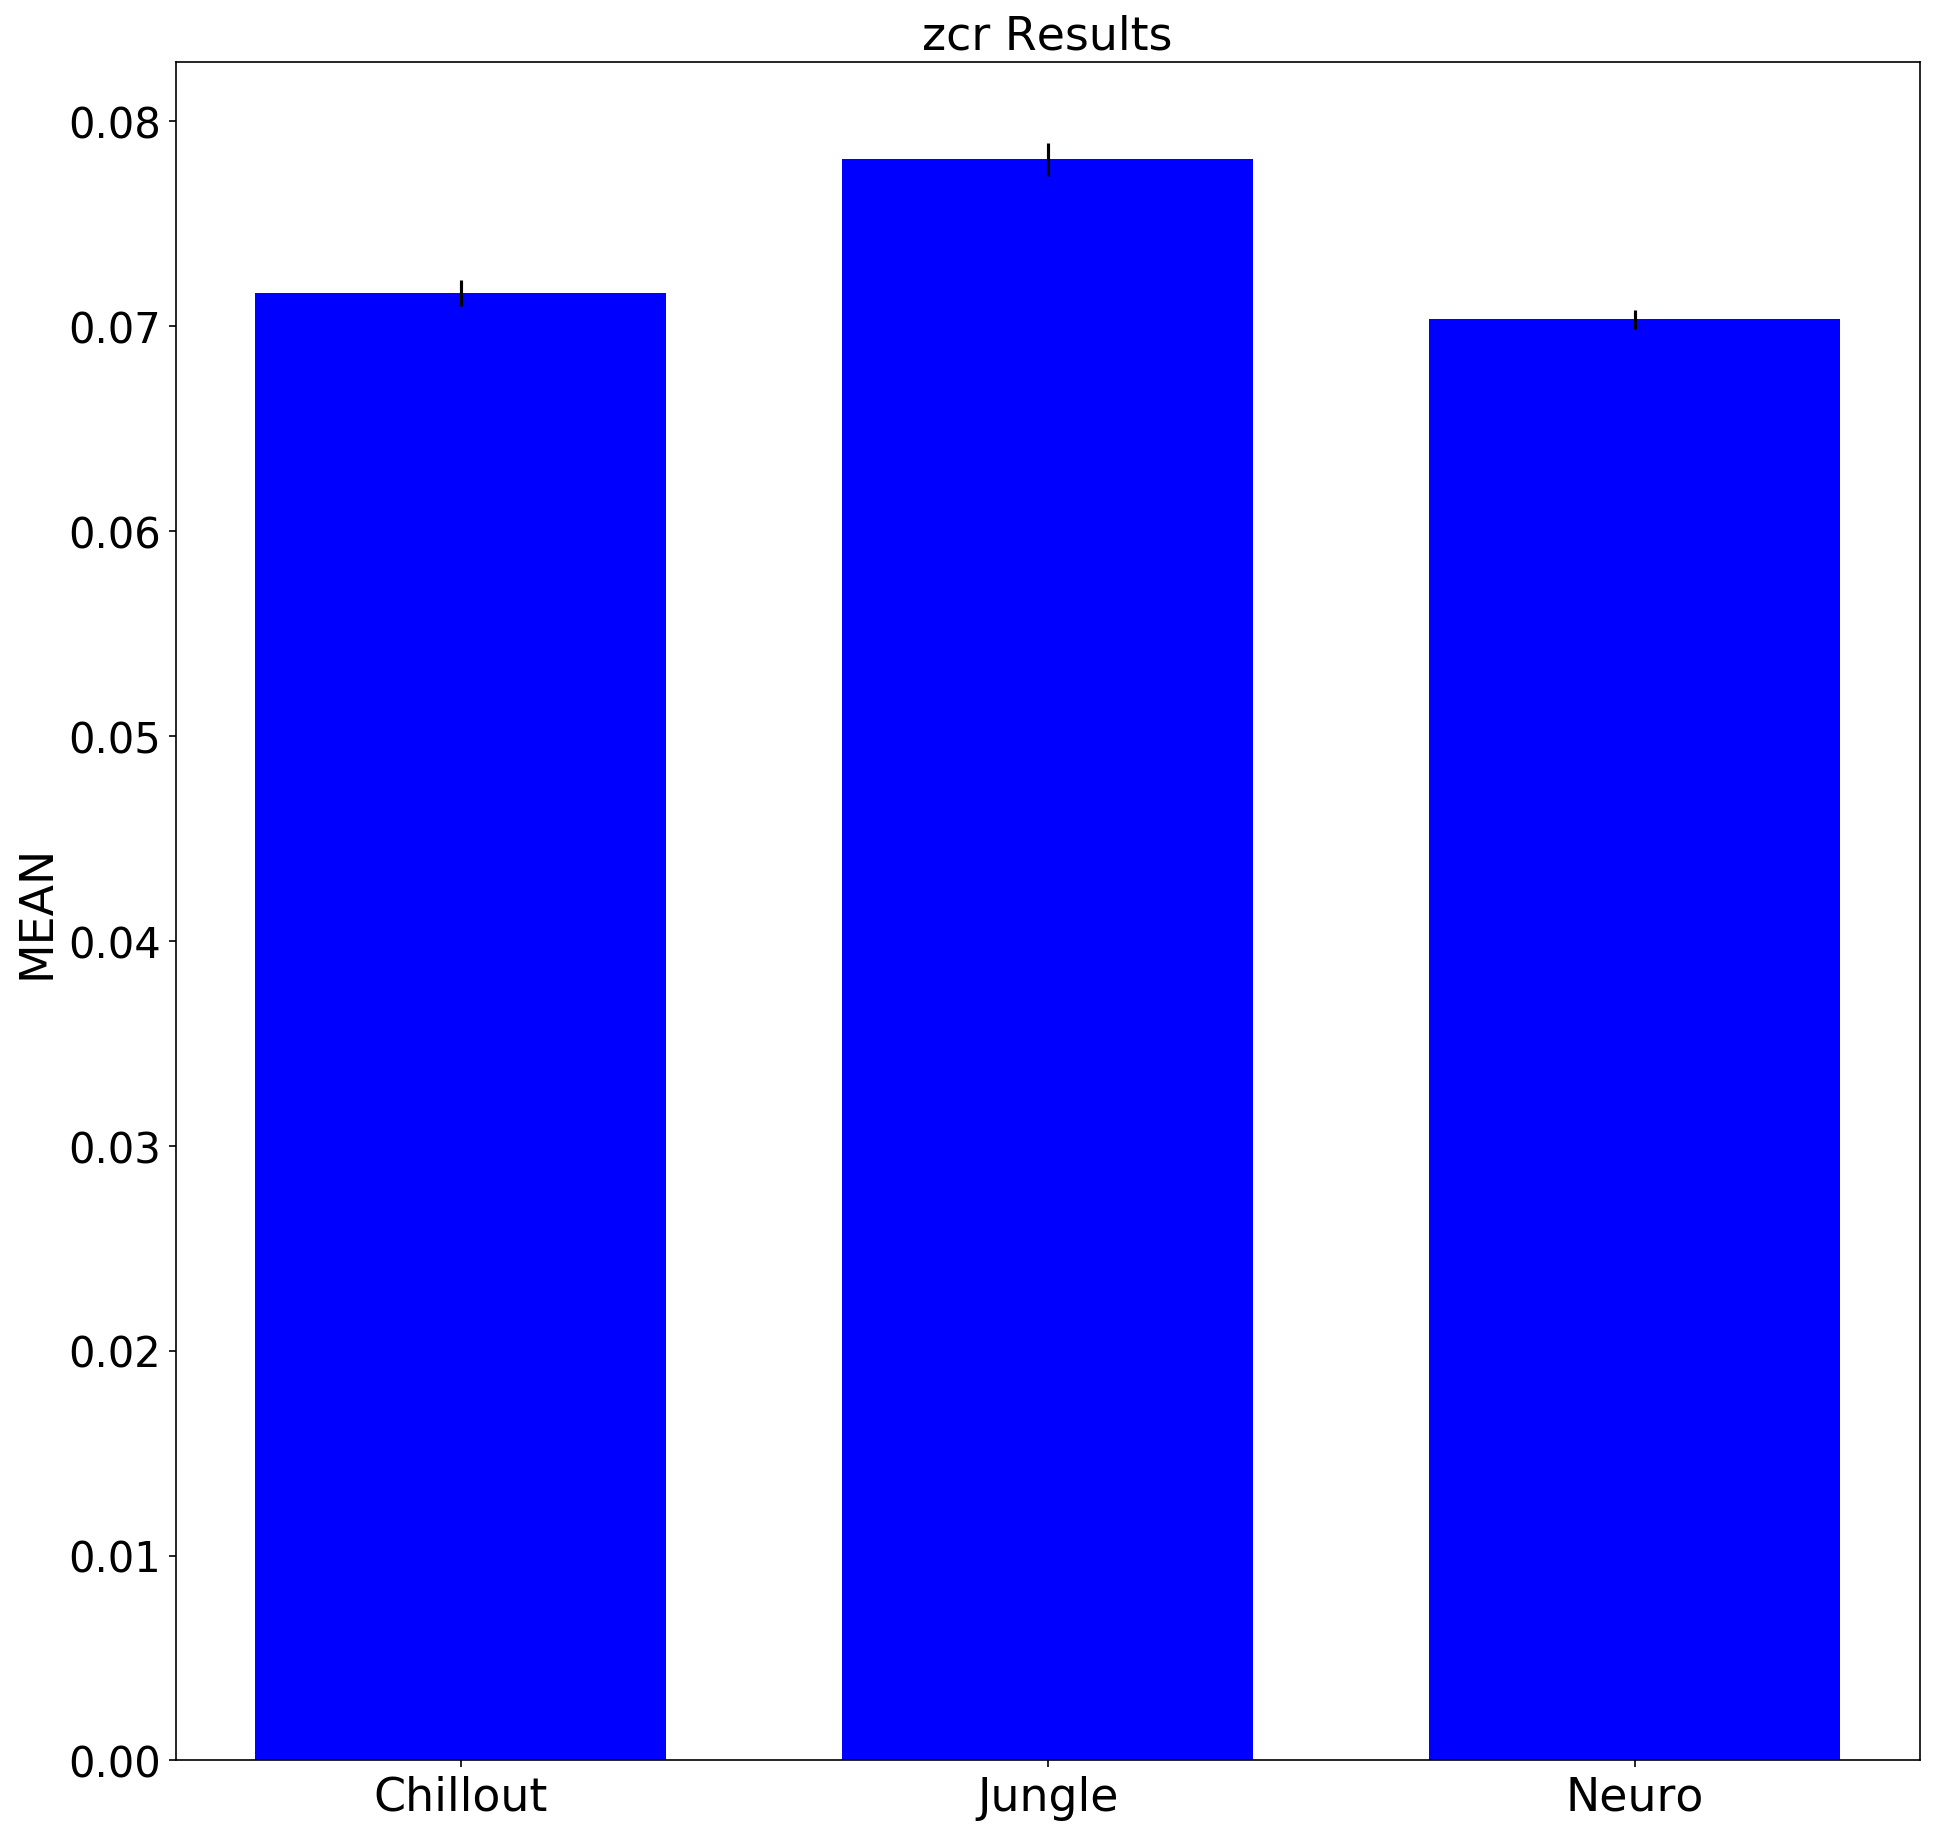

In [36]:
# plot ZCR across all sub-genres

sndprcfunc.plot_comparison(sound_files_PP, "zcr")

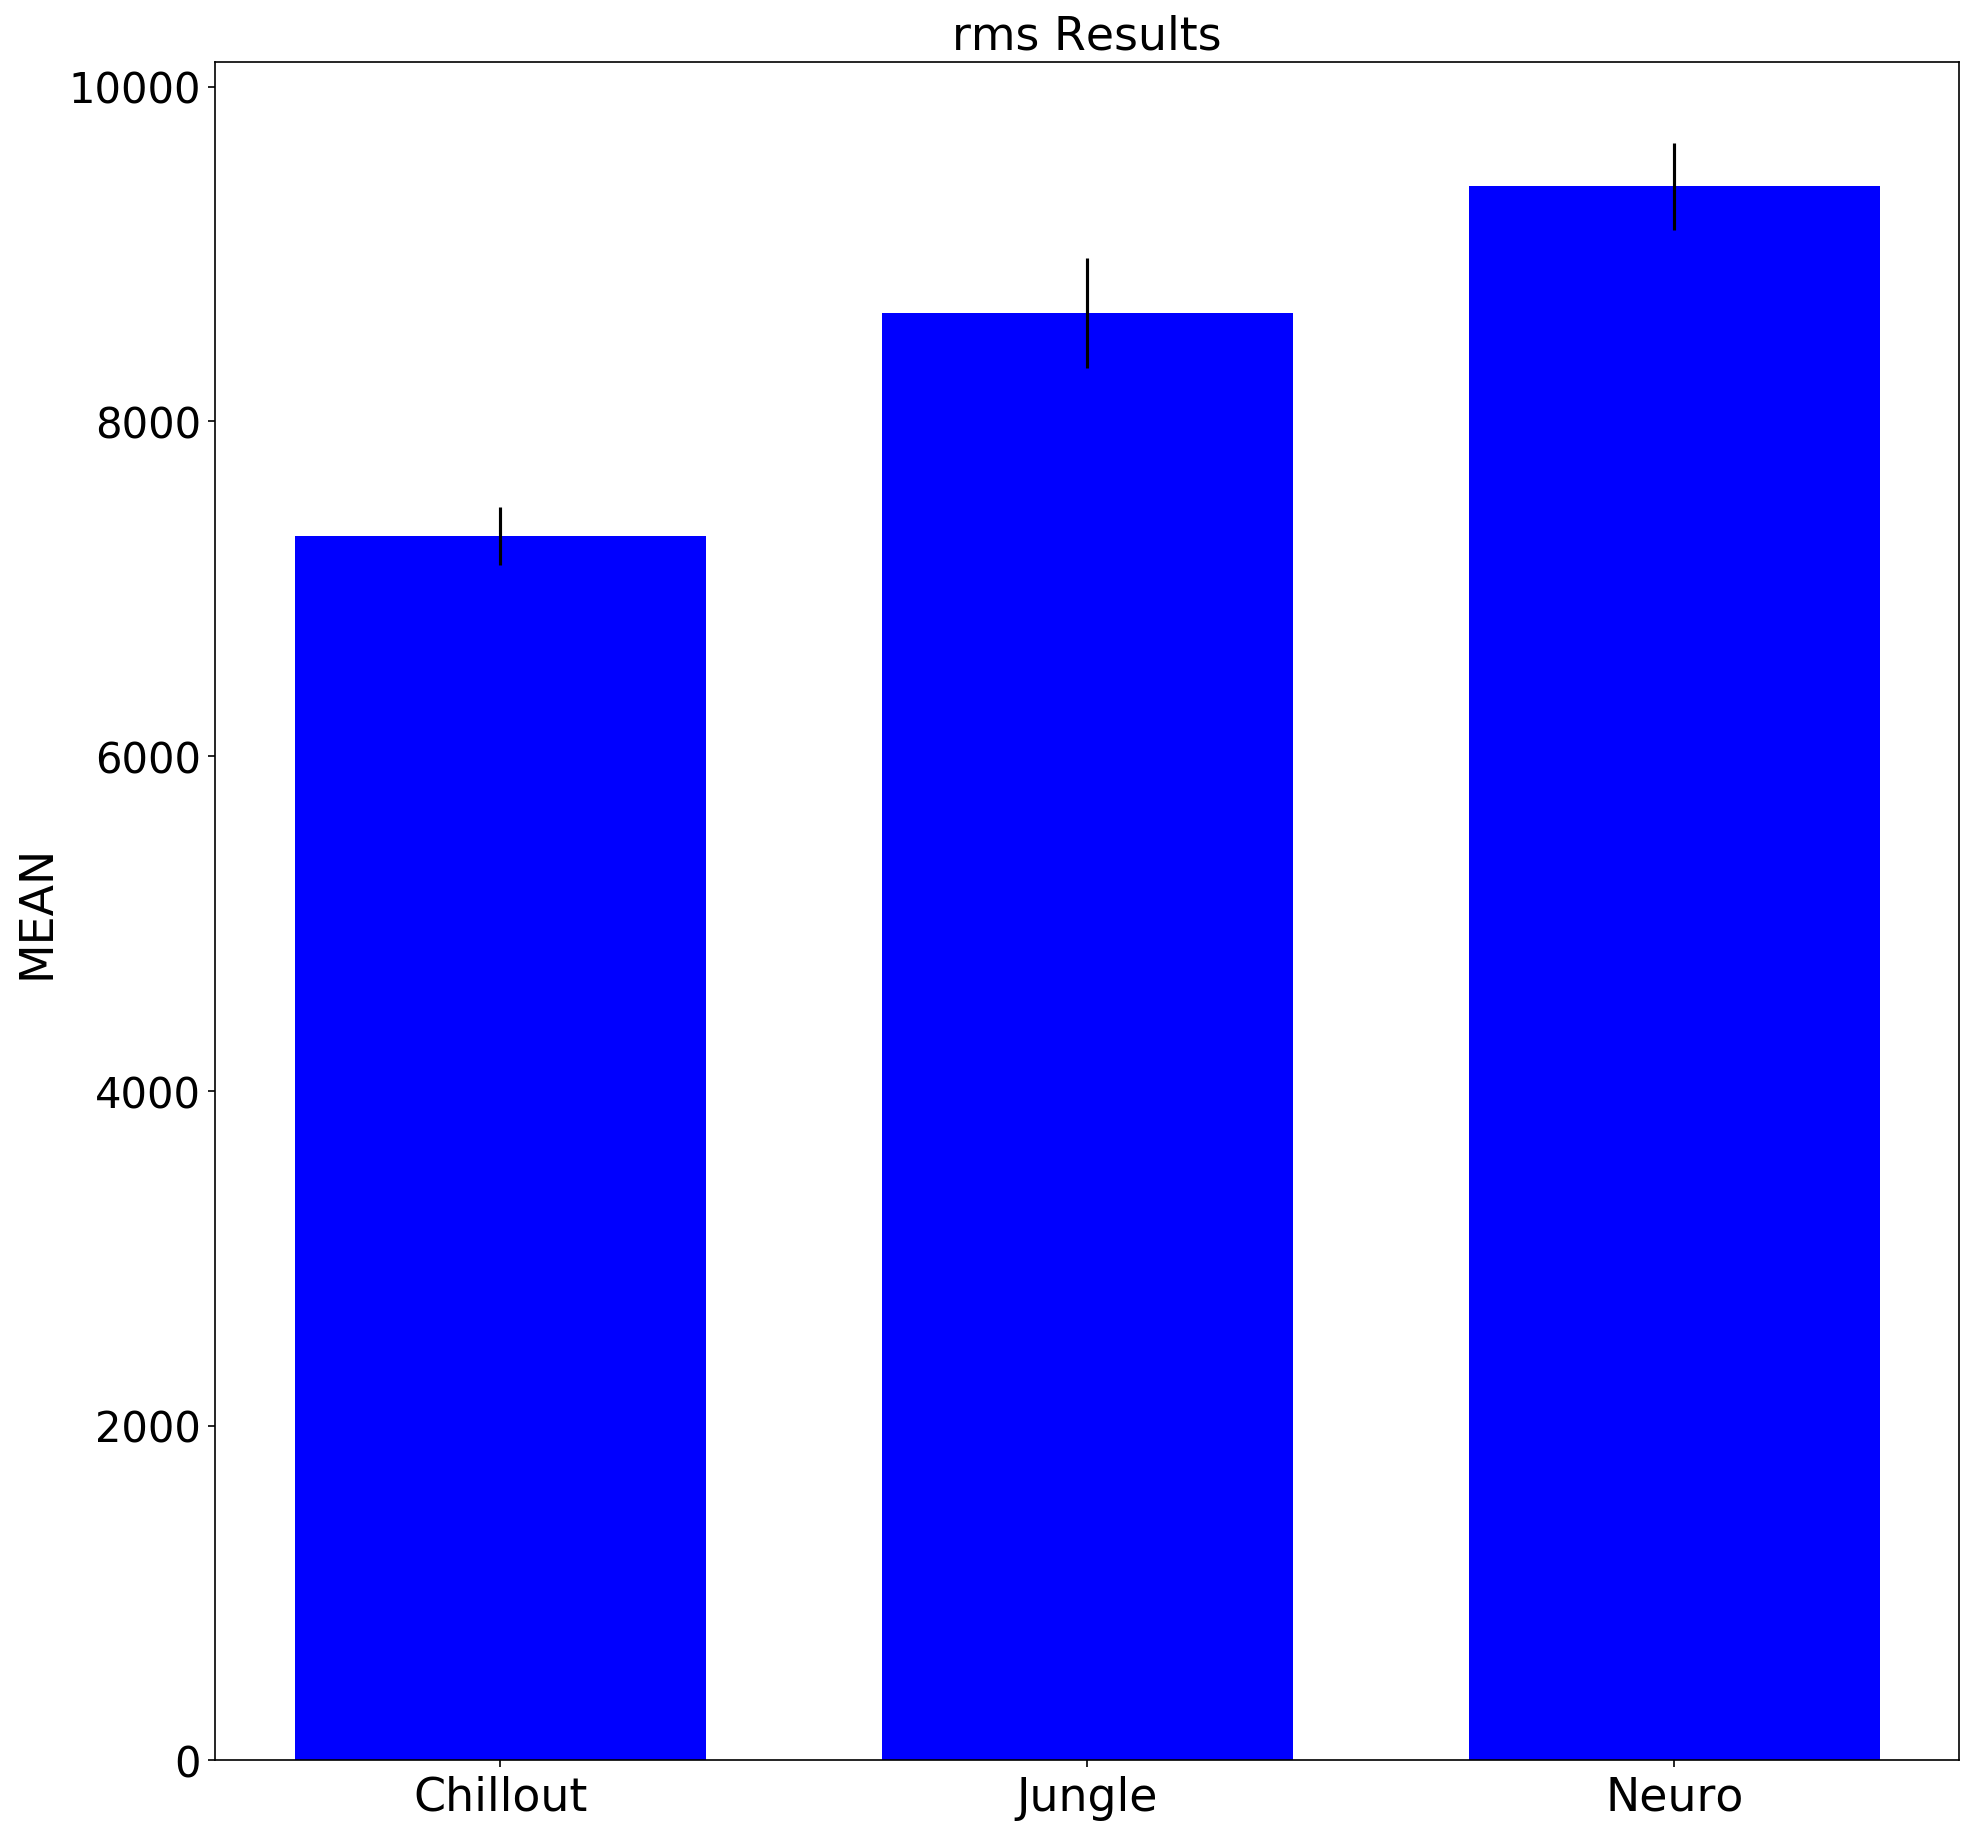

In [37]:
# plot root mean square across sub-genres
sndprcfunc.plot_comparison(sound_files_PP, "rms")

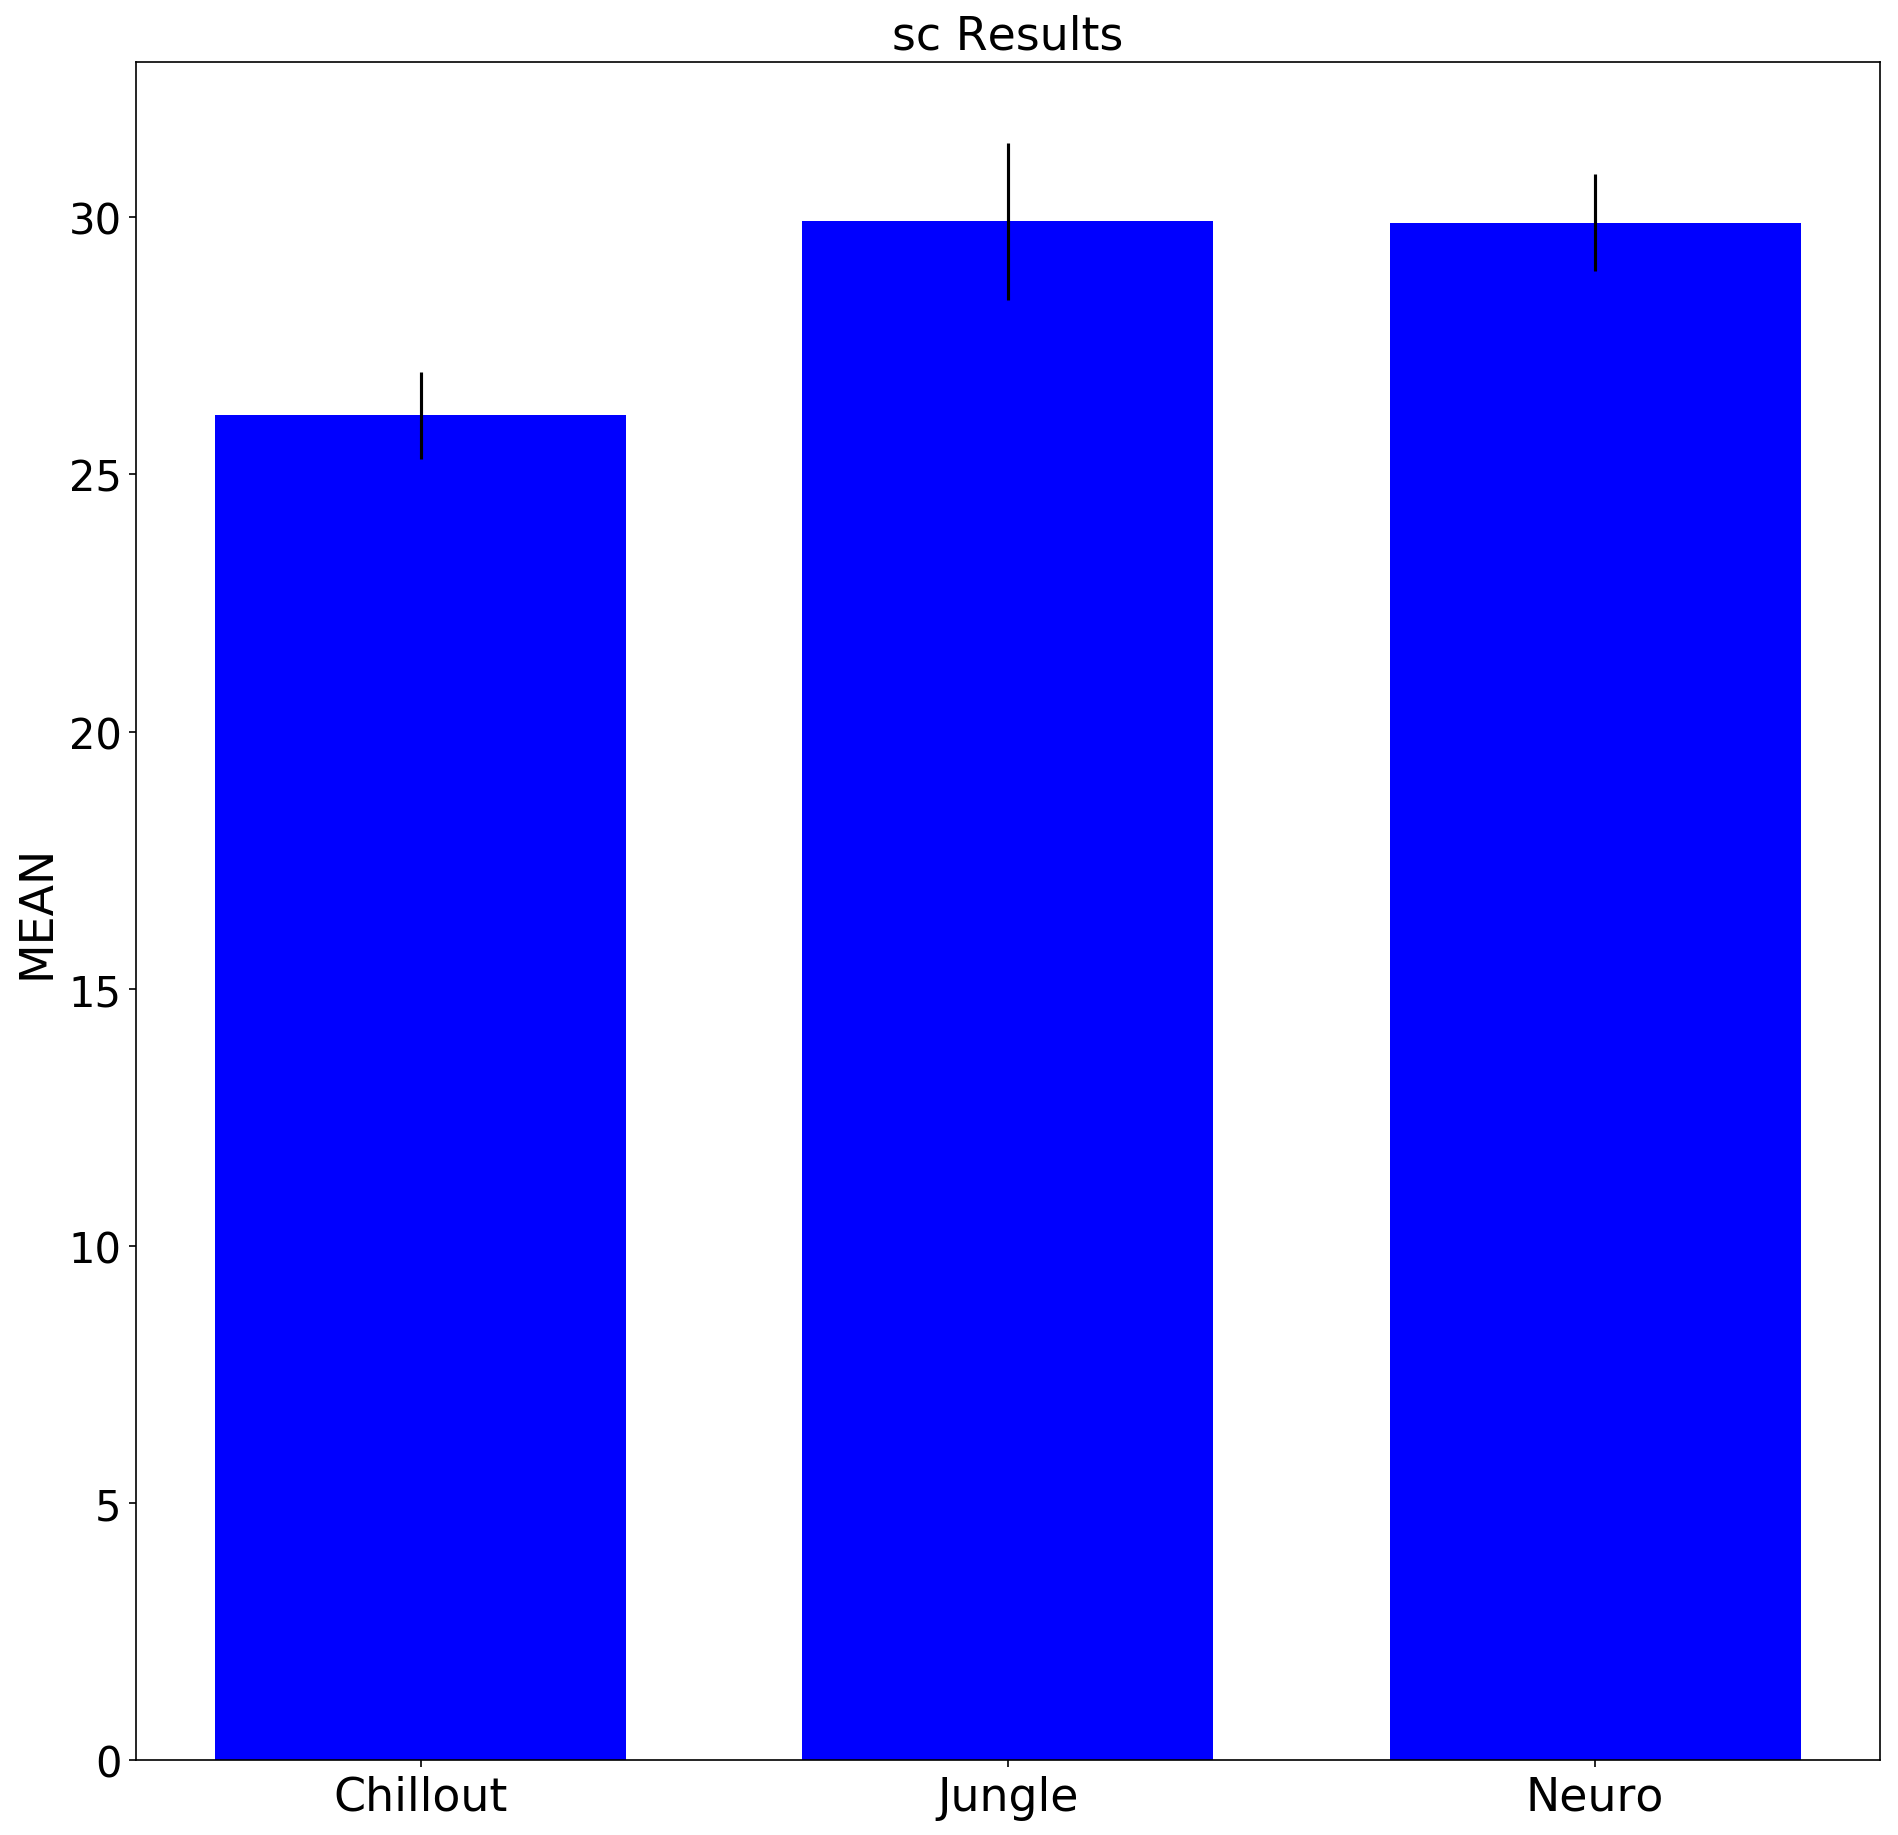

In [38]:
# plot Spectral Centroid across sub-genres
sndprcfunc.plot_comparison(sound_files_PP, "sc")

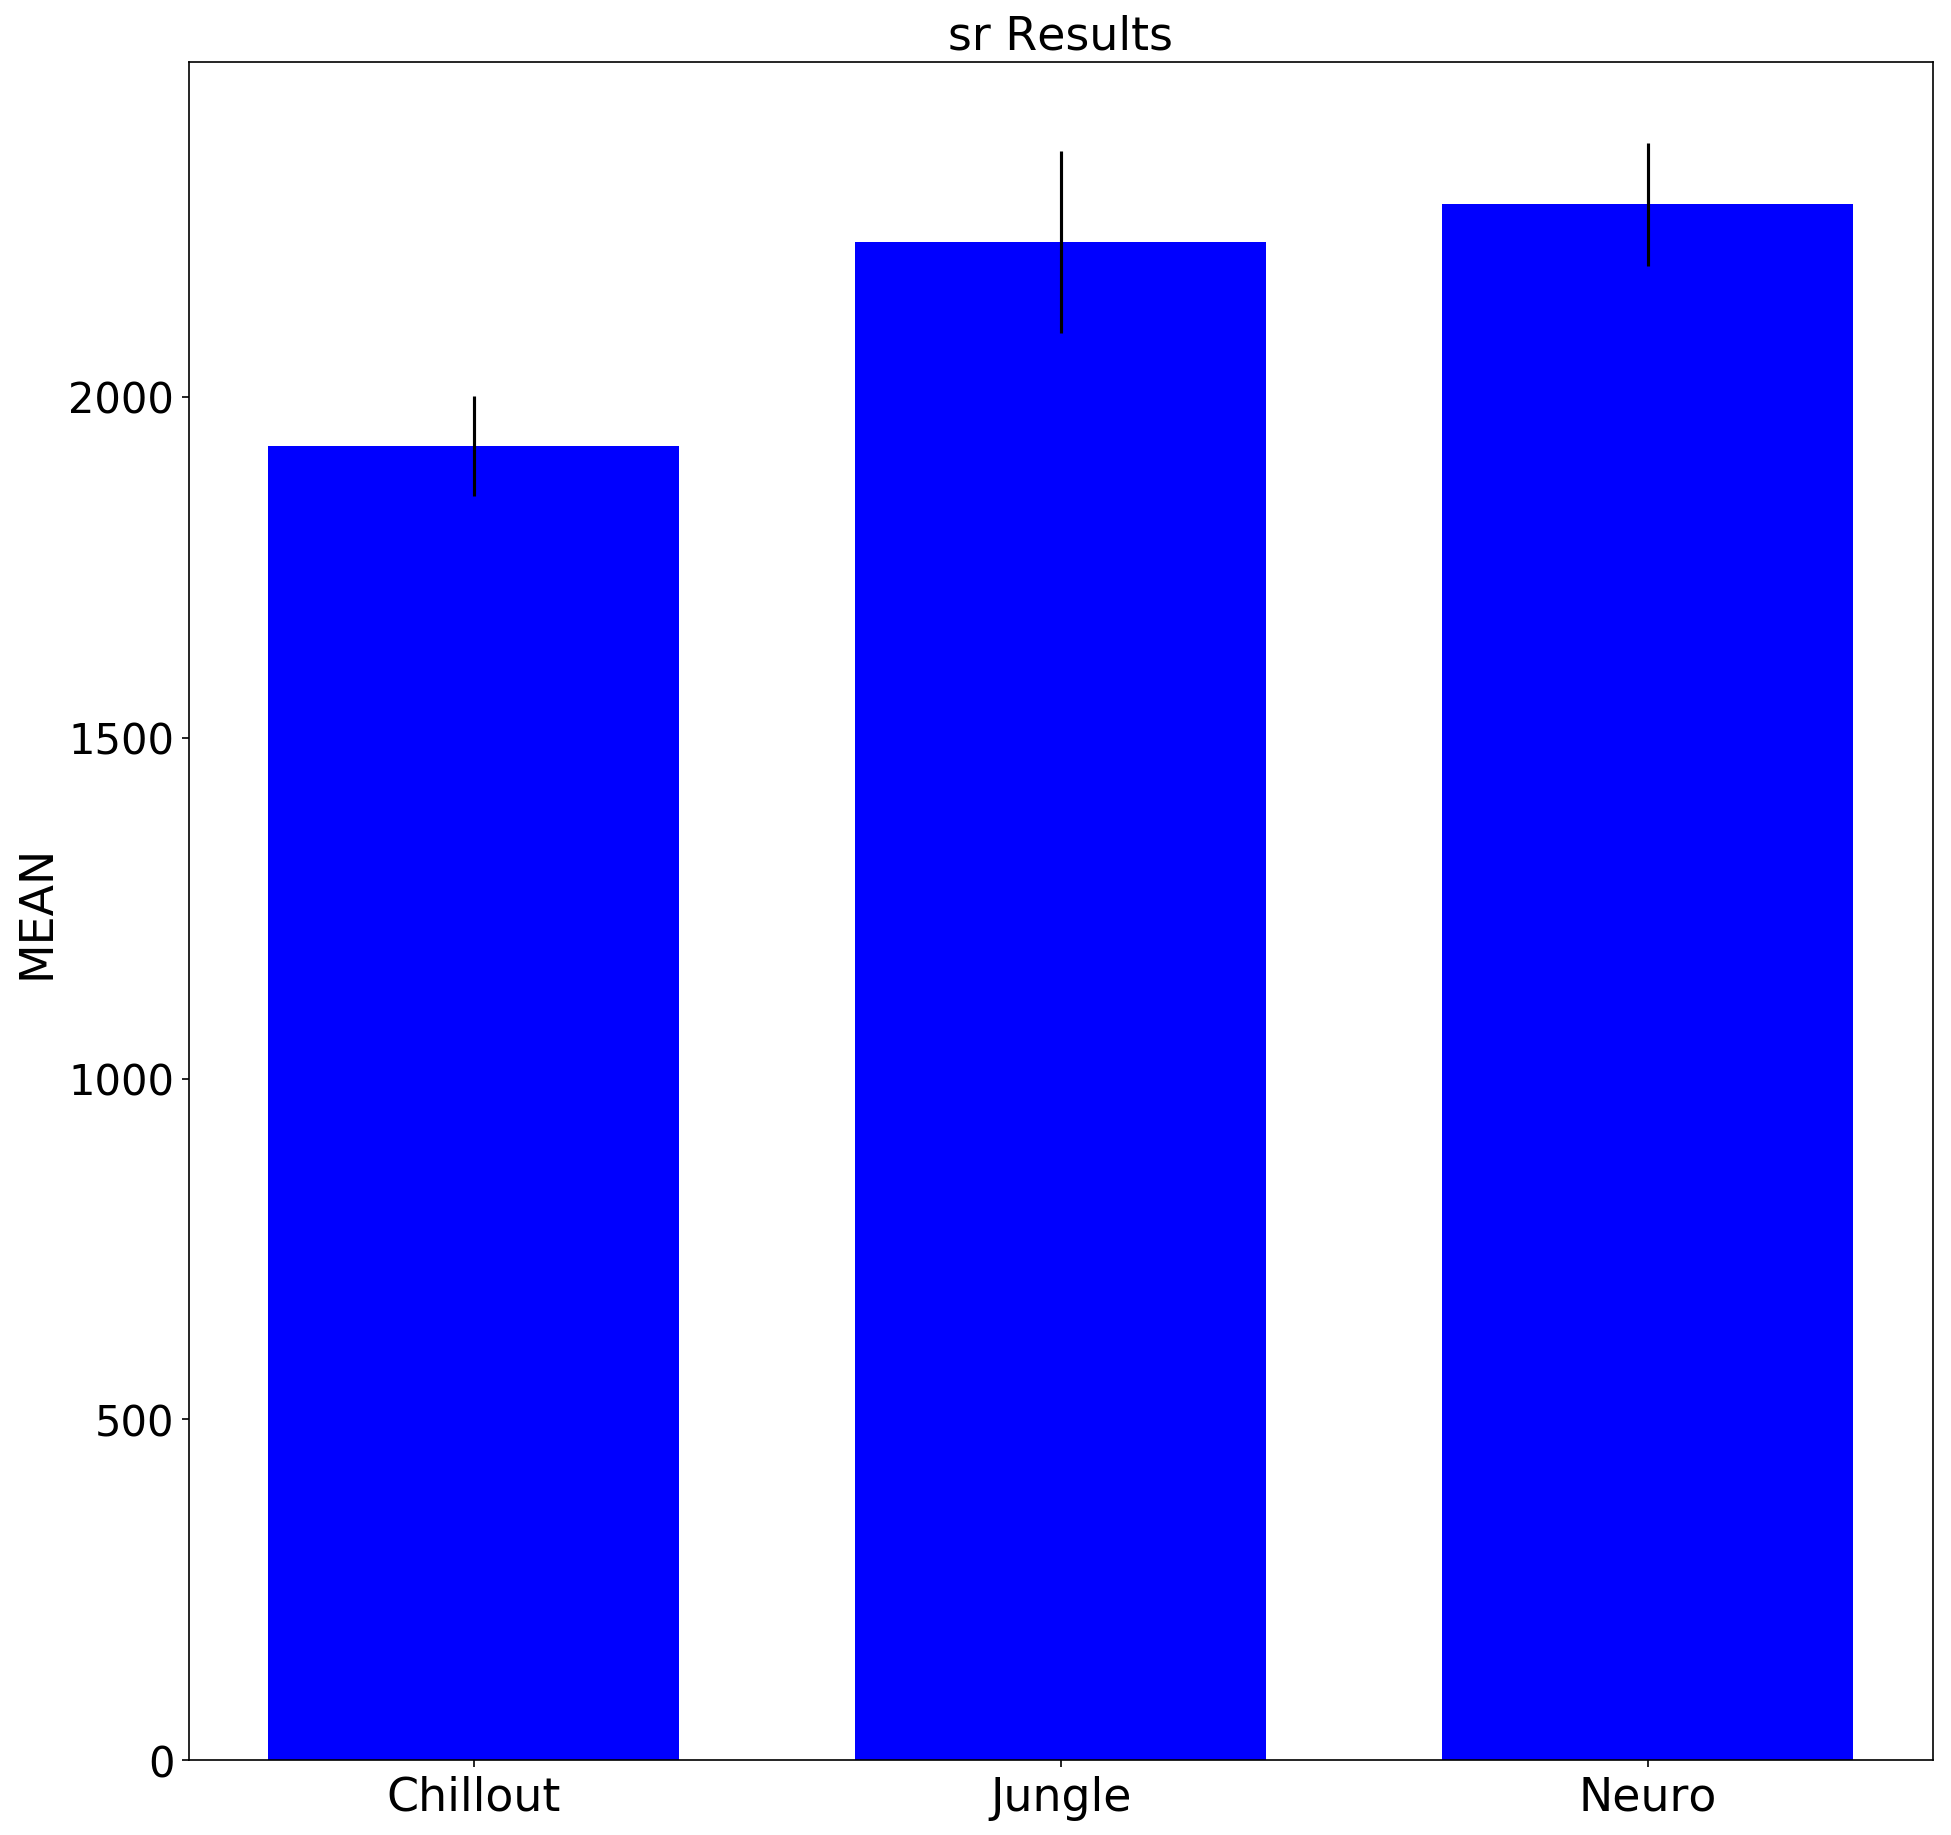

In [39]:
# plot Spectral Rolloff across sub-genres
sndprcfunc.plot_comparison(sound_files_PP, "sr")

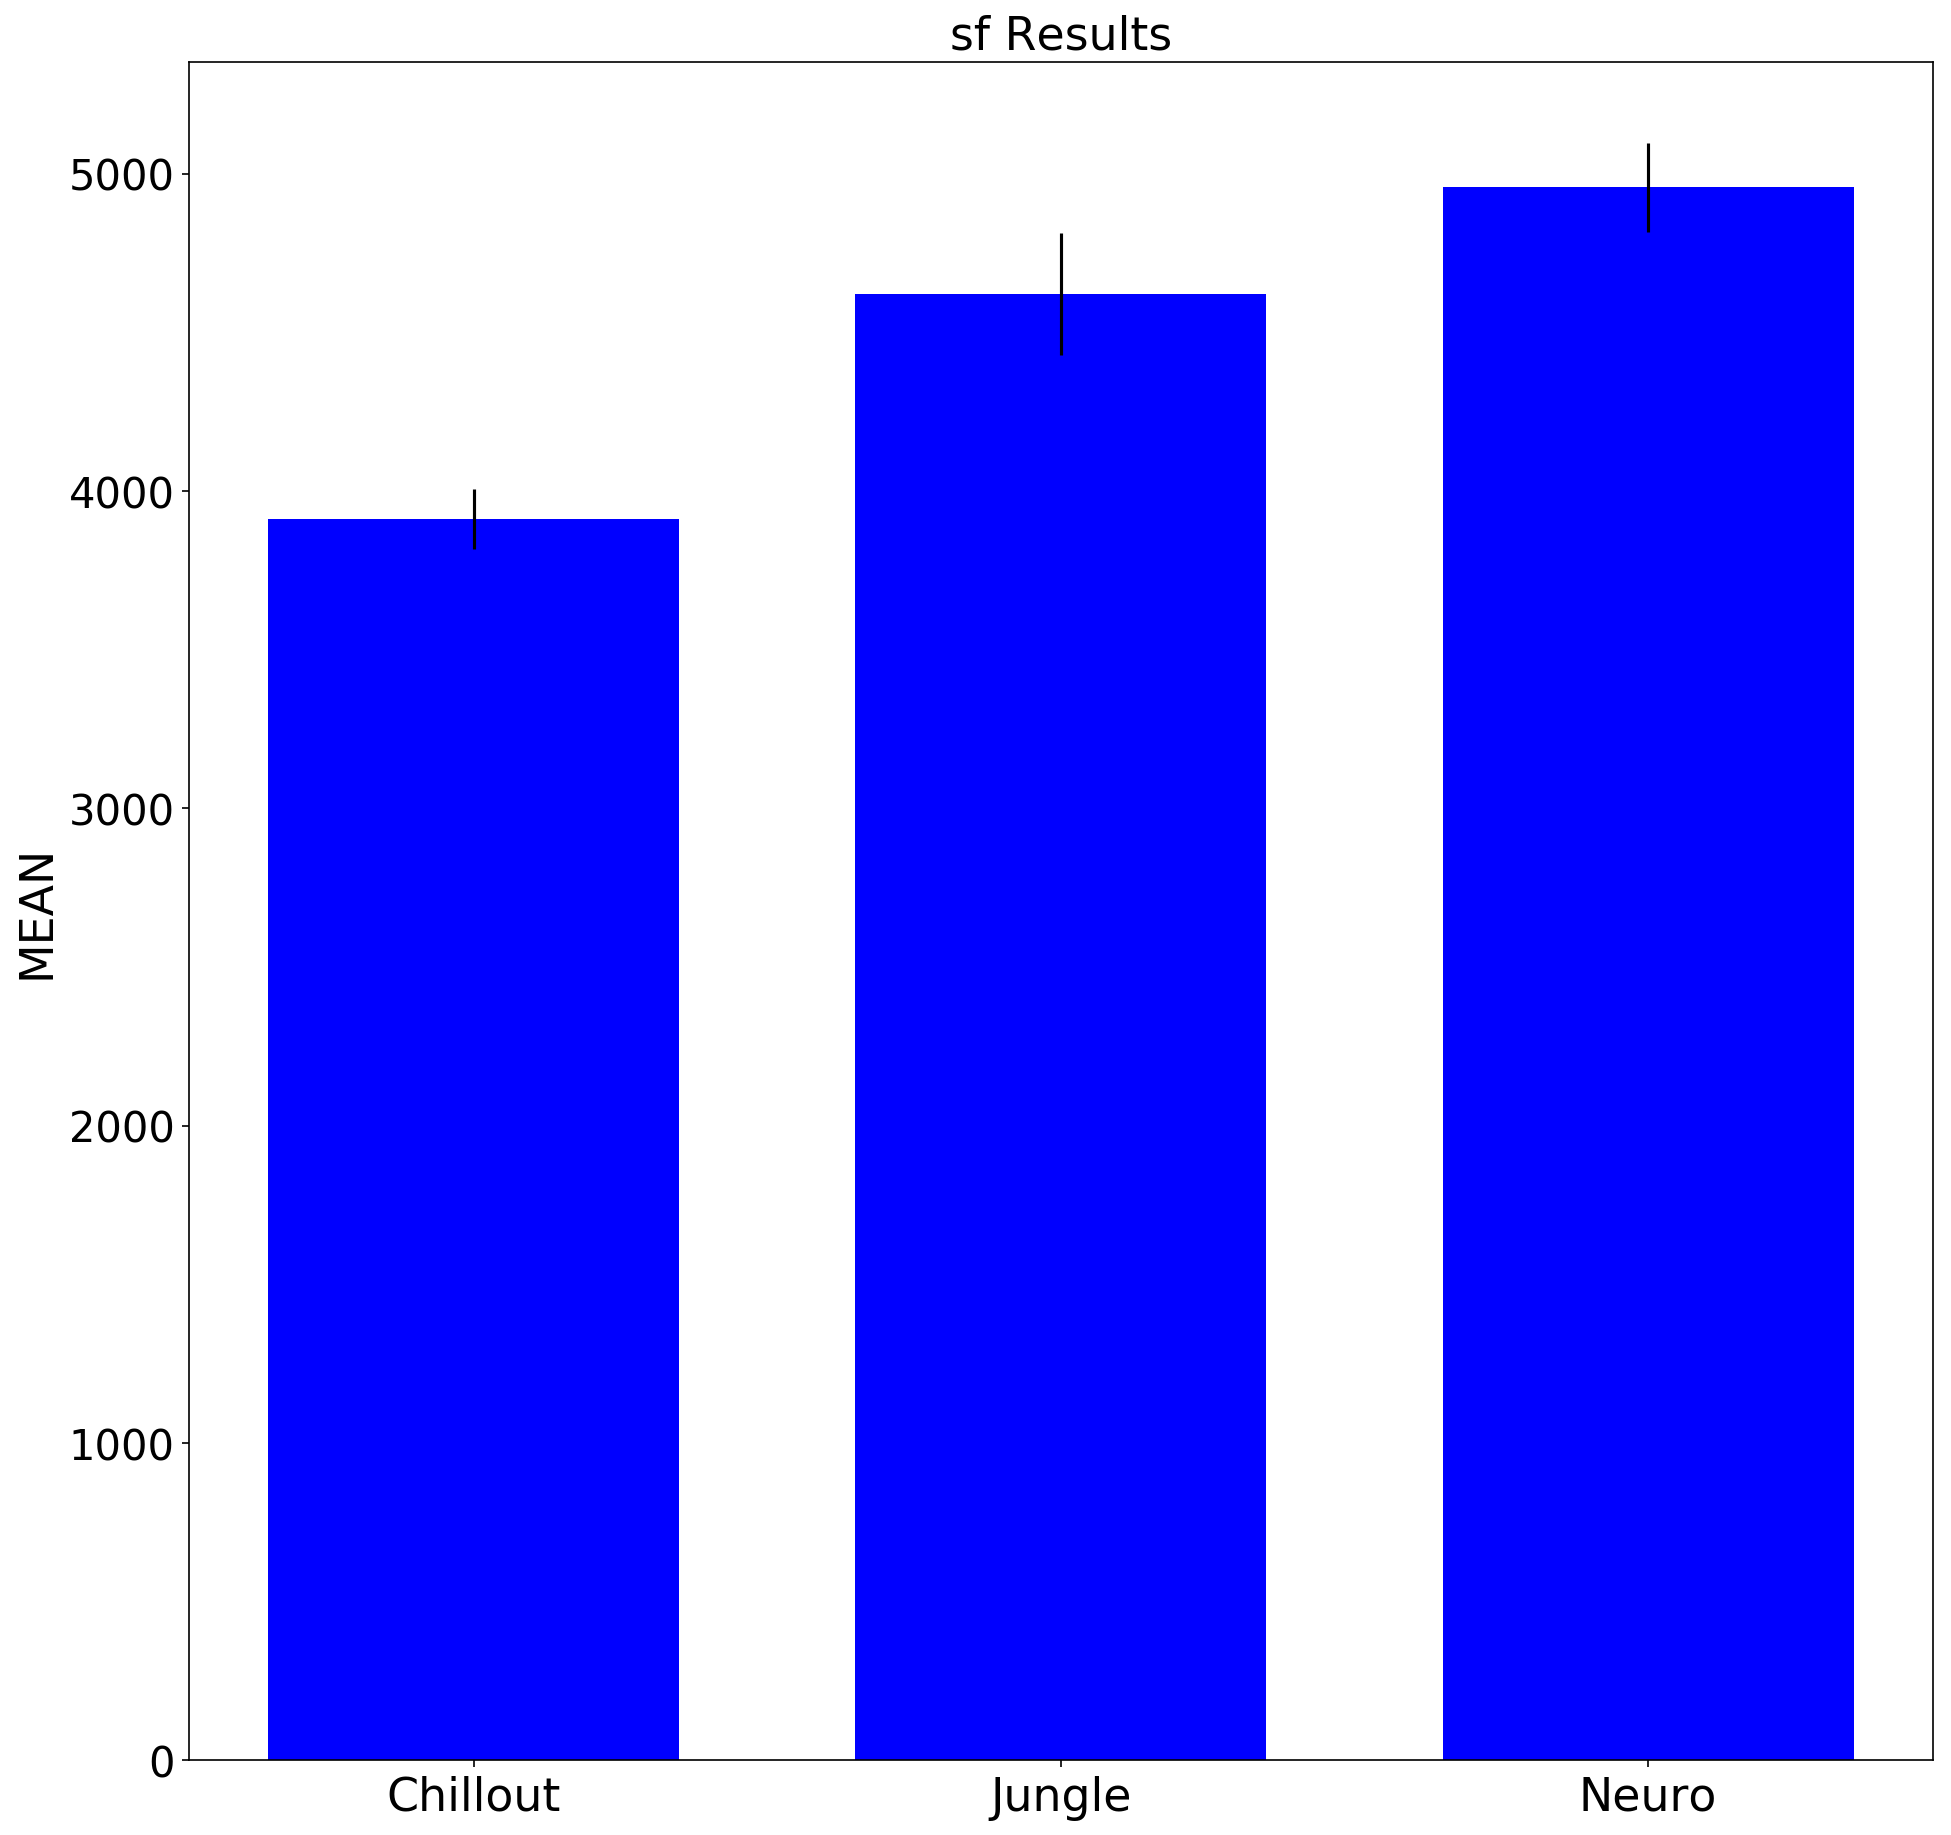

In [40]:
# plot spectral flux across sub-genres
sndprcfunc.plot_comparison(sound_files_PP, "sf")

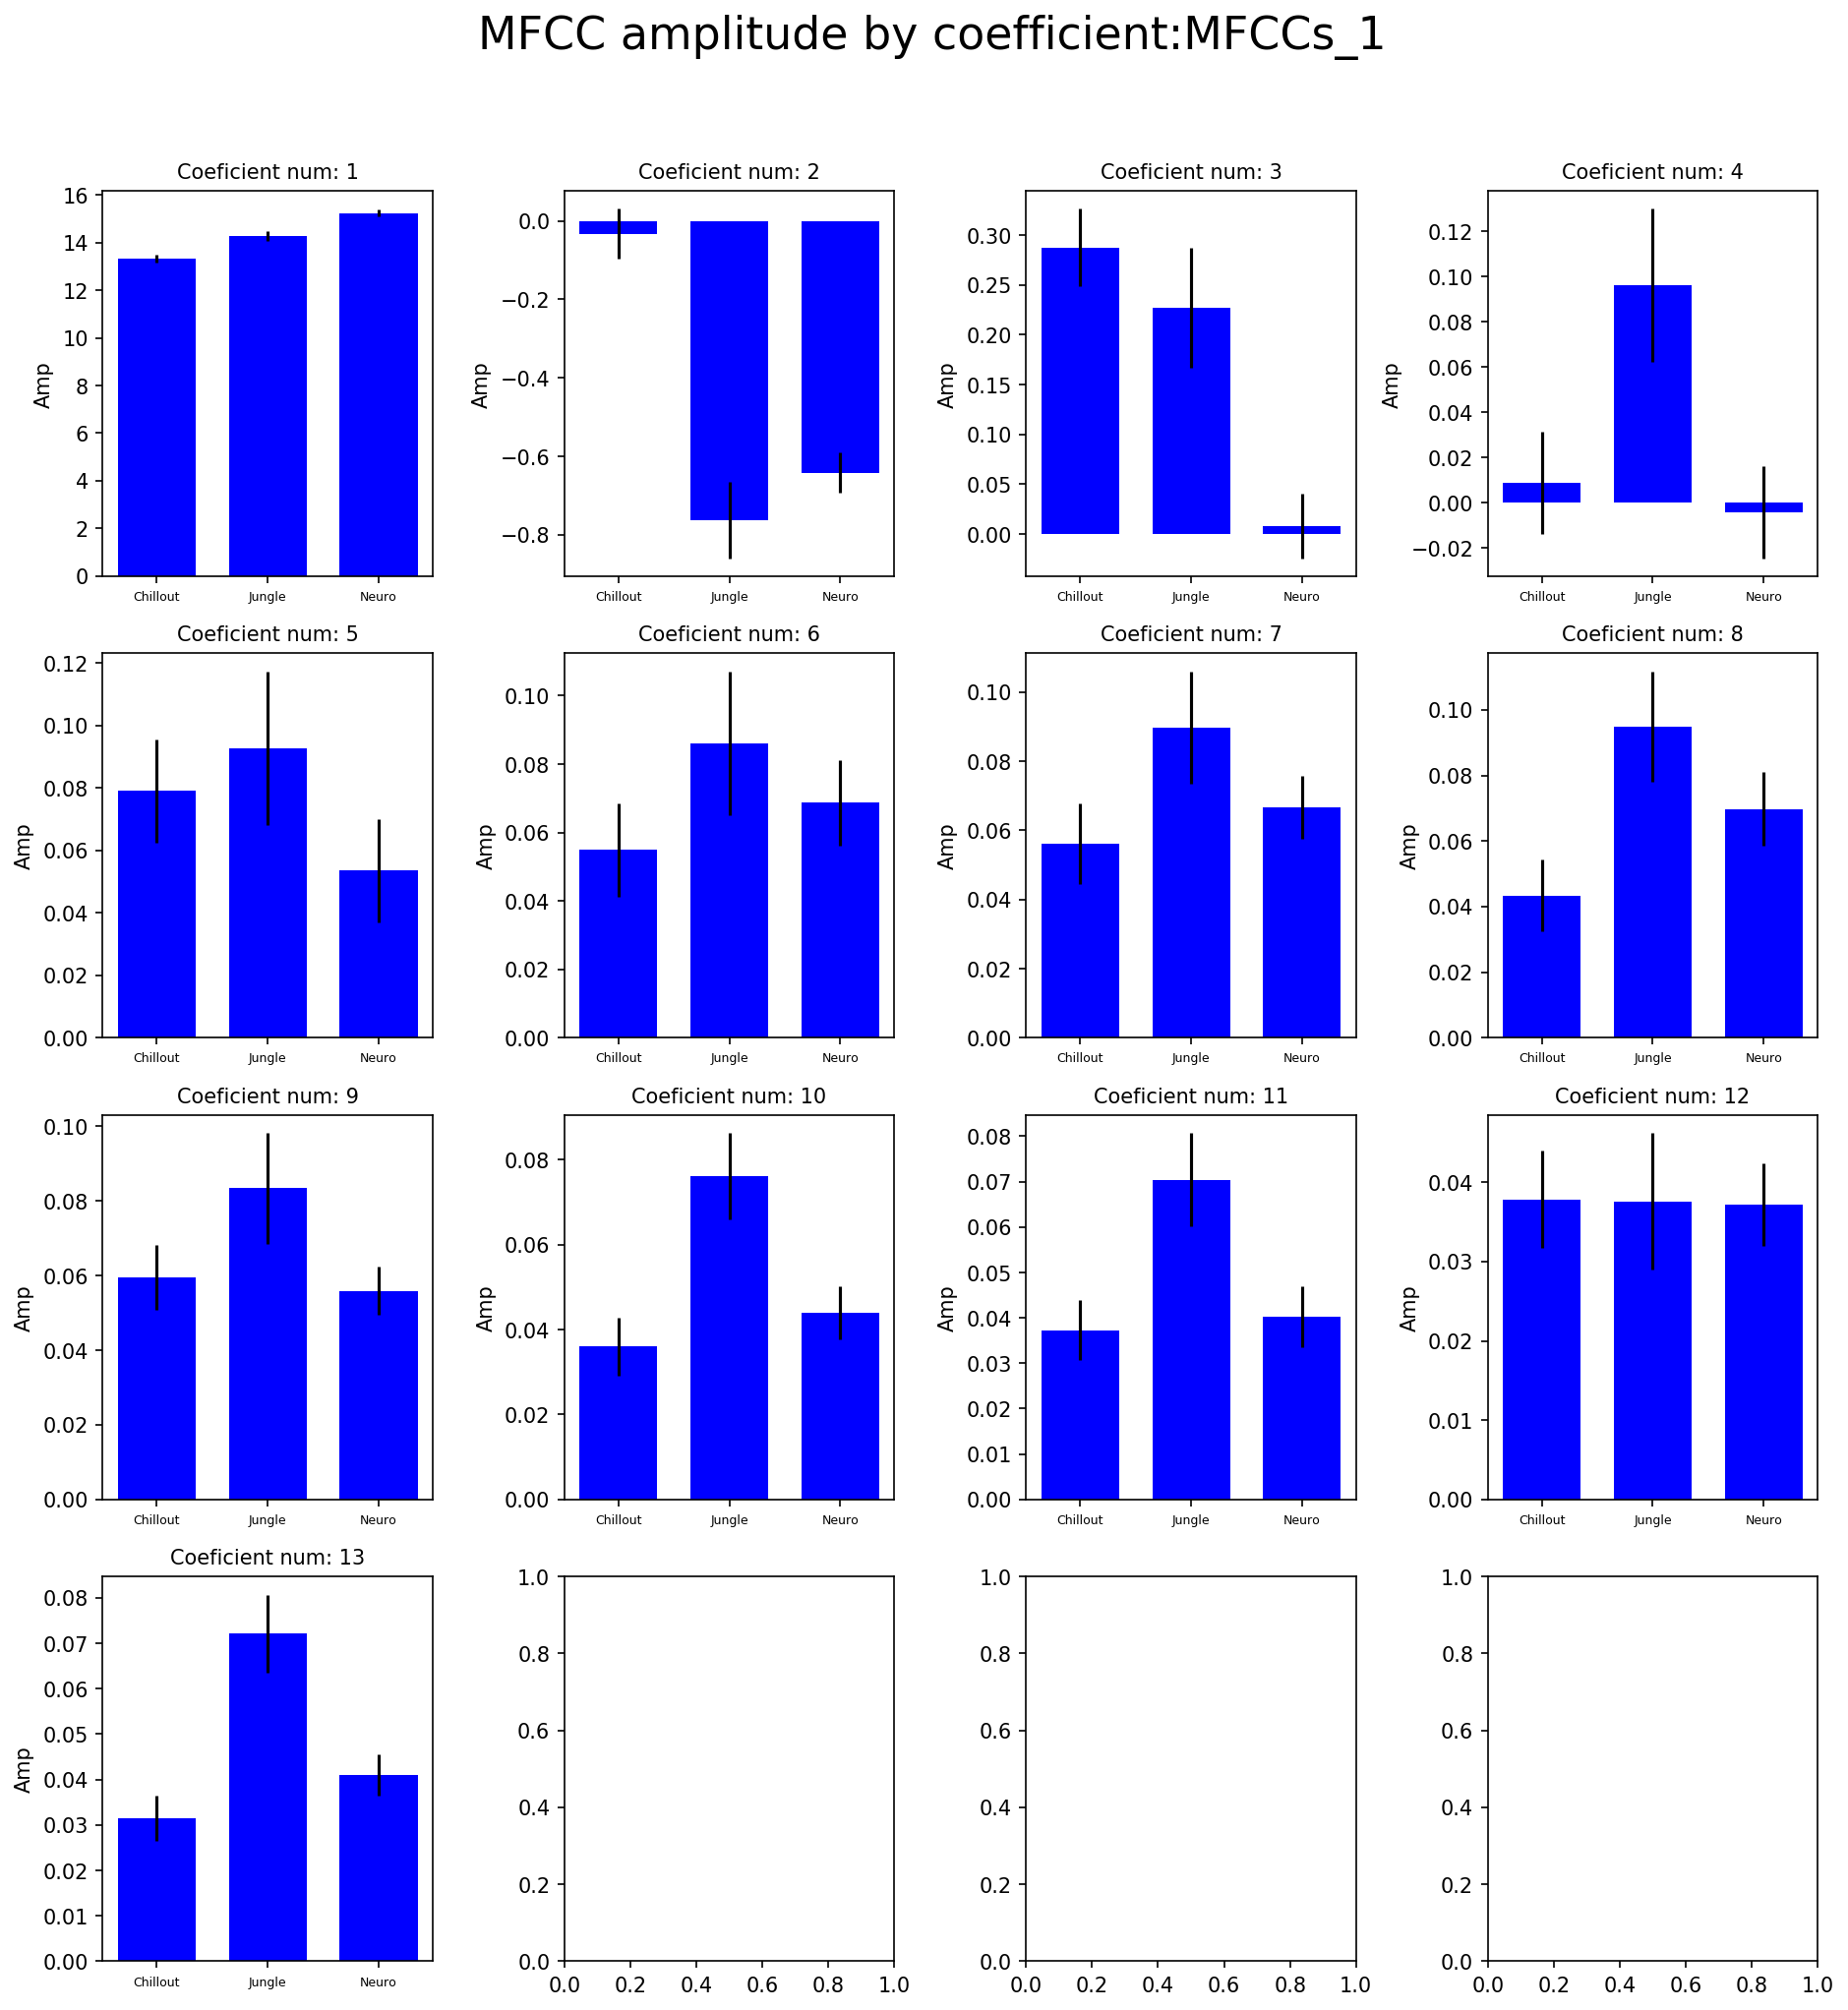

In [41]:
# plot type 1 MFCCs across sub-genres
sndprcfunc.plot_cross_group_MFCCs(sound_files_PP, "MFCCs_1")

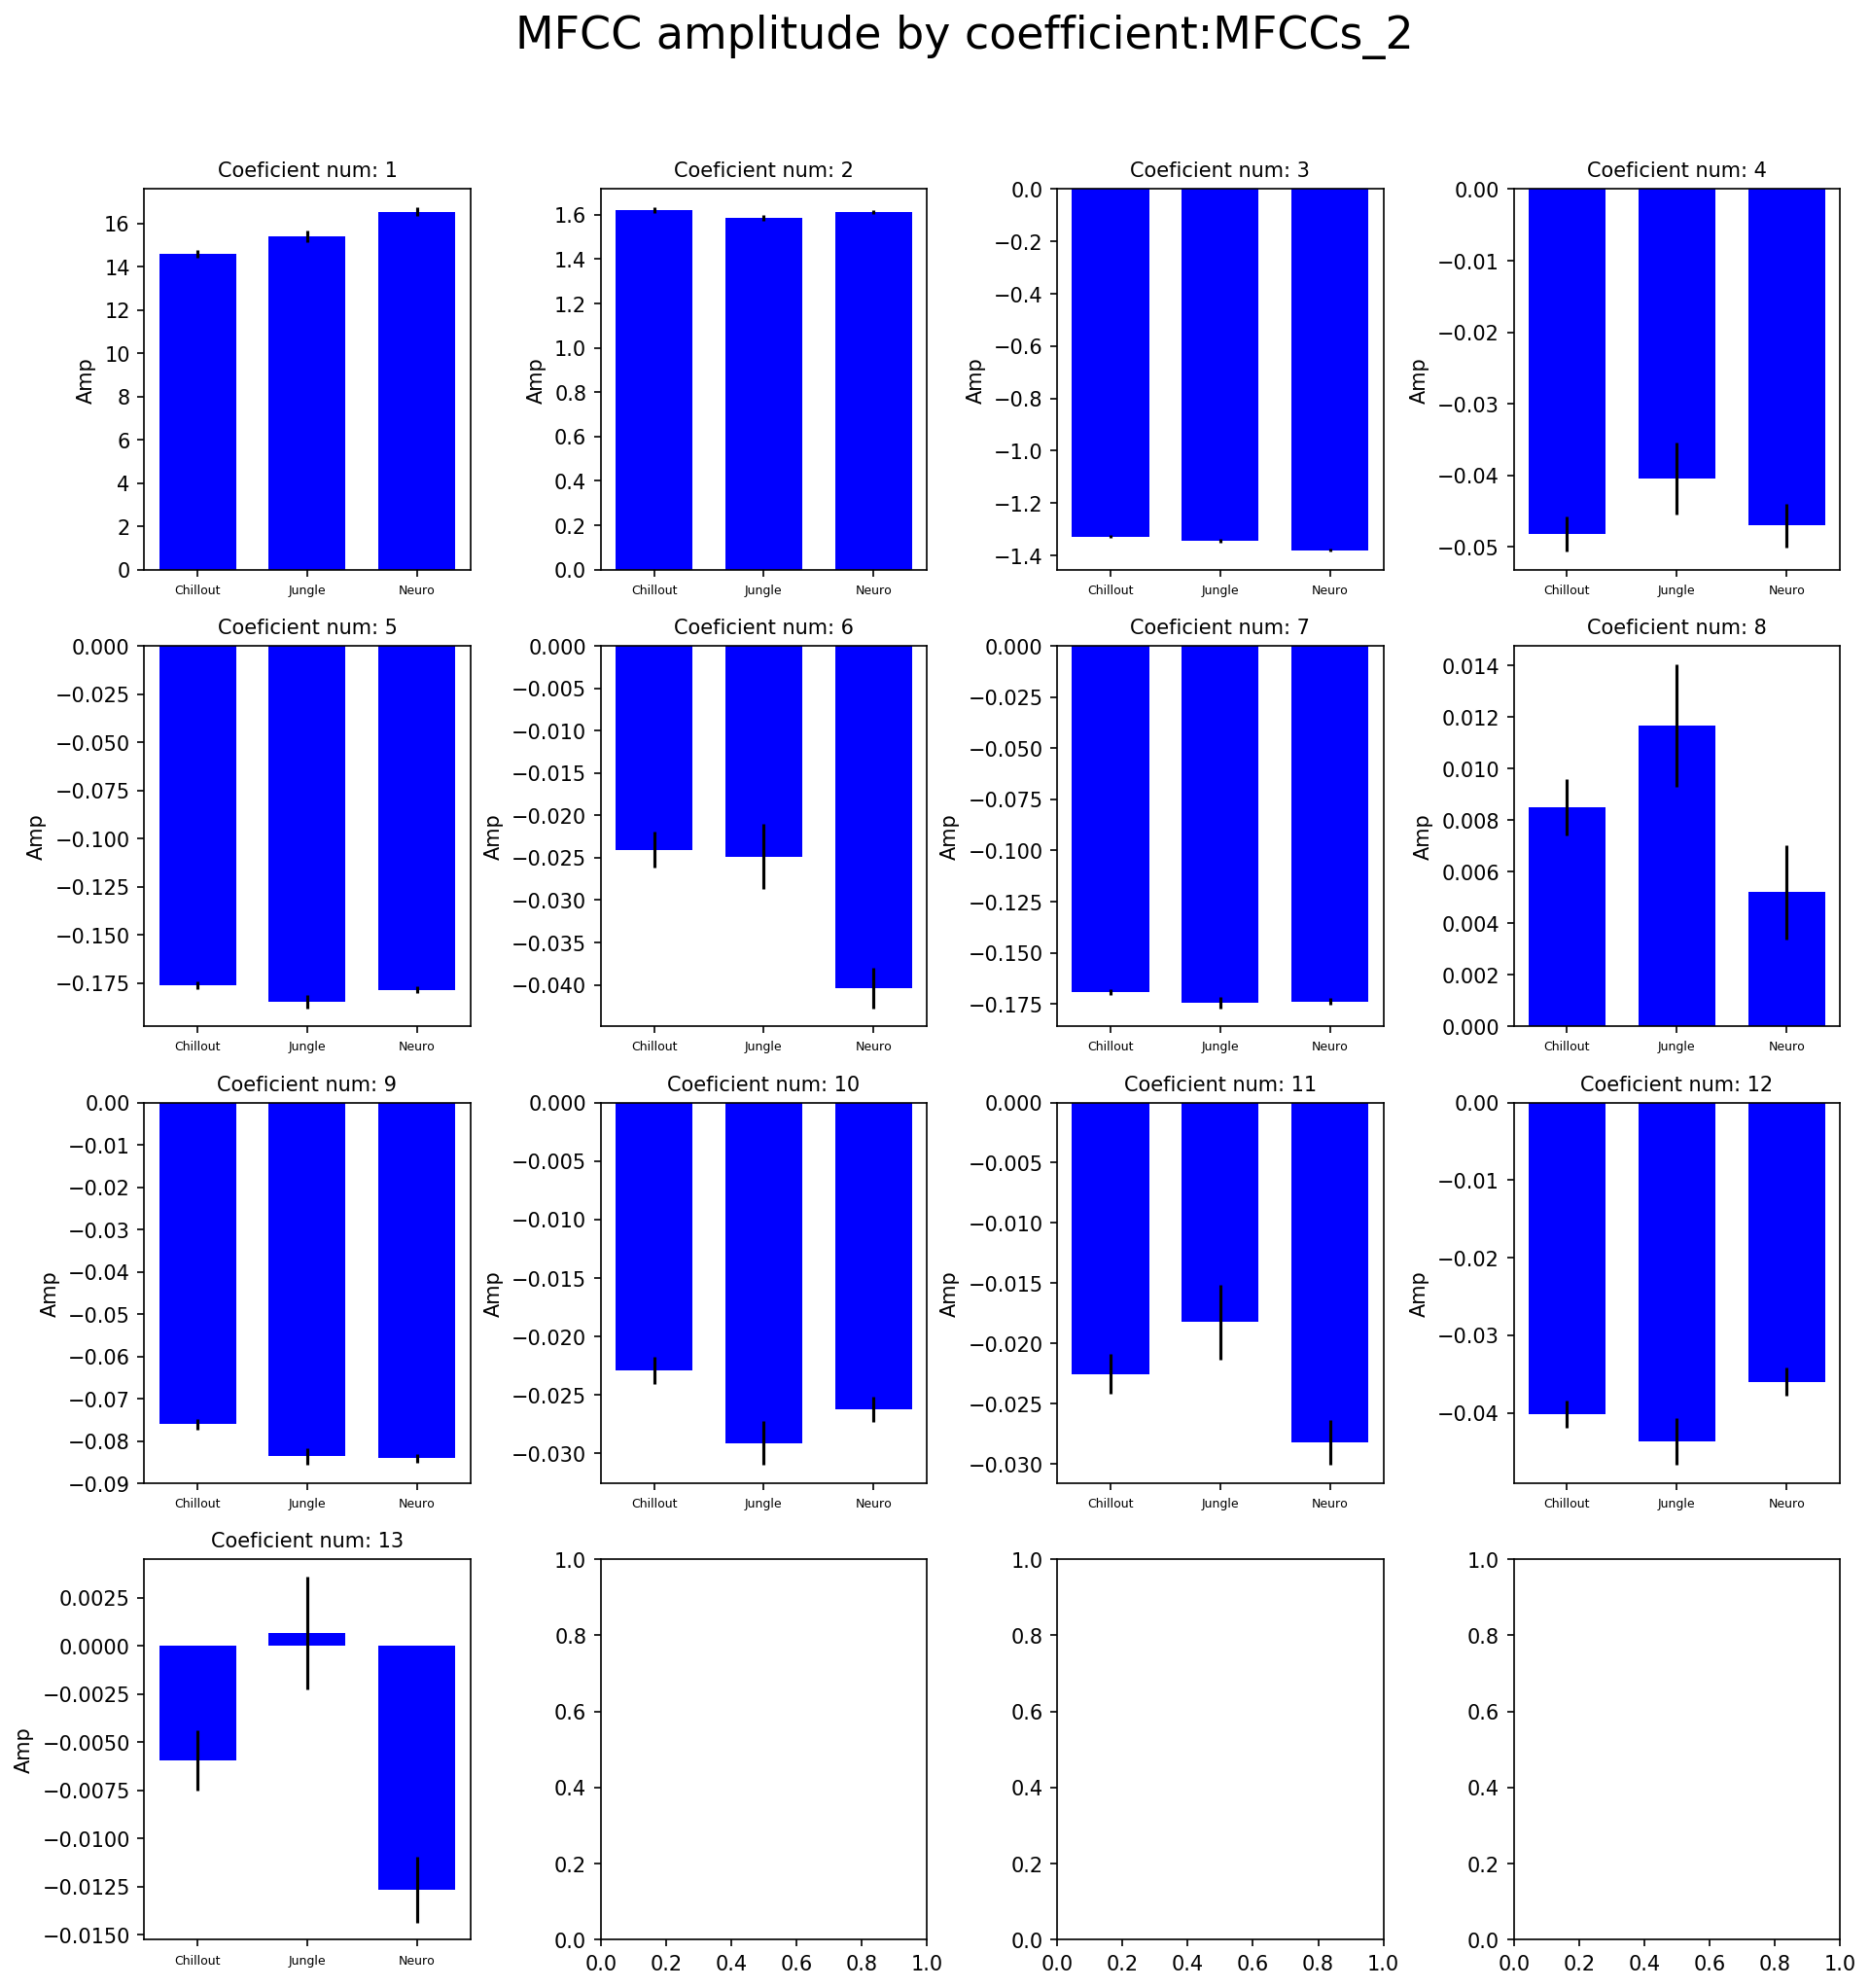

In [42]:
# plot type 2 MFCCs across sub-genres
sndprcfunc.plot_cross_group_MFCCs(sound_files_PP, "MFCCs_2")